**1. Upload the dataset and drop the duplicates**

In [23]:
import pandas as pd

# Specify the file path where the CSV file is located
csv_file_path = "Data/amazon_comments.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)
df = df[['Product Price', 'Review - Rating', 'Review - Date', 'Review - Body', 'Search', 'Brand', 'Review - Author']]
df

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_87722/4066855808.py:7: DtypeWarning: Columns (7,8,9,11,12,13,14,21,24,26,27,28,30,32,33,34,35,36,38,39,40,42,43,44,45,46,47,49,52,55,56,57,58,59,60,62,63,65,69,70,71,72,73,74,77,78,79,80,83,84,85,87,88,89,90,92,93,94,95,97,98,100,101,102,103,105,106,107,108,109,110,111,112,113,115,116,117,119,120,121,122,123,124,125,126,129,130,131,132,133,134,135,137) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file_path)


Product Price     Review - Rating  \
0              86..  4.0 out of 5 stars   
1              86..  4.0 out of 5 stars   
2              86..  5.0 out of 5 stars   
3              86..  3.0 out of 5 stars   
4              86..  5.0 out of 5 stars   
...             ...                 ...   
21900          29..  5.0 out of 5 stars   
21901          29..  5.0 out of 5 stars   
21902          29..  5.0 out of 5 stars   
21903          29..  5.0 out of 5 stars   
21904          29..  5.0 out of 5 stars   

                                           Review - Date  \
0      Reviewed in the United Kingdom on 14 October 2023   
1      Reviewed in the United Kingdom on 19 September...   
2      Reviewed in the United Kingdom on 16 October 2023   
3        Reviewed in the United Kingdom on 19 April 2023   
4      Reviewed in the United Kingdom on 27 September...   
...                                                  ...   
21900  Reviewed in the United Kingdom on 16 November ...   
21901  Reviewed in the United Kingdom on 16 November ...   
21902  Reviewed in the United Kingdom on 6 November 2023   
21903  Reviewed in the United Kingdom on 31 October 2023   
21904  Reviewed in the United Kingdom on 2 November 2023   

                                           Review - Body   Search  Brand  \
0      \n\n\n\n\n\n\n\n  \n  \n    The phone looks ex...   iPhone  Apple   
1      \n\n\n\n\n\n\n\n  \n  \n    Battery life is no...   iPhone  Apple   
2      \n\n\n\n\n\n\n\n  \n  \n    Perfect for my 11 ...   iPhone  Apple   
3      \n\n\n\n\n\n\n\n  \n  \n    It arrived within ...   iPhone  Apple   
4      \n\n\n\n\n\n\n\n  \n  \n    2nd mobile phonr\n...   iPhone  Apple   
...                                                  ...      ...    ...   
21900  \n\n\n\n\n\n\n\n  \n  \n    Purchased these af...  AirPods  Apple   
21901  \n\n\n\n\n\n\n\n  \n  \n    It is a perfect re...  AirPods  Apple   
21902  \n\n\n\n\n\n\n\n  \n  \n    The case works per...  AirPods  Apple   
21903  \n\n\n\n\n\n\n\n  \n  \n    These were a perfe...  AirPods  Apple   
21904  \n\n\n\n\n\n\n\n  \n  \n    work well and good...  AirPods  Apple   

       Review - Author  
0              david R  
1         G. Steventon  
2               Leelee  
3               tony c  
4               Mahone  
...                ...  
21900        Daragh D.  
21901   Cliente Kindle  
21902  Amazon Customer  
21903          Masoud   
21904          Georgia  

[21905 rows x 7 columns]

In [24]:
df = df[df['Brand']=='Apple']
df['Search'].value_counts()


AirPods        10802
iPad            3690
iPhone          3400
Macbook         2319
Apple Watch     1694
Name: Search, dtype: int64

In [25]:
df = df.drop_duplicates(subset=['Search', 'Review - Body'])
df['Search'].value_counts()

AirPods        10802
iPad            3690
iPhone          3400
Macbook         2319
Apple Watch     1694
Name: Search, dtype: int64

**2. Drop unnecessary columns**

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21905 entries, 0 to 21904
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Product Price    21905 non-null  object
 1   Review - Rating  21905 non-null  object
 2   Review - Date    21905 non-null  object
 3   Review - Body    21904 non-null  object
 4   Search           21905 non-null  object
 5   Brand            21905 non-null  object
 6   Review - Author  21904 non-null  object
dtypes: object(7)
memory usage: 1.3+ MB


In [27]:
df.rename(columns={'Review - Body': 'Comment_Body', 'Review - Date': 'Date', 'Review - Author': 'Author'}, inplace=True)
df.drop(['Review - Rating', 'Brand'], axis=1, inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21905 entries, 0 to 21904
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product Price  21905 non-null  object
 1   Date           21905 non-null  object
 2   Comment_Body   21904 non-null  object
 3   Search         21905 non-null  object
 4   Author         21904 non-null  object
dtypes: object(5)
memory usage: 1.0+ MB


**3. Adjust the type of the columns**

In [29]:
df['Date'].value_counts()

Reviewed in the United Kingdom on 14 November 2023     256
Reviewed in the United Kingdom on 9 November 2023      206
Reviewed in the United Kingdom on 5 November 2023      201
Reviewed in the United Kingdom on 29 October 2023      200
Reviewed in the United Kingdom on 8 November 2023      190
                                                      ... 
Reviewed in the United Kingdom on 19 September 2020      1
Reviewed in France on 26 December 2022                   1
Reviewed in Germany on 15 December 2022                  1
Reviewed in the United Kingdom on 11 December 2019       1
Reviewed in Spain on 27 October 2022                     1
Name: Date, Length: 2980, dtype: int64

In [ ]:
Burda kaldım.

In [28]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

ParserError: Unknown string format: Reviewed in the United Kingdom on 14 October 2023

**3. Check the duplicates**

In [288]:
df = df.drop_duplicates()
df


Search         Condition    Price  \
0       Iphone       musicmagpie  £634.99   
1       Iphone               new  £634.99   
2       Iphone         pre-owned  £634.99   
3       Iphone  phonesdirect_com  £634.99   
4       Iphone               new  £634.99   
...        ...               ...      ...   
63902  Macbook               NaN   £60.63   
63903  Macbook               NaN   £60.63   
63904  Macbook               NaN   £60.63   
63905  Macbook               NaN   £60.63   
63906  Macbook         pre-owned   £60.63   

                                            Comment_Body              Author  \
0      Probably as I had hoped for as the phone is in...         stickyprobs   
1      Fantastic,new and sealed as described. It come...  helwa1078-voxze...   
2      It’s  a good phone.. Had a new 13 model but fo...        paulprior249   
3      Perfect quality as if its new and it has 100% ...              88s275   
4                              I love it fantastic phone             sarolga   
...                                                  ...                 ...   
63902  just like what i exspected beautful laptop mad...      heavenssoldier   
63903  never used a mac book before takes a little ge...        bushtukercol   
63904  Its a mac with a big screen and its pretty dam...  live.event.phot...   
63905  One of the best decisions i have made is forge...           mariomasc   
63906                                                 👍🏻             johnnss   

            Date  
0     2023-06-28  
1     2022-09-29  
2     2023-06-20  
3     2023-08-16  
4     2022-06-04  
...          ...  
63902 2010-11-26  
63903 2014-03-04  
63904 2010-04-15  
63905 2010-12-23  
63906 2021-02-17  

[19284 rows x 6 columns]

**5. Anonymize the comments**

In [289]:
df = df.drop('Author', axis=1)
df


Search         Condition    Price  \
0       Iphone       musicmagpie  £634.99   
1       Iphone               new  £634.99   
2       Iphone         pre-owned  £634.99   
3       Iphone  phonesdirect_com  £634.99   
4       Iphone               new  £634.99   
...        ...               ...      ...   
63902  Macbook               NaN   £60.63   
63903  Macbook               NaN   £60.63   
63904  Macbook               NaN   £60.63   
63905  Macbook               NaN   £60.63   
63906  Macbook         pre-owned   £60.63   

                                            Comment_Body       Date  
0      Probably as I had hoped for as the phone is in... 2023-06-28  
1      Fantastic,new and sealed as described. It come... 2022-09-29  
2      It’s  a good phone.. Had a new 13 model but fo... 2023-06-20  
3      Perfect quality as if its new and it has 100% ... 2023-08-16  
4                              I love it fantastic phone 2022-06-04  
...                                                  ...        ...  
63902  just like what i exspected beautful laptop mad... 2010-11-26  
63903  never used a mac book before takes a little ge... 2014-03-04  
63904  Its a mac with a big screen and its pretty dam... 2010-04-15  
63905  One of the best decisions i have made is forge... 2010-12-23  
63906                                                 👍🏻 2021-02-17  

[19284 rows x 5 columns]

**6. Detect the language and drop null values**

In [290]:
from langdetect import detect

def detect_language(comment):
    try:
        return detect(comment)
    except:
        return None

df['Language'] = df['Comment_Body'].apply(detect_language)
df['Language'].value_counts()

en       17899
af         222
fr         148
ca         139
ro          97
so          85
it          59
cy          56
de          54
es          48
pt          39
tl          39
nl          36
et          34
no          32
ru          32
hu          27
hr          25
sw          23
da          23
sl          21
id          21
fi          20
pl          18
sv          16
vi           9
sk           6
tr           5
cs           4
sq           4
lv           3
el           2
bg           1
zh-cn        1
uk           1
ar           1
Name: Language, dtype: int64

In [291]:
df.dropna(inplace=True)
df['Search'].value_counts()


Iphone         11410
AirPods         1612
iPad             945
Apple Watch      699
Macbook          431
Name: Search, dtype: int64

In [292]:
df['Language'].value_counts()

en    13974
af      189
ca      129
fr      123
ro       87
so       65
cy       45
de       42
it       39
et       33
es       33
nl       31
pt       31
tl       30
ru       26
no       26
hu       26
hr       24
sw       21
id       20
da       20
pl       17
sl       16
fi       13
sv       11
vi        6
tr        5
sk        4
cs        3
lv        3
sq        2
bg        1
el        1
uk        1
Name: Language, dtype: int64

In [293]:
df[df['Language']=='uk']

Search Condition    Price Comment_Body       Date Language
37922  Iphone       new  £255.00    IPHONE 11 2019-12-25       uk

In [294]:
df[df['Language']=='el']

Search  Condition  Price  \
25385  Iphone  pre-owned  £5.99   

                                            Comment_Body       Date Language  
25385  λειτουργει τελεια  μαρεσει ειμαι πολυ ευχαριστ... 2020-03-04       el

In [295]:
df[df['Language']=='bg']

Search  Condition   Price Comment_Body       Date Language
1844  Iphone  pre-owned  £20.99      отлично 2016-08-29       bg

In [296]:
df[df['Language']=='sq']

Search  Condition    Price   Comment_Body       Date Language
1989  Iphone  pre-owned  £300.00    i love it ! 2021-08-25       sq
9268  Iphone        new  £269.98  Like it a lot 2020-01-07       sq

In [297]:
df['Language'] = df['Language'].replace('sq', 'en')
df[df['Language']=='sq']

Empty DataFrame
Columns: [Search, Condition, Price, Comment_Body, Date, Language]
Index: []

In [298]:
df[df['Language']=='lv']

Search  Condition    Price  \
645     Iphone  pre-owned   £79.99   
31733   Iphone  pre-owned    £0.99   
63580  Macbook        new  £430.00   

                                            Comment_Body       Date Language  
645                                             Amaizing 2019-12-11       lv  
31733  Man patīk. Protams ir nedaudz savādi pēc Andro... 2019-04-03       lv  
63580                                  Laptop is amazing 2022-02-27       lv

In [299]:
df.loc[df['Comment_Body'].str.contains('Laptop is amazing'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Amaizing'), 'Language'] = 'en'
df[df['Language']=='lv']


Search  Condition  Price  \
31733  Iphone  pre-owned  £0.99   

                                            Comment_Body       Date Language  
31733  Man patīk. Protams ir nedaudz savādi pēc Andro... 2019-04-03       lv

In [300]:
df[df['Language']=='cs']

Search  Condition    Price Comment_Body       Date Language
4781   Iphone  pre-owned    £5.40    Very nice 2021-07-14       cs
30068  Iphone        new   £25.00   very slick 2018-10-11       cs
53433    iPad        new  £102.00    Very nice 2020-07-04       cs

In [301]:
df.loc[df['Comment_Body'].str.contains('Very nice'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('very slick'), 'Language'] = 'en'
df[df['Language']=='cs']

Empty DataFrame
Columns: [Search, Condition, Price, Comment_Body, Date, Language]
Index: []

In [302]:
df[df['Language']=='sk']

Search  Condition        Price    Comment_Body       Date Language
3614    Iphone  pre-owned       £39.99              ok 2018-03-14       sk
6415    Iphone  pre-owned  £89.99 each         Tudo ok 2020-05-13       sk
8845    Iphone  pre-owned      £100.00           Bravo 2021-03-12       sk
56986  AirPods        new  £69.99 each  Love my I pods 2021-09-06       sk

In [303]:
df['Language'] = df['Language'].replace('sk', 'en')
df[df['Language']=='sk']

Empty DataFrame
Columns: [Search, Condition, Price, Comment_Body, Date, Language]
Index: []

In [304]:
df[df['Language']=='tr']

Search  Condition    Price Comment_Body       Date Language
2640        Iphone  pre-owned  £299.00   Thank you! 2018-04-19       tr
4253        Iphone        new   £99.99   Thank you. 2018-12-14       tr
6842        Iphone  pre-owned  £200.00  Thank you 😊 2020-07-22       tr
7412        Iphone  pre-owned   £63.00  Thank you:) 2018-05-09       tr
61047  Apple Watch        new  £200.00          Yes 2023-05-12       tr

In [305]:
df['Language'] = df['Language'].replace('tr', 'en')
df[df['Language']=='tr']

Empty DataFrame
Columns: [Search, Condition, Price, Comment_Body, Date, Language]
Index: []

In [306]:
df[df['Language']=='vi']

Search  Condition         Price  \
374     Iphone  pre-owned        £34.00   
6417    Iphone  pre-owned   £89.99 each   
12096   Iphone  pre-owned        £44.99   
13033   Iphone  pre-owned  £114.95 each   
41431   Iphone  pre-owned       £180.00   
63753  Macbook  pre-owned       £137.41   

                                            Comment_Body       Date Language  
374                                                    H 2020-02-05       vi  
6417           NICE PHONE A BIT BIGGER THAN MY I PHONE 5 2019-05-15       vi  
12096  í cαmє frσm uѕíng phσnєѕ wíth much híghєr ѕtσr... 2019-11-19       vi  
13033                                                N/c 2018-11-22       vi  
41431                                          Gréât big 2018-07-31       vi  
63753                                                Thx 2022-06-02       vi

In [307]:
df.loc[df['Comment_Body'].str.contains('NICE PHONE A BIT BIGGER THAN MY I PHONE 5'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('í cαmє frσm uѕíng phσnєѕ wíth much híghєr'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Gréât big'), 'Language'] = 'en'
df[df['Language']=='vi']


Search  Condition         Price Comment_Body       Date Language
374     Iphone  pre-owned        £34.00            H 2020-02-05       vi
13033   Iphone  pre-owned  £114.95 each          N/c 2018-11-22       vi
63753  Macbook  pre-owned       £137.41          Thx 2022-06-02       vi

In [308]:
df[df['Language']=='sv']

Search  Condition         Price              Comment_Body  \
4895        Iphone  pre-owned       £395.00                     Smart   
6207        Iphone        new   £89.99 each                    All ok   
8179        Iphone  pre-owned       £254.99             Great upgrade   
8473        Iphone  pre-owned       £339.99                   upgrade   
9439        Iphone   mywit_uk       £464.99                     brill   
10837       Iphone  pre-owned         £5.00                   5 stars   
17292       Iphone  pre-owned        £29.00                    all ok   
49978       Iphone  pre-owned  £184.95 each                 I’m happy   
54029         iPad  pre-owned         £5.00                 id locked   
57475      AirPods  pre-owned  £139.99 each  Excellent\nSupper sounds   
61763  Apple Watch  pre-owned        £48.00                I am happy   

            Date Language  
4895  2023-10-04       sv  
6207  2019-01-02       sv  
8179  2021-08-17       sv  
8473  2021-02-17       sv  
9439  2022-07-04       sv  
10837 2017-12-20       sv  
17292 2021-03-25       sv  
49978 2018-01-18       sv  
54029 2020-04-02       sv  
57475 2021-02-04       sv  
61763 2020-10-27       sv

In [309]:
df.loc[df['Comment_Body'].str.contains('Smart'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('upgrade'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('all ok'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('5 stars'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('id locked'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('I am happy'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('All ok'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('I’m happy'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Bad battery'), 'Language'] = 'en'
df[df['Language']=='sv']

Search  Condition         Price              Comment_Body       Date  \
9439    Iphone   mywit_uk       £464.99                     brill 2022-07-04   
57475  AirPods  pre-owned  £139.99 each  Excellent\nSupper sounds 2021-02-04   

      Language  
9439        sv  
57475       sv

In [310]:
df[df['Language']=='da']

Search           Condition         Price  \
7481        Iphone         musicmagpie       £183.00   
12101       Iphone           pre-owned        £44.99   
12106       Iphone           pre-owned        £44.99   
12380       Iphone           pre-owned  £155.99 each   
14627       Iphone           pre-owned        £29.99   
14819       Iphone           pre-owned        £29.99   
15554       Iphone           pre-owned         £7.50   
17282       Iphone  lizardtechsolut...        £29.00   
39654       Iphone           pre-owned        £85.00   
41319       Iphone           pre-owned        £29.00   
41392       Iphone           pre-owned       £180.00   
52091      Macbook           pre-owned  £159.99 each   
52153      Macbook           pre-owned  £159.99 each   
54518         iPad           pre-owned         £5.00   
56148      AirPods                 new   £69.99 each   
56244      AirPods           pre-owned   £69.99 each   
56847      AirPods                 new   £69.99 each   
60316      AirPods                 new        £56.00   
61903  Apple Watch                 new        £59.99   
63116  Apple Watch           pre-owned       £319.99   

                                            Comment_Body       Date Language  
7481                   As advertised. Delivered on time. 2021-10-07       da  
12101                                i'm verry satisfied 2018-08-08       da  
12106           Fraud seller never delivered the product 2017-07-13       da  
12380                                         Delightful 2021-12-07       da  
14627                                     What I ordered 2018-11-01       da  
14819                                  Well looked after 2016-07-06       da  
15554                                      Well designed 2021-07-06       da  
17282                      For my daughter hers broken 0 2021-11-10       da  
39654  Ordered Grade Pristine, but get Grade C. Had t... 2019-09-14       da  
41319                                  Delivered on time 2021-03-17       da  
41392                                 No marks or damage 2020-03-04       da  
52091  Problem 🔋🔋 after 5 days i must change   seler ... 2021-01-16       da  
52153                        Terrible terrible terrible. 2020-04-24       da  
54518                       Black sceen after setting up 2018-12-15       da  
56148                       I love it! Well designed! :) 2020-10-23       da  
56244                                    never even came 2020-06-12       da  
56847                                  Delivered Swiftly 2019-12-14       da  
60316                        Well designed but expensive 2023-02-11       da  
61903                                  delivered on time 2021-01-23       da  
63116                                Just amazing gadget 2023-08-02       da

In [311]:
df['Language'] = df['Language'].replace('da', 'en')
df[df['Language']=='da']

Empty DataFrame
Columns: [Search, Condition, Price, Comment_Body, Date, Language]
Index: []

In [312]:
df[df['Language']=='ru']

Search           Condition         Price  \
774     Iphone  cheapest_electr...        £79.99   
1442    Iphone           pre-owned       £449.99   
2673    Iphone           pre-owned       £299.00   
2795    Iphone   firesafetyparts-6        £69.00   
3569    Iphone           pre-owned        £39.99   
3619    Iphone         refurbished        £39.99   
4360    Iphone           pre-owned       £219.99   
7049    Iphone           pre-owned         £1.30   
7052    Iphone           pre-owned         £1.30   
7332    Iphone         refurbished       £250.00   
7427    Iphone           pre-owned        £63.00   
13508   Iphone          limetropic        £19.50   
13510   Iphone           pre-owned        £19.50   
14926   Iphone           pre-owned        £29.99   
14935   Iphone        bsimarketing        £29.99   
21169   Iphone           pre-owned        £49.99   
27990   Iphone           pre-owned         £5.00   
28211   Iphone           pre-owned         £5.00   
28546   Iphone           pre-owned         £5.00   
29689   Iphone                 new       £275.00   
38886   Iphone           pre-owned        £89.99   
39932   Iphone          limetropic        £25.00   
51488   Iphone           pre-owned        £60.00   
51492   Iphone           pre-owned        £60.00   
54450     iPad           pre-owned         £5.00   
57873  AirPods    studentcomputers  £139.99 each   

                                            Comment_Body       Date Language  
774    Телефон мне нравится,но я есче не во всем разо... 2022-12-11       ru  
1442                                   Все пройшло супер 2022-09-21       ru  
2673          Это современный во всех отношениях аппарат 2018-12-26       ru  
2795   Хороший продавец,товар соответствует описанию,... 2018-12-04       ru  
3569                           Все понравилось. Спасибо. 2019-03-21       ru  
3619   Все работает, фото получаются хорошие, но коне... 2017-07-27       ru  
4360                                    Шляпа какая-то 👎 2021-12-30       ru  
7049   Товар соответствует описанию. Полный комплект ... 2018-12-15       ru  
7052   Все отлично, тач айди работает, что очень важн... 2017-06-17       ru  
7332   Объём памяти позволит больше информации держат... 2019-12-03       ru  
7427                                               супер 2020-03-22       ru  
13508                       Телефон пришел всё нормально 2018-12-31       ru  
13510  Спасибо за телефон!!! Как новый, дочь будет до... 2018-07-10       ru  
14926  Ужасный продавец который обманывает покупателе... 2017-10-28       ru  
14935  Товар согласно описанию, ни каких претензий,оч... 2017-12-11       ru  
21169                                             Хорошо 2018-07-24       ru  
27990                                             хорошо 2016-07-21       ru  
28211  Покупаю в этом магазине уже третий раз. Никаки... 2016-02-21       ru  
28546  Отличный телефон, но не знаю как фаренгейты за... 2018-05-24       ru  
29689  Айфон старой школы, последний, разработанный п... 2016-10-26       ru  
38886                                          Прекрасно 2021-11-16       ru  
39932  Пришло все в лудшем виде. Упаковка отличная. С... 2019-05-02       ru  
51488                          Товар отличного качества! 2019-05-29       ru  
51492  понравилось всё не понравился продавец цена не... 2019-07-09       ru  
54450                                  Отличный планшет! 2020-02-24       ru  
57873                  По хорошей цене прекрасный гаджет 2022-09-10       ru

In [313]:
df[df['Language']=='no'][:50]

Search    Condition        Price  \
281     Iphone    pre-owned       £34.00   
879     Iphone    pre-owned       £35.00   
2604    Iphone    pre-owned      £299.00   
5937    Iphone    pre-owned        £0.99   
6386    Iphone    pre-owned  £89.99 each   
7271    Iphone          new       £53.00   
7309    Iphone          new      £515.00   
7976    Iphone    pre-owned       £40.00   
8623    Iphone    pre-owned       £67.99   
12089   Iphone    pre-owned       £44.99   
12712   Iphone  refurbished      £225.00   
17327   Iphone     dzmcoope       £29.00   
17752   Iphone    pre-owned      £100.00   
18013   Iphone    pre-owned       £22.99   
19140   Iphone    pre-owned       £45.00   
25530   Iphone    pre-owned      £419.89   
25965   Iphone    pre-owned      £159.00   
26018   Iphone    pre-owned      £159.00   
31795   Iphone    pre-owned        £0.99   
41317   Iphone          new       £29.00   
41681   Iphone          new      £495.00   
45702   Iphone    pre-owned       £20.00   
46955   Iphone    pre-owned       £44.99   
51985  Macbook    pre-owned      £299.99   
53027  Macbook          new        £6.45   
56970  AirPods    pre-owned  £69.99 each   

                                   Comment_Body       Date Language  
281                             I am very happy 2021-02-17       no  
879        Looks like new great value for money 2018-12-13       no  
2604                             I’m very happy 2018-11-30       no  
5937   seller doesn't write all meter. no  nedd 2017-06-07       no  
6386                                  I like it 2021-10-05       no  
7271                                      Fuked 2017-08-10       no  
7309   Just like buying it from apple excellent 2023-04-20       no  
7976                   I like my I phone 7 plus 2019-01-16       no  
8623                              some problems 2020-04-29       no  
12089           ok kvalitet. venlig Hilsen. HJN 2022-01-04       no  
12712                              Better, best 2020-02-26       no  
17327                           Trusted\nSeller 2016-06-15       no  
17752                                      None 2022-04-06       no  
18013                 Very average battery life 2019-10-01       no  
19140                Best iphone I've ever had. 2017-08-22       no  
25530         Sounds like great value for money 2020-01-28       no  
25965                            I'm very happy 2019-06-25       no  
26018                      Best value for money 2021-06-08       no  
31795                 Battery problems for ever 2016-05-12       no  
41317                Best phone I have ever had 2019-07-03       no  
41681                                  Enjoying 2021-06-22       no  
45702                      More like four star. 2020-01-23       no  
46955                       Not value for money 2022-04-28       no  
51985                       Good for travelling 2020-08-26       no  
53027                              I very happy 2020-07-16       no  
56970                                 Best ever 2021-02-17       no

In [314]:
df[df['Language']=='no'][51:]

Empty DataFrame
Columns: [Search, Condition, Price, Comment_Body, Date, Language]
Index: []

In [315]:
df['Language'] = df['Language'].replace('no', 'en')
df[df['Language']=='no']

Empty DataFrame
Columns: [Search, Condition, Price, Comment_Body, Date, Language]
Index: []

In [316]:
df[df['Language']=='pl']

Search  Condition         Price  \
4894    Iphone        new       £395.00   
6875    Iphone  pre-owned       £200.00   
9363    Iphone  pre-owned  £269.95 each   
12346   Iphone  pre-owned  £155.99 each   
12406   Iphone        new  £155.99 each   
15065   Iphone  pre-owned        £29.99   
17897   Iphone        new        £22.99   
17908   Iphone  pre-owned        £22.99   
21519   Iphone  pre-owned       £150.00   
31374   Iphone  pre-owned         £0.99   
54031     iPad  pre-owned         £5.00   
56720  AirPods  pre-owned   £69.99 each   
57506  AirPods        new  £139.99 each   
57547  AirPods  pre-owned  £139.99 each   

                                            Comment_Body       Date Language  
4894                                               Wow 😇 2021-01-20       pl  
6875                                                nice 2018-04-25       pl  
9363                             nice pocket size iphone 2021-07-15       pl  
12346                                                  Z 2019-06-05       pl  
12406                  Spełnia moje oczekiwania, polecam 2020-05-07       pl  
15065  iphone 5s jest ok.Bateria bardzo krótko trzyma... 2018-09-29       pl  
17897                                          Nice size 2020-03-10       pl  
17908                                     Very good size 2020-03-11       pl  
21519                                         Works okay 2021-11-12       pl  
31374                                  size wise spot on 2022-12-04       pl  
54031                             Very good piece of kit 2020-01-16       pl  
56720                                                Wow 2021-01-09       pl  
57506                                    Wow nice kit :) 2020-06-03       pl  
57547                                       Nice AirPods 2021-08-25       pl

In [317]:
df.loc[df['Comment_Body'].str.contains('I do not know'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('nice'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('nice pocket size iphone'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Nice size'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Very good size'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('size wise spot on'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Slow'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Wow nice kit'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Nice AirPods'), 'Language'] = 'en'
df[df['Language']=='pl']

Search  Condition         Price  \
4894    Iphone        new       £395.00   
12346   Iphone  pre-owned  £155.99 each   
12406   Iphone        new  £155.99 each   
15065   Iphone  pre-owned        £29.99   
21519   Iphone  pre-owned       £150.00   
54031     iPad  pre-owned         £5.00   
56720  AirPods  pre-owned   £69.99 each   

                                            Comment_Body       Date Language  
4894                                               Wow 😇 2021-01-20       pl  
12346                                                  Z 2019-06-05       pl  
12406                  Spełnia moje oczekiwania, polecam 2020-05-07       pl  
15065  iphone 5s jest ok.Bateria bardzo krótko trzyma... 2018-09-29       pl  
21519                                         Works okay 2021-11-12       pl  
54031                             Very good piece of kit 2020-01-16       pl  
56720                                                Wow 2021-01-09       pl

In [318]:
df[df['Language']=='sl']

Search       Condition        Price                  Comment_Body  \
3226        Iphone       pre-owned       £39.99                       love it   
6511        Iphone  repairoutletuk      £329.99                    I love it!   
6977        Iphone       pre-owned        £1.30                   No problems   
17731       Iphone       pre-owned      £100.00                     i love it   
32831       Iphone       pre-owned      £200.00                   I love it..   
34567       Iphone       pre-owned       £39.99  It's good value, no problems   
54438         iPad       pre-owned        £5.00                     I love it   
54469         iPad       pre-owned        £5.00                    I love it!   
55865      AirPods       pre-owned  £69.99 each                     I love it   
56989      AirPods       pre-owned  £69.99 each                        V good   
56995      AirPods       pre-owned  £69.99 each                  I’m in love.   
57016      AirPods             new  £69.99 each                        v good   
60918  Apple Watch       pre-owned       £16.00                  I love it  😍   
60931  Apple Watch       pre-owned       £16.00                    I love it!   
60969  Apple Watch       pre-owned       £16.00                       Love it   

            Date Language  
3226  2016-07-10       sl  
6511  2022-07-21       sl  
6977  2019-09-12       sl  
17731 2021-04-07       sl  
32831 2021-01-12       sl  
34567 2017-06-14       sl  
54438 2022-12-20       sl  
54469 2017-04-11       sl  
55865 2021-01-07       sl  
56989 2021-02-17       sl  
56995 2019-10-04       sl  
57016 2019-12-12       sl  
60918 2019-12-17       sl  
60931 2017-06-15       sl  
60969 2018-04-07       sl

In [319]:
df['Language'] = df['Language'].replace('sl', 'en')
df[df['Language']=='sl']

Empty DataFrame
Columns: [Search, Condition, Price, Comment_Body, Date, Language]
Index: []

In [320]:
df[df['Language']=='hu'][:50]

Search    Condition        Price                Comment_Body  \
775         Iphone    pre-owned       £79.99                          A1   
1890        Iphone  refurbished       £20.99               Amazing value   
2672        Iphone    pre-owned      £299.00                          A*   
4268        Iphone    pre-owned       £99.99                     amezing   
4709        Iphone    pre-owned        £5.40                          A+   
7045        Iphone    pre-owned        £1.30                       A++++   
7048        Iphone    pre-owned        £1.30                         A++   
8022        Iphone    pre-owned      £170.00                     A******   
8797        Iphone    pre-owned      £100.00       A +++++++++++++++++++   
12046       Iphone    pre-owned       £44.99                  Amazing a*   
15468       Iphone    pre-owned       £36.99                      Lovely   
15740       Iphone    pre-owned      £370.00                          a1   
18044       Iphone    pre-owned       £22.99                      A+++++   
46971       Iphone    pre-owned       £44.99           A++++++++++++++++   
46995       Iphone    pre-owned       £44.99                     A++++++   
47005       Iphone    pre-owned       £44.99                       A****   
52403      Macbook    pre-owned      £199.99                      A+++++   
52421      Macbook    pre-owned      £169.00                        A+++   
53435         iPad          new      £102.00                 A+++++++++.   
56144      AirPods    pre-owned  £69.99 each  Absolutely amazing love em   
56701      AirPods          new  £69.99 each             Absolutely fab!   
56842      AirPods          new  £69.99 each            Amazing gadget !   
57015      AirPods          new  £69.99 each                     A++++++   
60980  Apple Watch    pre-owned       £16.00                          A+   
62432  Apple Watch    pre-owned      £139.00               Amazing value   

            Date Language  
775   2022-10-22       hu  
1890  2018-07-04       hu  
2672  2019-03-03       hu  
4268  2019-10-16       hu  
4709  2018-01-23       hu  
7045  2019-12-04       hu  
7048  2019-07-19       hu  
8022  2023-10-25       hu  
8797  2021-03-17       hu  
12046 2018-09-08       hu  
15468 2017-05-31       hu  
15740 2020-01-22       hu  
18044 2019-07-03       hu  
46971 2020-06-10       hu  
46995 2016-12-19       hu  
47005 2017-11-21       hu  
52403 2022-09-25       hu  
52421 2022-02-27       hu  
53435 2020-01-29       hu  
56144 2022-02-23       hu  
56701 2020-09-03       hu  
56842 2019-10-02       hu  
57015 2020-02-04       hu  
60980 2020-03-14       hu  
62432 2023-02-11       hu

In [321]:
df[df['Language']=='hu'][50:]

Empty DataFrame
Columns: [Search, Condition, Price, Comment_Body, Date, Language]
Index: []

In [322]:
df['Language'] = df['Language'].replace('hu', 'en')
df[df['Language']=='hu']

Empty DataFrame
Columns: [Search, Condition, Price, Comment_Body, Date, Language]
Index: []

In [323]:
df[df['Language']=='pt']

Search    Condition         Price  \
391         Iphone    pre-owned        £34.00   
1020        Iphone    pre-owned        £20.00   
3228        Iphone    pre-owned        £39.99   
6868        Iphone    pre-owned       £200.00   
7696        Iphone  refurbished        £34.99   
7716        Iphone    pre-owned        £34.99   
7973        Iphone    pre-owned        £40.00   
8857        Iphone    pre-owned       £100.00   
9443        Iphone    pre-owned        £88.00   
12097       Iphone    pre-owned        £44.99   
12105       Iphone    pre-owned        £44.99   
12394       Iphone          new  £155.99 each   
14655       Iphone    pre-owned        £29.99   
14843       Iphone  refurbished        £29.99   
17263       Iphone    pre-owned        £29.00   
17713       Iphone    pre-owned       £100.00   
17816       Iphone    pre-owned       £100.00   
19432       Iphone    pre-owned        £45.00   
25421       Iphone    pre-owned         £5.99   
28209       Iphone    pre-owned         £5.00   
31514       Iphone    pre-owned         £0.99   
32000       Iphone    pre-owned       £184.55   
46946       Iphone          new        £44.99   
51931      Macbook    pre-owned       £407.00   
52430      Macbook          new      US $1.99   
54465         iPad    pre-owned         £5.00   
56835      AirPods          new   £69.99 each   
57882      AirPods    pre-owned  £139.99 each   
61690  Apple Watch    pre-owned       £120.00   
62347  Apple Watch    pre-owned        £46.00   

                                            Comment_Body       Date Language  
391                                    Muito bom estado. 2020-01-18       pt  
1020                                            Positive 2016-11-10       pt  
3228   O celular funciona totalmente, pequenos riscos... 2016-08-14       pt  
6868                                    Muito bom estado 2019-12-02       pt  
7696              Produto combatiam qualidade!Revomendo. 2019-10-14       pt  
7716   eu gostei do produto e também dos acessórios q... 2019-03-07       pt  
7973   Não sei se a bateria estará boa tenho que carr... 2020-08-13       pt  
8857                               OVERALL A GOOD PHONE! 2022-05-04       pt  
9443                                  A decent purchase. 2022-11-02       pt  
12097                O telefone esta em ótimas condições 2019-11-13       pt  
12105  O telemóvel veio com uma bateria que não estia... 2019-11-20       pt  
12394  muito bom, bem conservado, veio com todos os a... 2019-11-27       pt  
14655  Bom.\nFunciona muito bem.\nSem qualquer problema. 2016-05-25       pt  
14843  Sem palavras uma empresa q pode confia sem dúv... 2016-04-13       pt  
17263  EXCELLENT  PRODUCT - VERY VERSATILE AND A GREA... 2019-06-04       pt  
17713                                           Fabulous 2022-02-12       pt  
17816                                                 OK 2020-11-27       pt  
19432  É surpreendente!Intuitivo,processador rapidíss... 2017-02-08       pt  
25421  Não! Aparelho veio com defeito! E nada do vend... 2019-03-04       pt  
28209                               A GREAT LITTLE PHONE 2017-01-08       pt  
31514                                          Muito bom 2019-07-14       pt  
32000                                          Fabulous. 2020-12-30       pt  
46946                                        EASY TO USE 2019-01-16       pt  
51931                                  Item as described 2022-04-28       pt  
52430                           Têm vídeos explicativos. 2021-04-28       pt  
54465                             No problem recommended 2018-01-24       pt  
56835                                  Item as described 2020-12-28       pt  
57882  Muito bom acessório, torna se indispensável no... 2021-03-10       pt  
61690                                           Fabulous 2021-08-03       pt  
62347                     Fab fab fab. So much it can do 2019-12-25       pt

In [324]:
df.loc[df['Comment_Body'].str.contains('Positive'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Good price as'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Item as described'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('No problem recommended'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Good item as described'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Fabulous'), 'Language'] = 'en'
df[df['Language']=='pt']

Search    Condition         Price  \
391         Iphone    pre-owned        £34.00   
3228        Iphone    pre-owned        £39.99   
6868        Iphone    pre-owned       £200.00   
7696        Iphone  refurbished        £34.99   
7716        Iphone    pre-owned        £34.99   
7973        Iphone    pre-owned        £40.00   
8857        Iphone    pre-owned       £100.00   
9443        Iphone    pre-owned        £88.00   
12097       Iphone    pre-owned        £44.99   
12105       Iphone    pre-owned        £44.99   
12394       Iphone          new  £155.99 each   
14655       Iphone    pre-owned        £29.99   
14843       Iphone  refurbished        £29.99   
17263       Iphone    pre-owned        £29.00   
17816       Iphone    pre-owned       £100.00   
19432       Iphone    pre-owned        £45.00   
25421       Iphone    pre-owned         £5.99   
28209       Iphone    pre-owned         £5.00   
31514       Iphone    pre-owned         £0.99   
46946       Iphone          new        £44.99   
52430      Macbook          new      US $1.99   
57882      AirPods    pre-owned  £139.99 each   
62347  Apple Watch    pre-owned        £46.00   

                                            Comment_Body       Date Language  
391                                    Muito bom estado. 2020-01-18       pt  
3228   O celular funciona totalmente, pequenos riscos... 2016-08-14       pt  
6868                                    Muito bom estado 2019-12-02       pt  
7696              Produto combatiam qualidade!Revomendo. 2019-10-14       pt  
7716   eu gostei do produto e também dos acessórios q... 2019-03-07       pt  
7973   Não sei se a bateria estará boa tenho que carr... 2020-08-13       pt  
8857                               OVERALL A GOOD PHONE! 2022-05-04       pt  
9443                                  A decent purchase. 2022-11-02       pt  
12097                O telefone esta em ótimas condições 2019-11-13       pt  
12105  O telemóvel veio com uma bateria que não estia... 2019-11-20       pt  
12394  muito bom, bem conservado, veio com todos os a... 2019-11-27       pt  
14655  Bom.\nFunciona muito bem.\nSem qualquer problema. 2016-05-25       pt  
14843  Sem palavras uma empresa q pode confia sem dúv... 2016-04-13       pt  
17263  EXCELLENT  PRODUCT - VERY VERSATILE AND A GREA... 2019-06-04       pt  
17816                                                 OK 2020-11-27       pt  
19432  É surpreendente!Intuitivo,processador rapidíss... 2017-02-08       pt  
25421  Não! Aparelho veio com defeito! E nada do vend... 2019-03-04       pt  
28209                               A GREAT LITTLE PHONE 2017-01-08       pt  
31514                                          Muito bom 2019-07-14       pt  
46946                                        EASY TO USE 2019-01-16       pt  
52430                           Têm vídeos explicativos. 2021-04-28       pt  
57882  Muito bom acessório, torna se indispensável no... 2021-03-10       pt  
62347                     Fab fab fab. So much it can do 2019-12-25       pt

In [325]:
df[df['Language']=='id'][:50]

Search    Condition         Price  \
343         Iphone          new        £34.00   
362         Iphone          new        £34.00   
627         Iphone    pre-owned        £79.99   
4082        Iphone    pre-owned       £315.00   
6748        Iphone    pre-owned       £200.00   
8476        Iphone          new       £339.99   
12045       Iphone    pre-owned        £44.99   
12636       Iphone          new        £55.00   
13503       Iphone    pre-owned        £19.50   
14733       Iphone    pre-owned        £29.99   
15622       Iphone          new       £370.00   
21170       Iphone    pre-owned        £49.99   
31948       Iphone    pre-owned        £90.00   
53321         iPad  s2473651999        £12.50   
53322         iPad    pre-owned        £12.50   
53431         iPad    pre-owned       £102.00   
53479         iPad    pre-owned       £165.00   
54486         iPad    pre-owned         £5.00   
57566      AirPods    pre-owned  £139.99 each   
61048  Apple Watch    pre-owned       £200.00   

                           Comment_Body       Date Language  
343                               Super 2019-08-19       id  
362                      Great bargain! 2019-05-22       id  
627                   Great buy bargain 2019-11-19       id  
4082                            Super B 2020-04-21       id  
6748                                  I 2020-08-04       id  
8476           Amazing, thank you! Haha 2021-10-05       id  
12045            What a bargain. Thanks 2018-05-09       id  
12636                           Superb! 2017-12-14       id  
13503                            superb 2020-05-28       id  
14733                     Great bargain 2020-01-18       id  
15622                 Superb bit of kit 2021-02-17       id  
21170                  GREAT PRODUCT!!! 2018-07-04       id  
31948                        Superb vfm 2016-09-03       id  
53321                        Ok\nThanks 2020-02-12       id  
53322  Good pad but didnt like sim card 2020-06-11       id  
53431                 Brilliant bargain 2020-12-30       id  
53479                    A real bargain 2020-03-18       id  
54486             I enjoy using my IPad 2016-07-12       id  
57566                      Out standing 2020-11-17       id  
61048                         Bargain 👌 2023-02-26       id

In [326]:
df[df['Language']=='id'][50:]

Empty DataFrame
Columns: [Search, Condition, Price, Comment_Body, Date, Language]
Index: []

In [327]:
df['Language'] = df['Language'].replace('id', 'en')
df[df['Language']=='id']

Empty DataFrame
Columns: [Search, Condition, Price, Comment_Body, Date, Language]
Index: []

In [328]:
df[df['Language']=='hr'][:50]

Search    Condition         Price  \
332         Iphone    pre-owned        £34.00   
3019        Iphone    pre-owned  £209.95 each   
4265        Iphone          new        £99.99   
4775        Iphone    pre-owned         £5.40   
5925        Iphone    pre-owned         £0.99   
7455        Iphone    pre-owned       £183.00   
7700        Iphone          new        £34.99   
14380       Iphone    pre-owned        £29.99   
18105       Iphone    pre-owned       £180.00   
21909       Iphone    pre-owned       £100.00   
24071       Iphone  musicmagpie       £499.99   
25367       Iphone    pre-owned         £5.99   
25551       Iphone          new  £419.89 each   
25741       Iphone          new       £699.00   
40017       Iphone    pre-owned       £145.00   
53024      Macbook          new         £6.45   
53428         iPad          new       £102.00   
54453         iPad    pre-owned         £5.00   
57264      AirPods          new  £139.99 each   
61038  Apple Watch    pre-owned       £611.99   
61904  Apple Watch    pre-owned        £59.99   
61928  Apple Watch    pre-owned        £59.99   
63756      Macbook    pre-owned       £137.41   

                                            Comment_Body       Date Language  
332                              Amazing, just like new. 2021-03-31       hr  
3019                                          good price 2022-05-25       hr  
4265                               Good value good price 2021-07-07       hr  
4775                              Cracking value mobile. 2019-03-07       hr  
5925                            Good value good service! 2016-11-02       hr  
7455                                  It Is just amazing 2022-01-05       hr  
7700                                  Good value product 2019-01-16       hr  
14380                     Amazing item.   I just love it 2019-07-23       hr  
18105                                          Good size 2021-03-24       hr  
21909  Brzo se prazni baterija i nereagira dobro na d... 2020-08-10       hr  
24071                                       good product 2023-02-10       hr  
25367                                     amazing item ! 2016-11-09       hr  
25551                                                 jj 2021-10-20       hr  
25741                                    amazing product 2022-12-28       hr  
40017                                 Amazing good value 2022-11-25       hr  
53024                                       good product 2020-05-11       hr  
53428                                 Gr8 ipad gr8 price 2020-10-07       hr  
54453                                               Ipod 2019-10-09       hr  
57264                                    amazing product 2021-01-06       hr  
61038                                     Nice I like it 2023-01-29       hr  
61904                          good product . good price 2019-09-12       hr  
61928                                    Ok good product 2020-07-23       hr  
63756                              Amazing just like new 2022-05-08       hr

In [329]:
df[df['Language']=='hr'][50:]

Empty DataFrame
Columns: [Search, Condition, Price, Comment_Body, Date, Language]
Index: []

In [330]:
df['Language'] = df['Language'].replace('hr', 'en')
df[df['Language']=='hr']

Empty DataFrame
Columns: [Search, Condition, Price, Comment_Body, Date, Language]
Index: []

In [331]:
df[df['Language']=='nl']

Search          Condition         Price  \
229         Iphone          pre-owned        £34.00   
955         Iphone          pre-owned        £35.00   
2647        Iphone          pre-owned       £299.00   
4264        Iphone         iokarai_71        £99.99   
4757        Iphone          pre-owned         £5.40   
5778        Iphone          pre-owned         £9.00   
5932        Iphone          pre-owned         £0.99   
6836        Iphone          pre-owned       £200.00   
6872        Iphone          pre-owned       £200.00   
9861        Iphone                new       £155.00   
12690       Iphone  the_ioutlet_extra       £225.00   
13026       Iphone          pre-owned  £114.95 each   
14687       Iphone          pre-owned        £29.99   
14734       Iphone          pre-owned        £29.99   
17425       Iphone          pre-owned        £42.99   
18053       Iphone          pre-owned        £22.99   
19335       Iphone          pre-owned        £45.00   
21907       Iphone          pre-owned       £100.00   
25373       Iphone          pre-owned         £5.99   
28138       Iphone          pre-owned         £5.00   
28539       Iphone          pre-owned         £5.00   
29625       Iphone          pre-owned       £409.95   
29690       Iphone          pre-owned       £275.00   
31376       Iphone          pre-owned         £0.99   
39765       Iphone                new       £779.99   
41429       Iphone          pre-owned       £180.00   
56865      AirPods          pre-owned   £69.99 each   
56963      AirPods          pre-owned   £69.99 each   
57890      AirPods                new  £139.99 each   
61636  Apple Watch          pre-owned        £33.00   

                                            Comment_Body       Date Language  
229                                           Cheers pal 2020-09-29       nl  
955                                             Best one 2019-11-25       nl  
2647                                        Can’t get it 2019-10-26       nl  
4264                            Good value budget phone. 2023-07-04       nl  
4757                                 Not 5s it is just 5 2019-01-09       nl  
5778                                              its ok 2020-12-11       nl  
5932                          Love it. Apple just works. 2016-05-05       nl  
6836                                                Poor 2021-01-20       nl  
6872                                        Does its job 2018-12-07       nl  
9861                      Excellent in every department. 2020-04-09       nl  
12690                         In excellent working order 2023-03-03       nl  
13026                                             Decent 2020-09-01       nl  
14687                    Fingerprint scanner didn’t work 2018-02-10       nl  
14734                                             Cheers 2017-04-07       nl  
17425                                          Delighted 2020-10-06       nl  
18053                             Excellent even in 2019 2019-12-03       nl  
19335                                 It gets hot in use 2018-07-12       nl  
21907                                         is deceent 2021-01-13       nl  
25373                        Touch sacreen does not work 2016-11-11       nl  
28138  Hasn't been worked ever since getting it. VERY... 2019-01-10       nl  
28539                             Excellent vintage kit. 2021-01-27       nl  
29625                                          Ecceelent 2022-11-25       nl  
29690                                             Yippee 2016-05-04       nl  
31376                                              it ok 2018-06-27       nl  
39765                     Excellent screen size good buy 2022-12-13       nl  
41429                                Good value in price 2023-03-23       nl  
56865                                        Its damaged 2020-11-05       nl  
56963                                Amazing and genuine 2023-09-24       nl  
57890          

In [332]:
df.loc[df['Comment_Body'].str.contains('Can’t get it'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Amazing and genuine'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Excellent value, works fine'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Excellent and good value'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Best iPhone ever'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Delighted'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Best best I’ve made!'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Nice and sleek'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('best iphone ever'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Does its job'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Not 5s it is just 5'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Poor'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('its ok'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Excellent in every department.'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('In excellent working order'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Good value overall'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Decent'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Fingerprint scanner didn’t work'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Cheers'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Good value budget phone.'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('For my daughter hers broken 0'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Excellent even in 2019'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('It gets hot in use'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('BATTERY Dead.'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("Hasn't been worked ever since getting"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Excellent vintage kit.'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Good value in price'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Excellent screen size good buy'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Touch sacreen does not work'), 'Language'] = 'en'
df[df['Language']=='nl']


Search  Condition        Price                Comment_Body       Date  \
955     Iphone  pre-owned       £35.00                    Best one 2019-11-25   
5932    Iphone  pre-owned        £0.99  Love it. Apple just works. 2016-05-05   
21907   Iphone  pre-owned      £100.00                  is deceent 2021-01-13   
29625   Iphone  pre-owned      £409.95                   Ecceelent 2022-11-25   
29690   Iphone  pre-owned      £275.00                      Yippee 2016-05-04   
31376   Iphone  pre-owned        £0.99                       it ok 2018-06-27   
56865  AirPods  pre-owned  £69.99 each                 Its damaged 2020-11-05   

      Language  
955         nl  
5932        nl  
21907       nl  
29625       nl  
29690       nl  
31376       nl  
56865       nl

In [333]:
df[df['Language']=='tl'][:50]

Search  Condition         Price  \
306     Iphone  pre-owned        £34.00   
2562    Iphone  pre-owned       £299.00   
2892    Iphone  pre-owned       £245.99   
3616    Iphone  pre-owned        £39.99   
4270    Iphone  pre-owned        £99.99   
4352    Iphone  pre-owned       £219.99   
6388    Iphone  pre-owned   £89.99 each   
6881    Iphone  pre-owned       £200.00   
7661    Iphone  pre-owned        £34.99   
12016   Iphone  pre-owned        £44.99   
12377   Iphone  pre-owned  £155.99 each   
13009   Iphone  pre-owned  £114.95 each   
15038   Iphone  pre-owned        £29.99   
18104   Iphone  pre-owned       £180.00   
21183   Iphone  pre-owned        £49.99   
21697   Iphone  pre-owned       £540.00   
26016   Iphone  pre-owned       £159.00   
27307   Iphone  pre-owned       £464.99   
31797   Iphone  pre-owned         £0.99   
31909   Iphone  pre-owned        £90.00   
37000   Iphone  pre-owned       £120.00   
37072   Iphone  pre-owned        £40.00   
43448   Iphone  pre-owned       £113.00   
48410   Iphone  pre-owned       £490.00   
53358     iPad  pre-owned       £102.00   
54440     iPad  pre-owned         £5.00   
54447     iPad  pre-owned         £5.00   
57102  AirPods        new        £75.00   
57893  AirPods        new  £139.99 each   
57899  AirPods        new  £139.99 each   

                                  Comment_Body       Date Language  
306                                      Happy 2018-10-10       tl  
2562                                Top banana 2021-06-29       tl  
2892                        Amazing. Thank you 2019-12-11       tl  
3616                              Okay quality 2017-07-12       tl  
4270                           Is looking good 2019-07-31       tl  
4352                                 Happy 👍👍👍 2022-07-29       tl  
6388                         Ana amazing deal. 2020-03-10       tl  
6881                      I will not buy again 2020-01-28       tl  
7661                                  Amazing. 2018-12-25       tl  
12016  I can't saying anything, it isn't good. 2019-04-18       tl  
12377                       Don’t buy anything 2019-10-04       tl  
13009                           Is wot it says 2018-12-27       tl  
15038                                    buono 2021-11-14       tl  
18104                                 Im happy 2021-06-09       tl  
21183                                  And sad 2020-01-08       tl  
21697                   Long lasting 🔋 battery 2022-11-20       tl  
26016                           amazing iphone 2019-03-29       tl  
27307                       good looking phone 2021-12-15       tl  
31797                           No plag no box 2016-08-24       tl  
31909                     Nothing good to say. 2017-06-22       tl  
37000                           amazing  phone 2021-07-20       tl  
37072                              Amazing!!!! 2018-12-19       tl  
43448                           Amazing iphone 2021-10-06       tl  
48410                            amaxing phone 2021-08-11       tl  
53358                         Clean - no marks 2021-03-17       tl  
54440                                      N/a 2022-03-02       tl  
54447                                    Happy 2020-12-02       tl  
57102                                Anazinggg 2023-06-02       tl  
57893                            Amazing item! 2020-02-19       tl  
57899                              Amazing 🙃🙂🙃 2020-10-07       tl

In [334]:
df[df['Language']=='tl'][50:100]

Empty DataFrame
Columns: [Search, Condition, Price, Comment_Body, Date, Language]
Index: []

In [335]:
df[df['Language']=='tl'][100:]

Empty DataFrame
Columns: [Search, Condition, Price, Comment_Body, Date, Language]
Index: []

In [336]:
df['Language'] = df['Language'].replace('tl', 'en')
df[df['Language']=='tl']

Empty DataFrame
Columns: [Search, Condition, Price, Comment_Body, Date, Language]
Index: []

In [337]:
df[df['Language']=='de'][:50]

Search    Condition         Price  \
340         Iphone    pre-owned        £34.00   
784         Iphone    pre-owned        £79.99   
2730        Iphone    pre-owned        £69.00   
3629        Iphone    pre-owned        £39.99   
6339        Iphone    pre-owned   £89.99 each   
6871        Iphone          new       £200.00   
7424        Iphone  gtechsaless        £63.00   
7971        Iphone    romajayuk        £40.00   
9275        Iphone    pre-owned       £269.98   
12630       Iphone    pre-owned        £55.00   
14488       Iphone    pre-owned        £29.99   
15624       Iphone    pre-owned       £370.00   
15625       Iphone    pre-owned       £370.00   
18025       Iphone    pre-owned        £22.99   
19390       Iphone    pre-owned        £45.00   
21139       Iphone    pre-owned        £49.99   
25267       Iphone    pre-owned         £5.99   
25651       Iphone    pre-owned        £35.00   
31487       Iphone    pre-owned         £0.99   
35711       Iphone    pre-owned        £10.00   
39655       Iphone    pre-owned        £85.00   
48441       Iphone    pre-owned       £490.00   
52116      Macbook    pre-owned  £159.99 each   
52522      Macbook          new       £309.99   
53493         iPad          new       £165.00   
53806         iPad    pre-owned         £5.00   
54301         iPad    pre-owned         £5.00   
54308         iPad    pre-owned         £5.00   
55884      AirPods          new   £69.99 each   
56729      AirPods    pre-owned   £69.99 each   
56950      AirPods    pre-owned   £69.99 each   
56951      AirPods    pre-owned   £69.99 each   
56952      AirPods          new   £69.99 each   
57004      AirPods          new   £69.99 each   
57862      AirPods          new  £139.99 each   
57864      AirPods    pre-owned  £139.99 each   
61154  Apple Watch          new       £150.00   
61926  Apple Watch    pre-owned        £59.99   
62302  Apple Watch    pre-owned        £50.00   
63486      Macbook    pre-owned       £589.99   
63581      Macbook    pre-owned       £430.00   
63892      Macbook    pre-owned       £200.00   

                                            Comment_Body       Date Language  
340                             PRISTINE  - AS DESCRIBED 2020-01-08       de  
784                                     Just as descibed 2018-11-02       de  
2730                                         Honest item 2019-12-27       de  
3629                                    SCREEN SCRATCHED 2016-07-12       de  
6339                                                 Fab 2020-02-01       de  
6871                                     Best Phone ever 2019-01-16       de  
7424                                                   G 2019-08-13       de  
7971                          Like describe, trust user. 2021-08-04       de  
9275                                                Fab😀 2020-06-17       de  
12630                                        Better size 2022-10-12       de  
14488                                            Just is 2019-08-14       de  
15624                                                Grt 2021-01-27       de  
15625                                  Best Iphone Ever! 2020-03-10       de  
18025                                        GREAT PHONE 2017-10-11       de  
19390                     SOLD AS EE BUT REALLY VODAFONE 2017-09-27       de  
21139                                              GREAT 2019-12-25       de  
25267                                           Gr8 item 2017-02-23       de  
25651                              DOES ALL IT SHOULD DO 2020-03-25       de  
31487                          My youngest likes it much 2017-10-19       de  
35711                                      DOES NOT WORK 2018-04-18       de  
39655                        WELL RESTORED, ACTS AS NEW. 2021-03-10       de  
48441                                               SCAM 2021-05-25       de  
52116                                               Best 2018-06-21       de  
52522   

In [338]:
df[df['Language']=='de'][50:100]

Empty DataFrame
Columns: [Search, Condition, Price, Comment_Body, Date, Language]
Index: []

In [339]:
df[df['Language']=='de'][100:]

Empty DataFrame
Columns: [Search, Condition, Price, Comment_Body, Date, Language]
Index: []

In [340]:
df['Language'] = df['Language'].replace('de', 'en')
df[df['Language']=='de']

Empty DataFrame
Columns: [Search, Condition, Price, Comment_Body, Date, Language]
Index: []

In [341]:
df[df['Language']=='fi'][:50]

Search  Condition        Price            Comment_Body       Date  \
5767        Iphone  pre-owned        £9.00              Best value 2021-10-13   
6455        Iphone  pre-owned       £99.99             Great value 2019-06-05   
8010        Iphone  pre-owned      £170.00            Happy punter 2021-01-15   
12718       Iphone        new      £225.00                   happy 2020-05-06   
14952       Iphone  pre-owned       £29.99                    Hyvä 2018-07-17   
21162       Iphone  pre-owned       £49.99         Brilliant value 2021-07-19   
54179         iPad  pre-owned        £5.00               Brilliant 2020-12-16   
56490      AirPods        new  £69.99 each               Brilliant 2020-05-20   
56781      AirPods        new  £69.99 each         Fantastic value 2020-12-29   
61279  Apple Watch  pre-owned       £18.20               Brilliant 2023-03-24   
61930  Apple Watch  pre-owned       £59.99                  noisey 2019-05-08   
63582      Macbook        new      £430.00               Brilliant 2021-01-06   
63630      Macbook  pre-owned       £71.00  Excellent value thanks 2021-12-22   

      Language  
5767        fi  
6455        fi  
8010        fi  
12718       fi  
14952       fi  
21162       fi  
54179       fi  
56490       fi  
56781       fi  
61279       fi  
61930       fi  
63582       fi  
63630       fi

In [342]:
df[df['Language']=='fi'][50:100]

Empty DataFrame
Columns: [Search, Condition, Price, Comment_Body, Date, Language]
Index: []

In [343]:
df[df['Language']=='fi'][100:]

Empty DataFrame
Columns: [Search, Condition, Price, Comment_Body, Date, Language]
Index: []

In [344]:
df['Language'] = df['Language'].replace('fi', 'en')
df[df['Language']=='fi']

Empty DataFrame
Columns: [Search, Condition, Price, Comment_Body, Date, Language]
Index: []

In [345]:
df[df['Language']=='es']

Search    Condition         Price  \
392         Iphone    pre-owned        £34.00   
1893        Iphone    pre-owned        £20.99   
2669        Iphone    pre-owned       £299.00   
2726        Iphone    pre-owned        £69.00   
4771        Iphone          new         £5.40   
6221        Iphone    pre-owned   £89.99 each   
7113        Iphone    pre-owned        £50.00   
7120        Iphone          new        £50.00   
7925        Iphone    pre-owned        £40.00   
8616        Iphone    pre-owned        £67.99   
8866        Iphone    pre-owned       £100.00   
14529       Iphone          new        £29.99   
14842       Iphone  refurbished        £29.99   
14847       Iphone  refurbished        £29.99   
15476       Iphone    pre-owned        £36.99   
15477       Iphone    pre-owned        £36.99   
17306       Iphone    pre-owned        £29.00   
19415       Iphone          new        £45.00   
19449       Iphone    pre-owned        £45.00   
25261       Iphone    pre-owned         £5.99   
25828       Iphone    pre-owned       £159.00   
28124       Iphone    pre-owned         £5.00   
28179       Iphone    pre-owned         £5.00   
32885       Iphone          new        £99.99   
34579       Iphone    pre-owned        £39.99   
51419       Iphone    pre-owned        £60.00   
52147      Macbook    pre-owned  £159.99 each   
54148         iPad    pre-owned         £5.00   
56710      AirPods          new   £69.99 each   
56725      AirPods          new   £69.99 each   
57023      AirPods    pre-owned   £69.99 each   
61663  Apple Watch    pre-owned       £110.00   
61899  Apple Watch    pre-owned        £59.99   

                                            Comment_Body       Date Language  
392                                        As described. 2019-12-25       es  
1893                                    All as described 2018-11-01       es  
2669                                       Buen producto 2020-04-15       es  
2726                                        As described 2023-10-16       es  
4771             Esta operativo , buen producto, gracias 2021-04-27       es  
6221                                   Good as described 2020-03-16       es  
7113                                    Was as described 2021-01-19       es  
7120                           As described, no problem👍 2019-12-25       es  
7925                                          no defects 2019-12-05       es  
8616                         dead on, no problems so far 2019-01-23       es  
8866                                              decent 2020-12-14       es  
14529                                      As described! 2017-06-19       es  
14842  hola, estoy interesado en el articulo pero pay... 2016-04-12       es  
14847                                  Muy buen producto 2016-04-12       es  
15476                            as described, excellent 2018-12-27       es  
15477                                    Reliable device 2018-12-26       es  
17306                               Because as described 2019-02-21       es  
19415                                  muy buen articulo 2018-07-11       es  
19449  muy bien cuidado el celular me gusta bien cons... 2018-11-29       es  
25261                               Easy to use so quick 2017-04-13       es  
25828                         As described 100% recomend 2020-01-30       es  
28124                                       As discribed 2017-07-20       es  
28179  El equipo es defectuoso y parece bloqueado, es... 2016-07-16       es  
32885   Excelente estado del producto, muy buen vendedor 2016-09-09       es  
34579  Es  un equipo compacto. Yo creo que es ideal p... 2021-01-11       es  
51419                               Product as described 2018-10-02       es  
52147  Enviaron el mac incluso antes de la fecha espe... 2017-01-04       es  
54148                          does exactly as described 2020-06-25       es  
56710                                       as discrib

In [346]:
df.loc[df['Comment_Body'].str.contains('As described.'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('EXCELLENT'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('All as described'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('As described'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Just as described'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Was as described'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('no defects'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('does exactly as described'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('as discribed'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('dead on, no problems so far'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('decent'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('as described, excellent'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Because as described'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Good as described'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Exactly as described'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Product as described'), 'Language'] = 'en'
df[df['Language']=='es']

Search    Condition         Price  \
2669    Iphone    pre-owned       £299.00   
4771    Iphone          new         £5.40   
14842   Iphone  refurbished        £29.99   
14847   Iphone  refurbished        £29.99   
15477   Iphone    pre-owned        £36.99   
19415   Iphone          new        £45.00   
19449   Iphone    pre-owned        £45.00   
25261   Iphone    pre-owned         £5.99   
28124   Iphone    pre-owned         £5.00   
28179   Iphone    pre-owned         £5.00   
32885   Iphone          new        £99.99   
34579   Iphone    pre-owned        £39.99   
52147  Macbook    pre-owned  £159.99 each   
57023  AirPods    pre-owned   £69.99 each   

                                            Comment_Body       Date Language  
2669                                       Buen producto 2020-04-15       es  
4771             Esta operativo , buen producto, gracias 2021-04-27       es  
14842  hola, estoy interesado en el articulo pero pay... 2016-04-12       es  
14847                                  Muy buen producto 2016-04-12       es  
15477                                    Reliable device 2018-12-26       es  
19415                                  muy buen articulo 2018-07-11       es  
19449  muy bien cuidado el celular me gusta bien cons... 2018-11-29       es  
25261                               Easy to use so quick 2017-04-13       es  
28124                                       As discribed 2017-07-20       es  
28179  El equipo es defectuoso y parece bloqueado, es... 2016-07-16       es  
32885   Excelente estado del producto, muy buen vendedor 2016-09-09       es  
34579  Es  un equipo compacto. Yo creo que es ideal p... 2021-01-11       es  
52147  Enviaron el mac incluso antes de la fecha espe... 2017-01-04       es  
57023  El producto llegó en perfecto estado (aparente... 2020-04-23       es

In [347]:
df[df['Language']=='it']

Search     Condition         Price  \
641         Iphone     pre-owned        £79.99   
646         Iphone           new        £79.99   
790         Iphone     pre-owned        £79.99   
1984        Iphone     pre-owned       £800.00   
2768        Iphone           new        £69.00   
4741        Iphone     pre-owned         £5.40   
6396        Iphone     pre-owned   £89.99 each   
6409        Iphone     pre-owned   £89.99 each   
6749        Iphone     pre-owned       £200.00   
7702        Iphone     pre-owned        £34.99   
8587        Iphone           new        £67.99   
8695        Iphone     pre-owned        £67.99   
13504       Iphone           new        £19.50   
14198       Iphone  mobilejungle       £259.00   
14911       Iphone     pre-owned        £29.99   
14942       Iphone     pre-owned        £29.99   
14983       Iphone     pre-owned        £29.99   
17965       Iphone           new        £22.99   
21516       Iphone     pre-owned       £150.00   
25846       Iphone     pre-owned       £159.00   
26662       Iphone     pre-owned       £170.00   
28498       Iphone     pre-owned         £5.00   
28650       Iphone     pre-owned       £270.00   
36947       Iphone     pre-owned        £79.99   
40031       Iphone     pre-owned       £395.00   
41386       Iphone     pre-owned       £180.00   
48412       Iphone     pre-owned       £490.00   
53430         iPad           new       £102.00   
53838         iPad     pre-owned         £5.00   
54460         iPad     pre-owned         £5.00   
54531         iPad     pre-owned        £66.00   
56565      AirPods     pre-owned   £69.99 each   
57607      AirPods           new  £139.99 each   
57900      AirPods           new  £139.99 each   
61272  Apple Watch     pre-owned       £500.00   
62344  Apple Watch     pre-owned        £46.00   
62526  Apple Watch     pre-owned        £90.00   

                                    Comment_Body       Date Language  
641                                    Brilliant 2020-08-25       it  
646                 Excellent condition like new 2019-07-30       it  
790                                     all fine 2023-09-26       it  
1984                          Goo quality mobile 2023-08-06       it  
2768                                   Fantastic 2018-02-08       it  
4741                                        fine 2021-01-27       it  
6396                                I’ll love it 2020-06-05       it  
6409                            Excellent so far 2017-10-14       it  
6749                            i m dissatisfied 2021-03-03       it  
7702                          pristine condition 2018-11-07       it  
8587                       Apple  no more to say 2018-11-07       it  
8695                     In complete accessories 2019-12-08       it  
13504                     small apple up to date 2019-12-07       it  
14198                                  brilliant 2021-12-01       it  
14911                              simple to use 2020-01-29       it  
14942                        brilliant condition 2019-07-04       it  
14983                                  impecavel 2017-01-11       it  
17965                         all good no issues 2018-01-25       it  
21516                        Quite simple to use 2022-01-02       it  
25846                     Amazing quality camera 2019-08-27       it  
26662                  superb batt life  love it 2019-11-06       it  
28498                          Average condition 2016-05-03       it  
28650                          no dissapointment 2021-01-06       it  
36947                              Amazing stuff 2022-04-13       it  
40031                                  All great 2021-07-06       it  
41386  Excellent condition no marks no scratches 2018-12-27       it  
48412                           Super 👍 all good 2022-01-19       it  
53430                                  Fantastic 2019-12-04       it  
53838                        I can't use android 201

In [348]:
df.loc[df['Comment_Body'].str.contains('Brilliant amazing price great quality'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Brilliant'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('all fine'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Fantastic'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Amazing little computer.'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Goo quality mobile'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Amazing great excellent	'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('fine'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('I’ll love it'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('I recommend'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains("I can't use android"), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Excellent condition'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Excellent overall cannot fault it'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('I still use it till now.'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Amazing great excellent'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('i m dissatisfied'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Lovely phone pristine condition'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('pristine condition'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Apple no more to say'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('In complete accessories'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('no more'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Fine at moment'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('small apple up to date'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('brilliant'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('simple to use'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('brilliant condition'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('all good no issues'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('I love it'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Quite simple to use'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Excellent so far'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('fall to bits'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Amazing quality camera'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('love it'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Average condition'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('no dissapointment'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Excellent small iPhone delighted'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Excellent no scratch or dent'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('all good'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('All great'), 'Language'] = 'en'
df.loc[df['Comment_Body'].str.contains('Ana amazing deal'), 'Language'] = 'en'
df[df['Language']=='it']

Search  Condition   Price   Comment_Body       Date Language
14983  Iphone  pre-owned  £29.99      impecavel 2017-01-11       it
36947  Iphone  pre-owned  £79.99  Amazing stuff 2022-04-13       it

In [349]:
df[df['Language']=='sw'][:50]

Search  Condition         Price    Comment_Body       Date  \
356         Iphone  pre-owned        £34.00         Amazing 2018-11-15   
779         Iphone  pre-owned        £79.99         amazing 2021-05-04   
2631        Iphone        new       £299.00     Amazing ... 2017-11-22   
2920        Iphone        new       £729.99       Amazing ! 2022-11-27   
6346        Iphone  pre-owned   £89.99 each        Smashing 2019-04-16   
6348        Iphone  pre-owned   £89.99 each        Amazing! 2020-10-21   
7028        Iphone  pre-owned         £1.30         WORKING 2020-09-29   
8856        Iphone  pre-owned       £100.00        Tank you 2022-11-03   
9364        Iphone  pre-owned  £269.95 each          Aazing 2021-07-14   
12393       Iphone  pre-owned  £155.99 each  Works amazing😊 2019-06-13   
21166       Iphone  pre-owned        £49.99        amaizing 2019-08-28   
27311       Iphone        new       £464.99       Amazing!! 2022-03-08   
51949      Macbook        new       £407.00           ULOUS 2021-04-23   
52429      Macbook        new      US $1.99          Useful 2020-09-16   
55958      AirPods  pre-owned   £69.99 each         Amazing 2020-05-28   
56953      AirPods        new   £69.99 each            Fake 2020-02-08   
56955      AirPods  pre-owned   £69.99 each        Amazing! 2019-09-11   
56992      AirPods  pre-owned   £69.99 each  Its amazing... 2020-02-26   
57871      AirPods  pre-owned  £139.99 each         amazing 2023-03-12   
60822  Apple Watch  pre-owned       £160.00         Amazing 2023-05-25   
61175  Apple Watch        new       £110.00   10/10 amazing 2020-04-21   

      Language  
356         sw  
779         sw  
2631        sw  
2920        sw  
6346        sw  
6348        sw  
7028        sw  
8856        sw  
9364        sw  
12393       sw  
21166       sw  
27311       sw  
51949       sw  
52429       sw  
55958       sw  
56953       sw  
56955       sw  
56992       sw  
57871       sw  
60822       sw  
61175       sw

In [350]:
df[df['Language']=='sw'][50:100]

Empty DataFrame
Columns: [Search, Condition, Price, Comment_Body, Date, Language]
Index: []

In [351]:
df[df['Language']=='sw'][100:150]

Empty DataFrame
Columns: [Search, Condition, Price, Comment_Body, Date, Language]
Index: []

In [352]:
df[df['Language']=='sw'][150:]

Empty DataFrame
Columns: [Search, Condition, Price, Comment_Body, Date, Language]
Index: []

In [353]:
df.loc[(df['Language'] == 'sw') & ~df['Comment_Body'].str.contains('ULOUS', case=False, na=False), 'Language'] = 'en'
df[df['Language']=='sw']


Search Condition    Price Comment_Body       Date Language
51949  Macbook       new  £407.00        ULOUS 2021-04-23       sw

In [354]:
df[df['Language']=='et'][:50]

Search           Condition         Price  \
308         Iphone        techmobile4u        £34.00   
379         Iphone  innofinity-worl...        £34.00   
1949        Iphone           pre-owned        £20.99   
2792        Iphone           pre-owned        £69.00   
3279        Iphone                 new        £39.99   
4822        Iphone        tesco_outlet       £339.99   
7047        Iphone           pre-owned         £1.30   
8678        Iphone           pre-owned        £67.99   
8808        Iphone           pre-owned       £100.00   
8859        Iphone           pre-owned       £100.00   
12059       Iphone           pre-owned        £44.99   
12288       Iphone           ataglobal  £155.99 each   
12714       Iphone           pre-owned       £225.00   
12936       Iphone           pre-owned  £114.95 each   
12994       Iphone           pre-owned  £114.95 each   
17815       Iphone                 new       £100.00   
17948       Iphone         refurbished        £22.99   
24086       Iphone           pre-owned       £499.99   
38884       Iphone           pre-owned        £89.99   
39873       Iphone           pre-owned        £25.00   
41333       Iphone           pre-owned        £29.00   
41629       Iphone           pre-owned         £9.99   
51384       Iphone           pre-owned        £60.00   
53263         iPad           pre-owned        £12.50   
53525         iPad           pre-owned  £179.99 each   
56635      AirPods                 new   £69.99 each   
57007      AirPods                 new   £69.99 each   
61606  Apple Watch           pre-owned        £33.00   
62296  Apple Watch           pre-owned        £50.00   

                         Comment_Body       Date Language  
308                  same as last one 2022-11-18       et  
379                        Good value 2022-01-12       et  
1949                       looks good 2021-01-13       et  
2792                            ideal 2019-12-03       et  
3279                      Good value, 2018-06-20       et  
4822                    just awesome. 2023-06-18       et  
7047                             Like 2019-06-21       et  
8678                Because I like it 2020-05-07       et  
8808    Good value, delivered on time 2020-03-11       et  
8859                  My kid loves it 2021-12-08       et  
12059                         Useless 2018-08-21       et  
12288                A 1 , good value 2021-10-14       et  
12714                      good value 2022-09-06       et  
12936                      Looks good 2019-10-08       et  
12994          Looks like a new phone 2018-09-12       et  
17815                          Luv it 2020-12-08       et  
17948  Great value ; almost like new. 2019-07-16       et  
24086                           vgood 2022-09-11       et  
38884                      It just is 2022-02-25       et  
39873                     It looks ok 2021-10-26       et  
41333                v-good use again 2020-02-25       et  
41629     I just like Apple products. 2020-12-10       et  
51384             Fab just right size 2018-11-17       et  
53263                      It just ok 2021-03-24       et  
53525                      Good value 2021-08-03       et  
56635                      Good value 2021-01-13       et  
57007                    just spot on 2021-01-28       et  
61606                      Good valur 2019-11-27       et  
62296                        As said! 2019-10-11       et

In [355]:
df[df['Language']=='et'][50:100]

Empty DataFrame
Columns: [Search, Condition, Price, Comment_Body, Date, Language]
Index: []

In [356]:
df[df['Language']=='et'][100:150]

Empty DataFrame
Columns: [Search, Condition, Price, Comment_Body, Date, Language]
Index: []

In [357]:
df[df['Language']=='et'][150:]

Empty DataFrame
Columns: [Search, Condition, Price, Comment_Body, Date, Language]
Index: []

In [358]:
df['Language'] = df['Language'].replace('et', 'en')
df[df['Language']=='et']

Empty DataFrame
Columns: [Search, Condition, Price, Comment_Body, Date, Language]
Index: []

In [359]:
df[df['Language']=='cy'][:50]

Search    Condition         Price  \
243     Iphone    pre-owned        £34.00   
2613    Iphone    pre-owned       £299.00   
2773    Iphone          new        £69.00   
2912    Iphone    pre-owned       £729.99   
4726    Iphone    pre-owned         £5.40   
6068    Iphone    pre-owned   £89.99 each   
6421    Iphone    pre-owned        £17.00   
6959    Iphone    pre-owned         £1.30   
7099    Iphone    pre-owned        £50.00   
7703    Iphone    pre-owned        £34.99   
7916    Iphone    pre-owned        £40.00   
7942    Iphone    pre-owned        £40.00   
8574    Iphone          new        £67.99   
11949   Iphone    pre-owned        £44.99   
12534   Iphone    pre-owned        £55.00   
12850   Iphone    pre-owned  £114.95 each   
13025   Iphone    pre-owned  £114.95 each   
14551   Iphone    pre-owned        £29.99   
14576   Iphone          new        £29.99   
14665   Iphone    pre-owned        £29.99   
14744   Iphone    pre-owned        £29.99   
17735   Iphone          new       £100.00   
17767   Iphone          new       £100.00   
17769   Iphone    pre-owned       £100.00   
19291   Iphone  refurbished        £45.00   
21223   Iphone    pre-owned        £16.99   
21250   Iphone    pre-owned        £16.99   
27682   Iphone    pre-owned        £31.00   
28076   Iphone    pre-owned         £5.00   
34556   Iphone    pre-owned        £39.99   
41359   Iphone          new       £180.00   
41388   Iphone    pre-owned       £180.00   
54081     iPad    pre-owned         £5.00   
56063  AirPods          new   £69.99 each   
56750  AirPods          new   £69.99 each   
57660  AirPods          new  £139.99 each   

                                            Comment_Body       Date Language  
243                                           Good phone 2021-10-15       cy  
2613                                         Good iPhone 2022-05-05       cy  
2773                                        Good gadget. 2019-10-18       cy  
2912                                          Good stuff 2022-11-19       cy  
4726                                         Fairly good 2022-02-23       cy  
6068                  Good condition refurb well chuffed 2019-12-04       cy  
6421                                   Very good bargain 2021-11-03       cy  
6959                                          yerry.good 2020-05-06       cy  
7099                                    Does a good job! 2020-01-26       cy  
7703                                                 fab 2018-10-24       cy  
7916                                           All good. 2021-02-23       cy  
7942                                       All good A+++ 2018-05-05       cy  
8574                                          good phone 2018-08-23       cy  
11949                                  a really good buy 2020-08-19       cy  
12534                                        good phones 2020-06-11       cy  
12850                                    Good technology 2017-11-22       cy  
13025                                           flawless 2021-04-28       cy  
14551                                        Good phone👌 2020-02-25       cy  
14576                                   Good solid phone 2017-08-30       cy  
14665                                         Good phono 2018-06-21       cy  
14744             Good seller...will buy again if needed 2016-09-05       cy  
17735                                  Very good i phone 2021-01-21       cy  
17767                                      Very good buy 2020-04-16       cy  
17769                           As good as new no flaws. 2022-01-18       cy  
19291                               Will buy again a++++ 2019-06-19       cy  
21223  i am addicted to iphones i wish i could afford... 2019-04-02       cy  
21250                                  well worth £34.95 2018-03-07       cy  
27682                                                gr8 2023-04-20       cy  
28076                                      Job well

In [360]:
df[df['Language']=='cy'][50:100]

Empty DataFrame
Columns: [Search, Condition, Price, Comment_Body, Date, Language]
Index: []

In [361]:
df['Language'] = df['Language'].replace('cy', 'en')
df[df['Language']=='cy']

Empty DataFrame
Columns: [Search, Condition, Price, Comment_Body, Date, Language]
Index: []

In [362]:
df[df['Language']=='ro'][:50]

Search           Condition         Price  \
756     Iphone                 new        £79.99   
952     Iphone           wjd-store        £35.00   
958     Iphone           pre-owned        £35.00   
2620    Iphone           pre-owned       £299.00   
2721    Iphone                 new        £69.00   
2775    Iphone           pre-owned        £69.00   
2790    Iphone                 new        £69.00   
3992    Iphone               argos         £5.00   
4028    Iphone                 new         £5.00   
4056    Iphone           pre-owned         £5.00   
4403    Iphone           pre-owned       £299.99   
4831    Iphone                 new       £339.99   
5768    Iphone           pre-owned         £9.00   
6347    Iphone           pre-owned   £89.99 each   
6880    Iphone           pre-owned       £200.00   
7105    Iphone           pre-owned        £50.00   
7276    Iphone           pre-owned        £53.00   
7288    Iphone           pre-owned       £399.95   
7426    Iphone           pre-owned        £63.00   
7890    Iphone         refurbished        £40.00   
8126    Iphone           pre-owned       £447.99   
8854    Iphone  innofinity-worl...       £100.00   
10845   Iphone           pre-owned         £5.00   
11993   Iphone           pre-owned        £44.99   
12716   Iphone           pre-owned       £225.00   
12967   Iphone           pre-owned  £114.95 each   
14170   Iphone                 new       £475.00   
14648   Iphone           pre-owned        £29.99   
14820   Iphone           pre-owned        £29.99   
14824   Iphone           pre-owned        £29.99   
17244   Iphone           pre-owned       £550.00   
17594   Iphone           pre-owned       £519.99   
17814   Iphone           pre-owned       £100.00   
19424   Iphone           pre-owned        £45.00   
21906   Iphone           pre-owned       £100.00   
25941   Iphone           pre-owned       £159.00   
26010   Iphone           pre-owned       £159.00   
28075   Iphone         refurbished         £5.00   
35761   Iphone           pre-owned       £223.49   
36965   Iphone  cheapest_electr...       £620.00   
38862   Iphone           pre-owned        £89.99   
48407   Iphone                 new       £490.00   
51436   Iphone         refurbished        £60.00   
51461   Iphone                 new        £60.00   
51926  Macbook                 new       £407.00   
51943  Macbook                 new       £407.00   
52238  Macbook           pre-owned       £100.00   
53408     iPad                 new       £102.00   
53471     iPad                 new       £165.00   
53824     iPad           pre-owned         £5.00   

                             Comment_Body       Date Language  
756                              perfect! 2021-10-12       ro  
952                       Great 👍 perfect 2021-09-28       ro  
958      excellent mobile for great price 2019-04-18       ro  
2620                        Great product 2023-06-06       ro  
2721                        Perfect saler 2017-08-13       ro  
2775                                great 2020-09-02       ro  
2790                          Great deal. 2020-08-19       ro  
3992                  Great little mobile 2021-04-21       ro  
4028                                Nice! 2021-10-06       ro  
4056                         Nice product 2022-02-17       ro  
4403                            Excelente 2023-03-30       ro  
4831              Good price, great value 2023-10-22       ro  
5768                             👍🏿 great 2017-05-25       ro  
6347                                Ideal 2018-12-04       ro  
6880                                 Nice 2018-01-22       ro  
7105       Perfect device perfect service 2019-10-30       ro  
7276                     Beautiful device 2022-12-08       ro  
7288   Perfect size.  Just a great device 2022-02-16       ro  
7426                                 Nuce 2021-02-02       ro  
7890                 Accurate description 2018-06-20       ro  
8126      g

In [363]:
df[df['Language']=='ro'][50:100]

Search           Condition         Price  \
54093         iPad           pre-owned         £5.00   
54110         iPad           pre-owned         £5.00   
56255      AirPods                 new   £69.99 each   
56337      AirPods                 new   £69.99 each   
56623      AirPods                 new   £69.99 each   
56697      AirPods                 new   £69.99 each   
56825      AirPods           pre-owned   £69.99 each   
56964      AirPods                 new   £69.99 each   
56976      AirPods           pre-owned   £69.99 each   
56994      AirPods                 new   £69.99 each   
57000      AirPods                 new   £69.99 each   
57011      AirPods         refurbished   £69.99 each   
57725      AirPods           pre-owned  £139.99 each   
57780      AirPods                 new  £139.99 each   
60317      AirPods                 new        £56.00   
60841  Apple Watch           pre-owned       £120.00   
60874  Apple Watch           pre-owned       £138.00   
60880  Apple Watch           pre-owned       £138.00   
61000  Apple Watch           pre-owned        £16.00   
61628  Apple Watch                 new        £33.00   
61990  Apple Watch           pre-owned        £49.51   
62102  Apple Watch  landroverprotec...       £109.99   
63551      Macbook           pre-owned  £419.99 each   
63620      Macbook                 new       £250.00   
63634      Macbook                 new       £122.00   
63767      Macbook                 new       £190.00   
63791      Macbook           pre-owned       £209.99   

                                 Comment_Body       Date Language  
54093                                   great 2021-02-24       ro  
54110                       Nice clean device 2017-04-11       ro  
56255                          great product. 2022-03-24       ro  
56337                           Great product 2020-06-24       ro  
56623                          Great product! 2019-12-05       ro  
56697                                   great 2019-10-09       ro  
56825  Great price. Genuine Apple , delighted 2020-11-11       ro  
56964         apple product at a great price, 2023-07-29       ro  
56976             Great product, great price! 2021-02-17       ro  
56994                    A+++, legit product. 2019-10-12       ro  
57000            Great product at great price 2020-12-31       ro  
57011                                  Nice 😀 2020-10-22       ro  
57725                             Great price 2020-10-18       ro  
57780                                    Nice 2020-09-03       ro  
60317                                  Useful 2022-10-04       ro  
60841                    features are amazing 2021-01-13       ro  
60874                          Great  product 2022-01-12       ro  
60880                           Great product 2021-07-28       ro  
61000                            Great device 2018-07-17       ro  
61628                   Superb can’t fault it 2021-02-03       ro  
61990       Great product at a great price!!! 2019-09-30       ro  
62102                                   great 2023-05-24       ro  
63551                            Great laptop 2019-08-19       ro  
63620                           Nice product. 2021-03-30       ro  
63634                            great device 2019-09-18       ro  
63767      Great little laptop - perfect size 2019-01-24       ro  
63791                                    Nice 2019-11-12       ro

In [364]:
df[df['Language']=='fr'][:50]

Search           Condition         Price  \
214    Iphone           pre-owned        £34.00   
310    Iphone           pre-owned        £34.00   
378    Iphone           pre-owned        £34.00   
393    Iphone                 new        £34.00   
559    Iphone           pre-owned        £79.99   
778    Iphone           pre-owned        £79.99   
868    Iphone           pre-owned        £35.00   
927    Iphone           pre-owned        £35.00   
954    Iphone           pre-owned        £35.00   
2589   Iphone           pre-owned       £299.00   
2676   Iphone           pre-owned       £299.00   
2677   Iphone           pre-owned       £299.00   
2706   Iphone           pre-owned        £69.00   
2787   Iphone           pre-owned        £69.00   
2893   Iphone                 new       £245.99   
2937   Iphone                 new       £409.99   
3707   Iphone                 new       £189.99   
4308   Iphone                 new       £219.99   
4401   Iphone  the_ioutlet_auc...       £299.99   
4751   Iphone           pre-owned         £5.40   
5797   Iphone                 new       £519.95   
5875   Iphone           pre-owned         £0.99   
6095   Iphone           pre-owned   £89.99 each   
6225   Iphone                 new   £89.99 each   
6398   Iphone         refurbished   £89.99 each   
6730   Iphone           pre-owned       £200.00   
6864   Iphone           pre-owned       £200.00   
7117   Iphone           pre-owned        £50.00   
7119   Iphone                 new        £50.00   
7498   Iphone                 new       £183.00   
7699   Iphone           pre-owned        £34.99   
7706   Iphone           pre-owned        £34.99   
7959   Iphone           pre-owned        £40.00   
7975   Iphone           pre-owned        £40.00   
8462   Iphone                 new       £339.99   
8858   Iphone           pre-owned       £100.00   
8862   Iphone                 new       £100.00   
10805  Iphone           pre-owned       £109.99   
12092  Iphone           pre-owned        £44.99   
12094  Iphone           romajayuk        £44.99   
12206  Iphone                 new  £155.99 each   
12431  Iphone           isamm_123        £70.00   
12772  Iphone                 new       £180.00   
13023  Iphone           pre-owned  £114.95 each   
13034  Iphone                 new  £114.95 each   
14624  Iphone           pre-owned        £29.99   
14796  Iphone           pre-owned        £29.99   
14941  Iphone           pre-owned        £29.99   
14943  Iphone           pre-owned        £29.99   
15587  Iphone           pre-owned         £7.50   

                                            Comment_Body       Date Language  
214                                    Excellent product 2020-02-19       fr  
310                                   Excellent product. 2020-02-27       fr  
378                     Excellent phone, my son loves it 2021-07-07       fr  
393                                      Excellent phone 2019-12-05       fr  
559                                            i phone 7 2020-07-30       fr  
778                              Excellent grade A phone 2021-08-18       fr  
868                                             Iphone 7 2021-12-22       fr  
927                     Excellent phone and connectivity 2020-01-23       fr  
954                  Siempre un iPhone tiene 5 estrellas 2019-12-24       fr  
2589                        Phone in excelelnt condition 2019-11-17       fr  
2676                                     Best phone ever 2018-10-04       fr  
2677             Beautiful design, quite expensive still 2018-11-15       fr  
2706                                     excellent phone 2020-04-14       fr  
2787                   Slim & compact, Best value iPhone 2023-05-07       fr  
2893                                  An excellent phone 2019-07-05       fr  
2937                                     I phone quality 2021-09-15       fr  
3707                 Excellent phone Excellent Battery 🔋 2021-

In [365]:
df[df['Language']=='fr'][50:100]

Search       Condition         Price  \
17324   Iphone       pre-owned        £29.00   
17336   Iphone       pre-owned        £29.00   
17630   Iphone       pre-owned       £100.00   
19100   Iphone       pre-owned        £45.00   
19220   Iphone       pre-owned        £45.00   
19420   Iphone             new        £45.00   
21083   Iphone       pre-owned        £49.99   
21258   Iphone       pre-owned        £16.99   
21899   Iphone       pre-owned       £100.00   
21908   Iphone             new       £100.00   
24987   Iphone       pre-owned       £159.99   
24994   Iphone  repairoutletuk       £375.00   
25392   Iphone       pre-owned         £5.99   
25395   Iphone       pre-owned         £5.99   
25687   Iphone       pre-owned        £35.00   
25693   Iphone       pre-owned        £35.00   
26724   Iphone       pre-owned       £170.00   
28519   Iphone       pre-owned         £5.00   
28547   Iphone       pre-owned         £5.00   
28556   Iphone       pre-owned         £5.00   
28625   Iphone       pre-owned       £270.00   
30080   Iphone       pre-owned        £25.00   
30081   Iphone       pre-owned        £25.00   
31732   Iphone       pre-owned         £0.99   
32100   Iphone       pre-owned       £174.99   
37056   Iphone       pre-owned        £40.00   
38673   Iphone       pre-owned        £44.99   
39675   Iphone       pre-owned        £85.00   
39872   Iphone       pre-owned        £25.00   
45737   Iphone       pre-owned        £20.00   
48424   Iphone       pre-owned       £490.00   
49993   Iphone             new  £184.95 each   
51479   Iphone       pre-owned        £60.00   
51486   Iphone             new        £60.00   
51493   Iphone       pre-owned        £60.00   
52056  Macbook       pre-owned  £159.99 each   
52079  Macbook       pre-owned  £159.99 each   
52143  Macbook       pre-owned  £159.99 each   
53029  Macbook             new         £6.45   
53350     iPad     refurbished       £102.00   
53368     iPad    tech-restart       £102.00   
53465     iPad             new       £165.00   
54455     iPad       pre-owned         £5.00   
56088  AirPods       pre-owned   £69.99 each   
56271  AirPods             new   £69.99 each   
56421  AirPods       pre-owned   £69.99 each   
56783  AirPods       pre-owned   £69.99 each   
56960  AirPods             new   £69.99 each   
56972  AirPods             new   £69.99 each   
56973  AirPods       pre-owned   £69.99 each   

                                            Comment_Body       Date Language  
17324                           Good exellent conditions 2017-01-10       fr  
17336                               Excellent smartphone 2016-05-17       fr  
17630               I phone 11 brill phone cannot fault, 2021-07-14       fr  
19100                       Phone in excellent condition 2018-11-03       fr  
19220                          Excellent phone for value 2021-11-09       fr  
19420                   Best deal , excellent phone..... 2018-08-14       fr  
21083                                          les stace 2018-03-20       fr  
21258                                 excellent purchase 2016-10-12       fr  
21899                                   Excellent phone. 2023-07-11       fr  
21908                                   Excellent iphone 2020-04-22       fr  
24987                              Excellent phone ☆☆☆☆☆ 2018-12-20       fr  
24994                 Excellent phone. Will recommend it 2023-05-10       fr  
25392                                excellent condition 2017-07-12       fr  
25395              Excellent phone from excellent ebayer 2017-04-12       fr  
25687                               Nice phone no issues 2016-06-15       fr  
25693                            My sons favourite phone 2018-09-26       fr  
26724                                       Superb phone 2021-08-24       fr  
28519                          Excellent phone.  Love it 2016-05-10       fr  
28547                   Super. Merci pour bien portable! 2

In [366]:
df['Language'] = df['Language'].replace('fr', 'en')
df[df['Language']=='fr']

Empty DataFrame
Columns: [Search, Condition, Price, Comment_Body, Date, Language]
Index: []

In [367]:
df[df['Language']=='ca']

Search      Condition         Price           Comment_Body  \
292         Iphone      pre-owned        £34.00  Excellent performance   
360         Iphone      pre-owned        £34.00              Excellent   
361         Iphone      pre-owned        £34.00            100 percent   
382         Iphone      pre-owned        £34.00        Eccellent value   
384         Iphone      pre-owned        £34.00       Excellent value!   
...            ...            ...           ...                    ...   
62548  Apple Watch      pre-owned        £90.00      Excellent bargain   
62653  Apple Watch  mobitronixltd        £10.00     great as described   
63462      Macbook      pre-owned  £399.99 each       Excellent Device   
63619      Macbook            new       £250.00             Excellent!   
63631      Macbook            new       £122.00          Great quality   

            Date Language  
292   2019-04-23       ca  
360   2021-01-27       ca  
361   2019-12-04       ca  
382   2021-11-24       ca  
384   2021-02-24       ca  
...          ...      ...  
62548 2021-08-30       ca  
62653 2022-12-14       ca  
63462 2018-06-04       ca  
63619 2023-08-31       ca  
63631 2019-12-11       ca  

[116 rows x 6 columns]

In [368]:
df[df['Language']=='ca'][:50]

Search           Condition         Price  \
292    Iphone           pre-owned        £34.00   
360    Iphone           pre-owned        £34.00   
361    Iphone           pre-owned        £34.00   
382    Iphone           pre-owned        £34.00   
384    Iphone           pre-owned        £34.00   
786    Iphone           pre-owned        £79.99   
951    Iphone           pre-owned        £35.00   
1440   Iphone           pre-owned       £449.99   
1895   Iphone           pre-owned        £20.99   
2666   Iphone           pre-owned       £299.00   
2830   Iphone           pre-owned       £245.99   
2889   Iphone           pre-owned       £245.99   
2996   Iphone           pre-owned       £120.00   
3273   Iphone           pre-owned        £39.99   
3379   Iphone           pre-owned        £39.99   
4057   Iphone           pre-owned         £5.00   
4097   Iphone                 new       £315.00   
4194   Iphone           pre-owned        £99.99   
4381   Iphone                 new       £299.99   
4818   Iphone           pre-owned       £339.99   
5887   Iphone           pre-owned         £0.99   
6205   Iphone           pre-owned   £89.99 each   
6381   Iphone  innofinity-worl...   £89.99 each   
6440   Iphone           pre-owned        £17.00   
6835   Iphone           pre-owned       £200.00   
7282   Iphone           pre-owned        £53.00   
7334   Iphone           pre-owned       £250.00   
7575   Iphone           pre-owned        £34.99   
8680   Iphone                 new        £67.99   
8835   Iphone                 new       £100.00   
11981  Iphone           pre-owned        £44.99   
12062  Iphone           pre-owned        £44.99   
12358  Iphone           wjd-store  £155.99 each   
12402  Iphone           pre-owned  £155.99 each   
12633  Iphone           pre-owned        £55.00   
12762  Iphone                 new       £180.00   
12971  Iphone           pre-owned  £114.95 each   
13429  Iphone           pre-owned        £19.50   
14214  Iphone           pre-owned       £375.00   
14591  Iphone           pre-owned        £29.99   
14634  Iphone           pre-owned        £29.99   
14685  Iphone           pre-owned        £29.99   
15628  Iphone           pre-owned       £370.00   
17698  Iphone                 new       £100.00   
17723  Iphone                 new       £100.00   
18040  Iphone           pre-owned        £22.99   
18106  Iphone                 new       £180.00   
19149  Iphone           pre-owned        £45.00   
19282  Iphone           pre-owned        £45.00   
19423  Iphone           pre-owned        £45.00   

                                            Comment_Body       Date Language  
292                                Excellent performance 2019-04-23       ca  
360                                            Excellent 2021-01-27       ca  
361                                          100 percent 2019-12-04       ca  
382                                      Eccellent value 2021-11-24       ca  
384                                     Excellent value! 2021-02-24       ca  
786                                              perfect 2018-08-24       ca  
951                                    Excellent... A+++ 2022-09-04       ca  
1440                                   Excellent value 👍 2023-08-09       ca  
1895              Excellent quality good value for money 2023-01-17       ca  
2666                             excellent quality item. 2020-11-26       ca  
2830                       Excellent screen and camera . 2022-04-13       ca  
2889                                      Terrific value 2021-08-17       ca  
2996             Great value for phone. Excellent seller 2018-04-03       ca  
3273                                       Great quality 2016-06-28       ca  
3379                                       Excellent buy 2017-01-17       ca  
4057                                          Excellent! 2021-05-11       ca  
4097                                   Excellent ebayer! 2020-

In [369]:
df[df['Language']=='ca'][50:100]

Search          Condition         Price  \
19425   Iphone          pre-owned        £45.00   
21121   Iphone          pre-owned        £49.99   
21163   Iphone          pre-owned        £49.99   
23028   Iphone          pre-owned       £130.00   
24981   Iphone                new       £159.99   
25329   Iphone          pre-owned         £5.99   
26534   Iphone          pre-owned        £24.99   
26576   Iphone          pre-owned        £24.99   
26709   Iphone          pre-owned       £170.00   
26710   Iphone          pre-owned       £170.00   
27041   Iphone           icon_tel        £29.99   
30030   Iphone          pre-owned        £25.00   
31721   Iphone          pre-owned         £0.99   
36960   Iphone          pre-owned       £620.00   
37007   Iphone  the_ioutlet_extra       £120.00   
37073   Iphone                new        £40.00   
37914   Iphone         handbstore       £255.00   
39688   Iphone          pre-owned       £269.00   
39973   Iphone          pre-owned       £199.00   
40001   Iphone          pre-owned       £145.00   
41408   Iphone          pre-owned       £180.00   
45172   Iphone                new       £375.00   
45740   Iphone          pre-owned        £20.00   
46948   Iphone          pre-owned        £44.99   
46998   Iphone        refurbished        £44.99   
51936  Macbook                new       £407.00   
52167  Macbook                new       £431.00   
53403     iPad       tech-restart       £102.00   
53469     iPad                new       £165.00   
53492     iPad                new       £165.00   
53517     iPad                new  £179.99 each   
53592     iPad                new       £114.00   
53826     iPad          pre-owned         £5.00   
53842     iPad          pre-owned         £5.00   
53871     iPad          pre-owned         £5.00   
54085     iPad          pre-owned         £5.00   
54181     iPad          pre-owned         £5.00   
55517     iPad          pre-owned        £21.00   
55554     iPad          pre-owned        £21.00   
55582     iPad          pre-owned        £21.00   
55584     iPad          pre-owned        £21.00   
56192  AirPods        refurbished   £69.99 each   
56312  AirPods        refurbished   £69.99 each   
56588  AirPods                new   £69.99 each   
56670  AirPods          pre-owned   £69.99 each   
56806  AirPods          pre-owned   £69.99 each   
56840  AirPods                new   £69.99 each   
56987  AirPods                new   £69.99 each   
56990  AirPods          pre-owned   £69.99 each   
57714  AirPods                new  £139.99 each   

                                            Comment_Body       Date Language  
19425                      Excellent product great value 2018-06-14       ca  
21121                        Excellent value unblemished 2022-04-13       ca  
21163                                   Excellent A***** 2021-01-20       ca  
23028            Excellent quality, exactly as described 2022-03-09       ca  
24981                          Great value - all perfect 2020-07-17       ca  
25329                                   Terrible quality 2018-10-11       ca  
26534                                    timeless design 2020-02-21       ca  
26576                                       Excellent a+ 2017-01-15       ca  
26709                             Excellent as described 2020-07-16       ca  
26710                      Excellent Value all round :-) 2019-12-31       ca  
27041                                  Excellent quality 2022-01-31       ca  
30030                             Excellent good product 2021-03-17       ca  
31721                     Excellent value and great item 2016-06-15       ca  
36960                        Excellent value. Very happy 2023-08-17       ca  
37007                    Excellent value-quality product 2022-10-13       ca  
37073                  Excellent deal promptly delivered 2018-10-03       ca  
37914                                           Excelent 2021-0

In [370]:
df['Language'] = df['Language'].replace('ca', 'en')
df[df['Language']=='ca']

Empty DataFrame
Columns: [Search, Condition, Price, Comment_Body, Date, Language]
Index: []

In [371]:
df[df['Language']=='so'][:50]

Search      Condition         Price  \
213     Iphone      pre-owned        £34.00   
297     Iphone      pre-owned        £34.00   
345     Iphone      pre-owned        £34.00   
385     Iphone      pre-owned        £34.00   
589     Iphone  phonetech2020        £79.99   
2567    Iphone      pre-owned       £299.00   
2616    Iphone      pre-owned       £299.00   
2675    Iphone      pre-owned       £299.00   
2678    Iphone      pre-owned       £299.00   
2881    Iphone      pre-owned       £245.99   
3573    Iphone      pre-owned        £39.99   
4095    Iphone      pre-owned       £315.00   
4897    Iphone            new       £395.00   
6292    Iphone      pre-owned   £89.99 each   
6432    Iphone      pre-owned        £17.00   
6697    Iphone      pre-owned       £200.00   
7285    Iphone      pre-owned        £53.00   
8475    Iphone      pre-owned       £339.99   
8635    Iphone      pre-owned        £67.99   
8794    Iphone            new       £100.00   
10807   Iphone      pre-owned       £109.99   
12339   Iphone      pre-owned  £155.99 each   
12996   Iphone    refurbished  £114.95 each   
13437   Iphone      pre-owned        £19.50   
14601   Iphone            new        £29.99   
14746   Iphone      pre-owned        £29.99   
17341   Iphone            new        £29.00   
18056   Iphone      pre-owned        £22.99   
19177   Iphone      pre-owned        £45.00   
19323   Iphone      pre-owned        £45.00   
25299   Iphone      pre-owned         £5.99   
25632   Iphone      pre-owned        £35.00   
30083   Iphone      pre-owned        £25.00   
31597   Iphone      pre-owned         £0.99   
31770   Iphone      pre-owned         £0.99   
32848   Iphone            new       £200.00   
33033   Iphone      pre-owned       £299.99   
34298   Iphone      pre-owned       £256.99   
40042   Iphone      pre-owned       £395.00   
44352   Iphone      pre-owned        £20.00   
45299   Iphone      pre-owned        £40.00   
52117  Macbook            new  £159.99 each   
53999     iPad   annexdigital         £5.00   
54284     iPad      pre-owned         £5.00   
54437     iPad      pre-owned         £5.00   
54443     iPad      pre-owned         £5.00   
54444     iPad      pre-owned         £5.00   
54509     iPad      pre-owned         £5.00   
55989  AirPods            new   £69.99 each   
56448  AirPods      pre-owned   £69.99 each   

                                 Comment_Body       Date Language  
213                           so far so good! 2020-04-08       so  
297                              good quality 2020-05-04       so  
345                                      Good 2021-01-05       so  
385                                      good 2021-02-17       so  
589                                     goood 2021-01-19       so  
2567                                 All good 2020-12-03       so  
2616                                 Thankyou 2020-11-03       so  
2675                                    Good' 2018-07-04       so  
2678                                 All Good 2022-12-01       so  
2881                                  Good!!! 2019-04-17       so  
3573                   Very goood. Good loock 2016-10-26       so  
4095                             Good machine 2022-01-25       so  
4897                                Good..!👍👌 2021-02-09       so  
6292                                    Good! 2018-11-22       so  
6432                                 Good ... 2019-01-30       so  
6697                                 Good buy 2020-03-11       so  
7285                              Bad bad bad 2019-06-05       so  
8475                                Good deal 2021-11-17       so  
8635                             Thank you. 😀 2017-06-30       so  
8794                              A good buy, 2020-10-28       so  
10807                                     Bad 2019-12-11       so  
12339                                  Good 😊 2023-01-29       so  
12996                                  V/good 

In [372]:
df[df['Language']=='so'][50:100]

Search  Condition         Price        Comment_Body       Date  \
56455      AirPods        new   £69.99 each                good 2019-05-22   
56755      AirPods        new   £69.99 each            Good buy 2020-12-22   
56967      AirPods  pre-owned   £69.99 each              Good 👍 2022-09-22   
56969      AirPods  pre-owned   £69.99 each        Good\nThanks 2022-07-21   
57526      AirPods        new  £139.99 each      good thank you 2020-07-21   
57869      AirPods        new  £139.99 each             id good 2020-01-15   
57870      AirPods  pre-owned  £139.99 each                 Bad 2021-04-05   
57878      AirPods  pre-owned  £139.99 each               Good. 2021-07-15   
57888      AirPods        new  £139.99 each  All good thank you 2021-05-10   
61239  Apple Watch    tomijee        £50.00                good 2023-02-15   
61280  Apple Watch  pre-owned        £18.20                Good 2022-08-14   
62253  Apple Watch  pre-owned       £110.00             So cool 2020-01-22   
62375  Apple Watch  pre-owned        £46.00           Good deal 2021-06-29   
63584      Macbook  pre-owned       £430.00                good 2021-11-05   

      Language  
56455       so  
56755       so  
56967       so  
56969       so  
57526       so  
57869       so  
57870       so  
57878       so  
57888       so  
61239       so  
61280       so  
62253       so  
62375       so  
63584       so

In [373]:
df['Language'] = df['Language'].replace('so', 'en')
df[df['Language']=='so']

Empty DataFrame
Columns: [Search, Condition, Price, Comment_Body, Date, Language]
Index: []

In [374]:
df[df['Language']=='af'][:50]

Search           Condition        Price  \
230   Iphone  buyitdirectdisc...       £34.00   
258   Iphone           pre-owned       £34.00   
366   Iphone           pre-owned       £34.00   
387   Iphone           pre-owned       £34.00   
494   Iphone           wjd-store       £79.99   
499   Iphone                 new       £79.99   
544   Iphone                 new       £79.99   
642   Iphone           pre-owned       £79.99   
788   Iphone         refurbished       £79.99   
891   Iphone           pre-owned       £35.00   
996   Iphone           pre-owned       £20.00   
2667  Iphone           pre-owned      £299.00   
2701  Iphone           pre-owned       £69.00   
2797  Iphone           pre-owned       £69.00   
2917  Iphone           pre-owned      £729.99   
2958  Iphone           pre-owned      £120.00   
3111  Iphone            icon_tel        £7.99   
3270  Iphone           pre-owned       £39.99   
3567  Iphone           pre-owned       £39.99   
3612  Iphone           pre-owned       £39.99   
4009  Iphone         loop_mobile        £5.00   
4110  Iphone           pre-owned      £315.00   
4152  Iphone           pre-owned       £99.99   
4226  Iphone           pre-owned       £99.99   
4259  Iphone           pre-owned       £99.99   
4296  Iphone   the_ioutlet_extra      £219.99   
4679  Iphone           pre-owned        £5.40   
4813  Iphone           pre-owned      £339.99   
4832  Iphone           pre-owned      £339.99   
4833  Iphone  cheapest_electr...      £339.99   
4896  Iphone           pre-owned      £395.00   
5832  Iphone       tech4cash-ltd      £539.99   
6004  Iphone         refurbished  £89.99 each   
6198  Iphone           pre-owned  £89.99 each   
6201  Iphone           wjd-store  £89.99 each   
6219  Iphone           pre-owned  £89.99 each   
6278  Iphone           pre-owned  £89.99 each   
6393  Iphone         refurbished  £89.99 each   
6397  Iphone           pre-owned  £89.99 each   
6400  Iphone           pre-owned  £89.99 each   
6401  Iphone           pre-owned  £89.99 each   
6412  Iphone           pre-owned  £89.99 each   
6477  Iphone           wjd-store      £139.00   
6483  Iphone           pre-owned      £949.00   
6811  Iphone           pre-owned      £200.00   
6816  Iphone           pre-owned      £200.00   
7053  Iphone           pre-owned        £1.30   
7118  Iphone                 new       £50.00   
7121  Iphone           pre-owned       £50.00   
7292  Iphone           pre-owned      £399.95   

                                    Comment_Body       Date Language  
230            Granddaughter  said it works well 2023-02-08       af  
258                         Very good 2 operate. 2021-10-22       af  
366                                           Ok 2020-06-26       af  
387                                    Very good 2020-04-22       af  
494                              Looks brand new 2021-10-26       af  
499                             very good value. 2018-12-25       af  
544                                it good value 2019-05-29       af  
642                             Very good value. 2021-03-11       af  
788                                Just like new 2017-06-29       af  
891             Seems like very good value to me 2018-05-10       af  
996                                     Like new 2021-01-19       af  
2667                           Working very good 2020-12-09       af  
2701           It looks and feels like brand new 2023-07-09       af  
2797                                  works well 2019-03-01       af  
2917                                     Awesome 2022-12-12       af  
2958                                    it works 2020-03-25       af  
3111                                 Good value. 2023-01-15       af  
3270                it stopped working in 2 days 2018-08-24       af  
3567                                   Ok thanks 2020-10-14       af  
3612                              Looks Like new 2019-01-30       af  
4009           

In [375]:
df[df['Language']=='af'][50:100]

Search    Condition         Price  \
7372   Iphone    pre-owned        £63.00   
7387   Iphone    pre-owned        £63.00   
7429   Iphone    pre-owned        £63.00   
7652   Iphone    pre-owned        £34.99   
7719   Iphone    pre-owned        £34.99   
8174   Iphone    pre-owned       £254.99   
8209   Iphone          new       £254.99   
8557   Iphone    pre-owned        £67.99   
8836   Iphone    wjd-store       £100.00   
8842   Iphone    pre-owned       £100.00   
9246   Iphone  musicmagpie       £269.98   
9262   Iphone    pre-owned       £269.98   
9424   Iphone  musicmagpie       £464.99   
9442   Iphone    pre-owned       £464.99   
11877  Iphone    pre-owned        £44.99   
11933  Iphone    pre-owned        £44.99   
11969  Iphone    pre-owned        £44.99   
12095  Iphone    pre-owned        £44.99   
12102  Iphone    pre-owned        £44.99   
12103  Iphone    pre-owned        £44.99   
12263  Iphone          new  £155.99 each   
12296  Iphone    pre-owned  £155.99 each   
12413  Iphone    pre-owned  £155.99 each   
12765  Iphone    pre-owned       £180.00   
12786  Iphone    pre-owned       £180.00   
12870  Iphone    pre-owned  £114.95 each   
12907  Iphone    pre-owned  £114.95 each   
12919  Iphone    pre-owned  £114.95 each   
12965  Iphone  refurbished  £114.95 each   
13004  Iphone          new  £114.95 each   
13576  Iphone    pre-owned       £319.00   
13578  Iphone    pre-owned       £319.00   
14350  Iphone          new        £29.99   
14483  Iphone    pre-owned        £29.99   
14544  Iphone    pre-owned        £29.99   
14937  Iphone    pre-owned        £29.99   
14944  Iphone    pre-owned        £29.99   
14956  Iphone    pre-owned        £29.99   
15007  Iphone    pre-owned        £29.99   
15479  Iphone    pre-owned        £36.99   
15589  Iphone          new         £7.50   
16645  Iphone    pre-owned       £189.99   
17592  Iphone          new       £519.99   
17992  Iphone          new        £22.99   
18037  Iphone    pre-owned        £22.99   
18081  Iphone    pre-owned       £180.00   
18111  Iphone    pre-owned       £180.00   
18149  Iphone    pre-owned        £95.00   
19080  Iphone    pre-owned        £45.00   
19106  Iphone          new        £45.00   

                                            Comment_Body       Date Language  
7372                                          Works well 2022-03-13       af  
7387                                  Good working order 2019-07-31       af  
7429                                         Ok does job 2020-08-20       af  
7652                                       Doesn’t work. 2018-05-16       af  
7719                                            Not good 2018-08-15       af  
8174                                         works well. 2021-08-24       af  
8209                                    very good indeed 2021-02-17       af  
8557                                            Works ok 2020-07-09       af  
8836                                           Very Good 2021-10-20       af  
8842                                         its awesome 2020-09-02       af  
9246                            phone was like brand new 2021-10-13       af  
9262                                     Works very well 2022-04-25       af  
9424                                Works and looks good 2022-11-12       af  
9442                                      Awesome gadget 2022-07-16       af  
11877            Great value looked like a brand new one 2019-04-23       af  
11933                              good value and modern 2020-12-29       af  
11969  Very good item, in very good shape, looks like... 2018-09-12       af  
12095                                           like new 2019-11-20       af  
12102  Good value. Battery like good. All in good wor... 2018-07-04       af  
12103                                      It’s like new 2018-06-06       af  
12263                         Awesome phone works grate. 2019-09-03       af  
12296                   

In [376]:
df['Language'] = df['Language'].replace('af', 'en')
df[df['Language']=='af']

Empty DataFrame
Columns: [Search, Condition, Price, Comment_Body, Date, Language]
Index: []

In [377]:
df = df[df['Language']=='en']
df.Language.value_counts()


en    14933
Name: Language, dtype: int64

In [378]:
df.Search.value_counts()

Iphone         11292
AirPods         1593
iPad             938
Apple Watch      691
Macbook          419
Name: Search, dtype: int64

In [379]:
def top_1000_comments(group):
    sorted_group = group.sort_values(by='Comment_Body', key=lambda x: x.str.len(), ascending=False)
    return sorted_group.head(1000)

df = df.groupby('Search').apply(top_1000_comments)
df.reset_index(drop=True, inplace=True)
df.Search.value_counts()


AirPods        1000
Iphone         1000
iPad            938
Apple Watch     691
Macbook         419
Name: Search, dtype: int64

**6. Visualize the dataset**

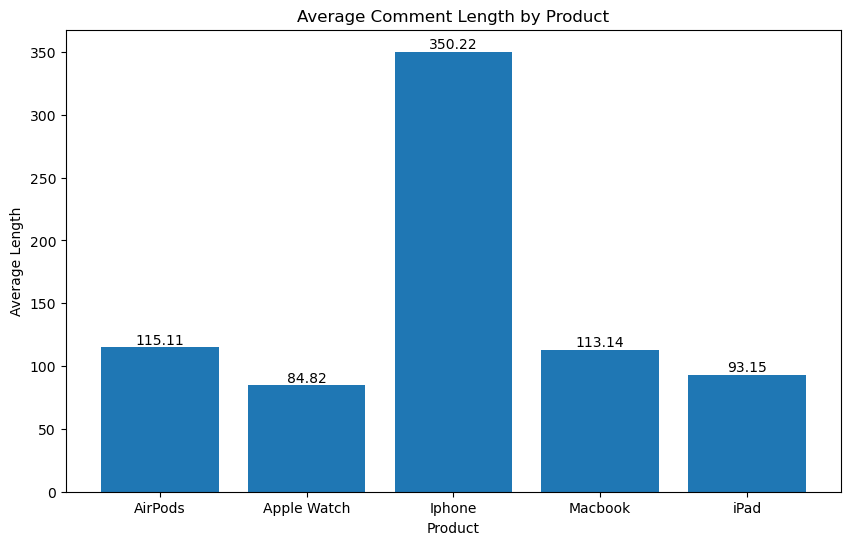

In [380]:
import matplotlib.pyplot as plt

average_lengths = df.groupby('Search')['Comment_Body'].apply(lambda x: x.str.len().mean()).reset_index()
average_lengths.rename(columns={'Comment_Body': 'Average_Length'}, inplace=True)

# Create a bigger bar chart,
plt.figure(figsize=(10, 6))

# Plot the bar chart
bar_plot = plt.bar(average_lengths['Search'], average_lengths['Average_Length'])

# Add text annotations with the average lengths on the bars
for i, value in enumerate(average_lengths['Average_Length']):
    plt.annotate(f'{value:.2f}', xy=(i, value), ha='center', va='bottom')

plt.xlabel('Product')
plt.ylabel('Average Length')
plt.title('Average Comment Length by Product')

plt.show()


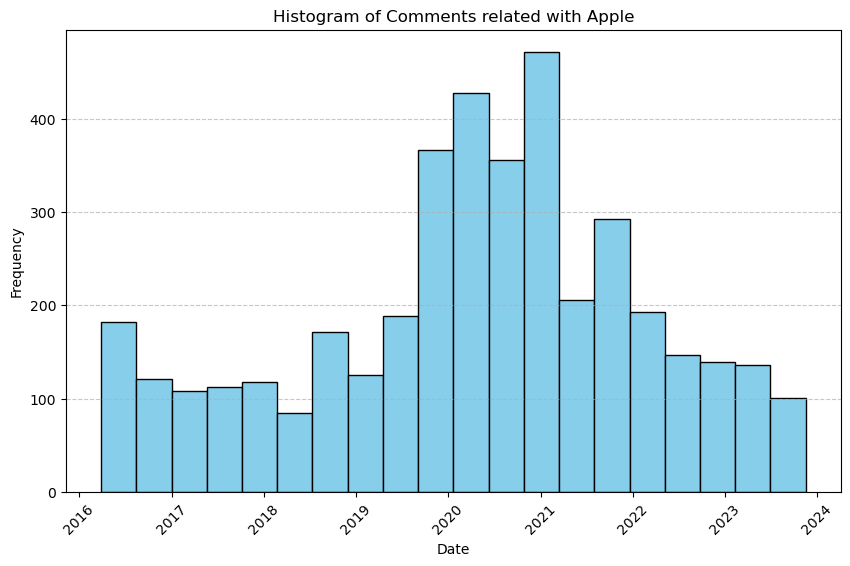

In [381]:
import matplotlib.pyplot as plt

# Create the histogram
plt.figure(figsize=(10, 6))  # Set the figure size (adjust as needed)
plt.hist(df['Date'], bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Histogram of Comments related with Apple')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines to y-axis
plt.show()


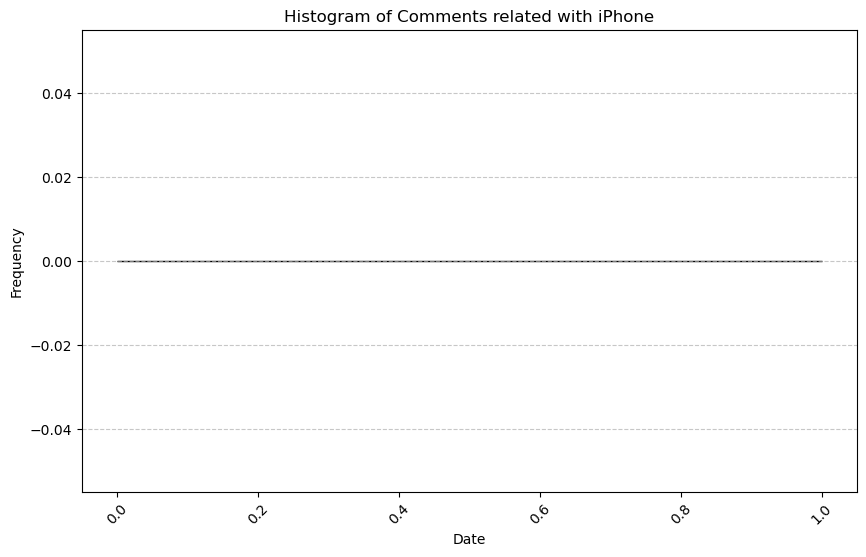

In [382]:
df_iphone = df[df['Search']=='iPhone']

plt.figure(figsize=(10, 6))  # Set the figure size (adjust as needed)
plt.hist(df_iphone['Date'], bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Histogram of Comments related with iPhone')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines to y-axis
plt.show()



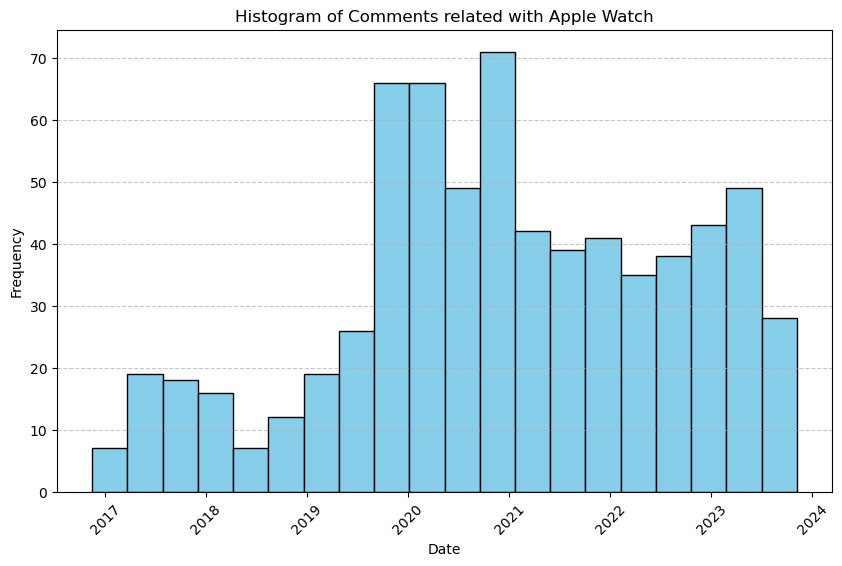

In [383]:
df_watch = df[df['Search']=='Apple Watch']

plt.figure(figsize=(10, 6))  # Set the figure size (adjust as needed)
plt.hist(df_watch['Date'], bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Histogram of Comments related with Apple Watch')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines to y-axis
plt.show()



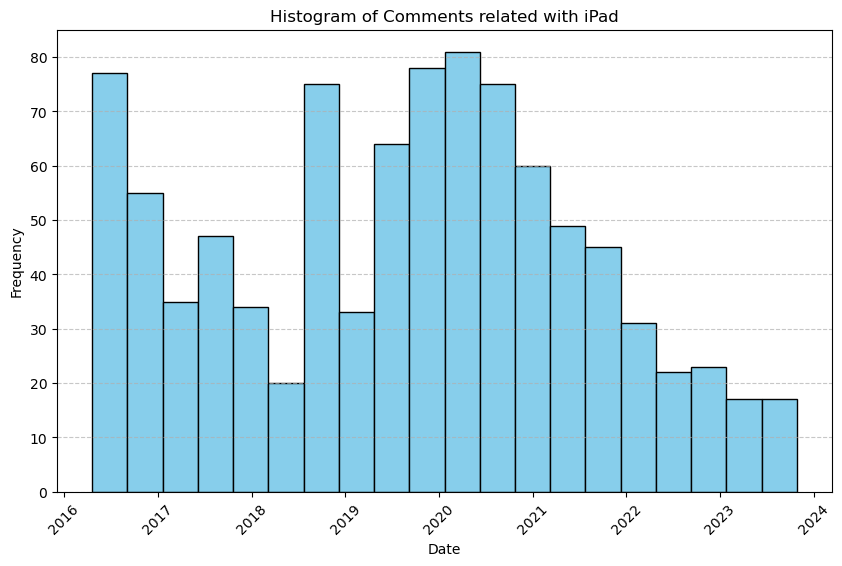

In [384]:
df_ipad = df[df['Search']=='iPad']

plt.figure(figsize=(10, 6))  # Set the figure size (adjust as needed)
plt.hist(df_ipad['Date'], bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Histogram of Comments related with iPad')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines to y-axis
plt.show()



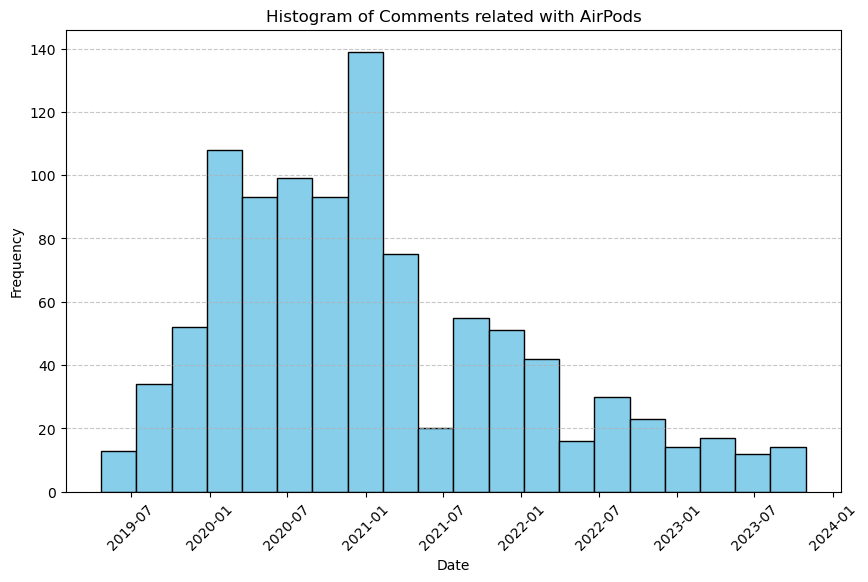

In [385]:
df_airpods = df[df['Search']=='AirPods']

plt.figure(figsize=(10, 6))  # Set the figure size (adjust as needed)
plt.hist(df_airpods['Date'], bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Histogram of Comments related with AirPods')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines to y-axis
plt.show()



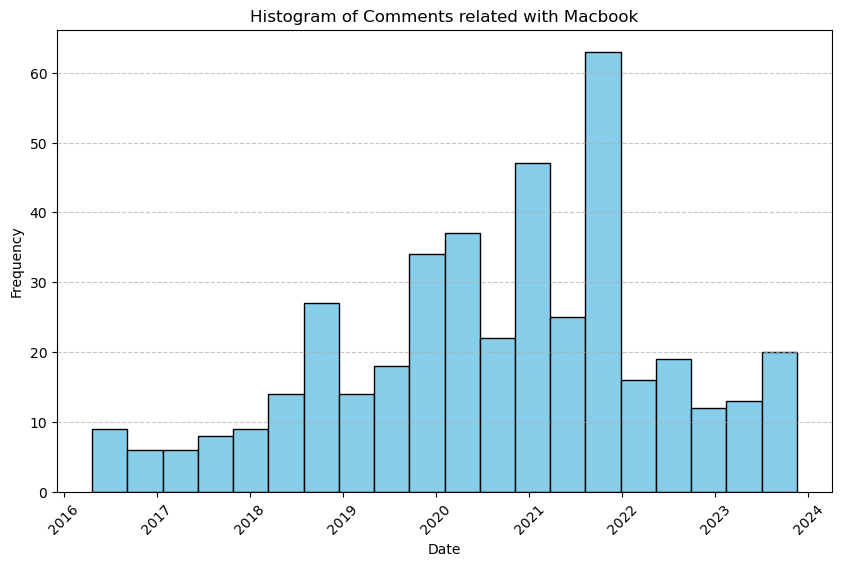

In [386]:
df_macbook = df[df['Search']=='Macbook']

plt.figure(figsize=(10, 6))  # Set the figure size (adjust as needed)
plt.hist(df_macbook['Date'], bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Histogram of Comments related with Macbook')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines to y-axis
plt.show()



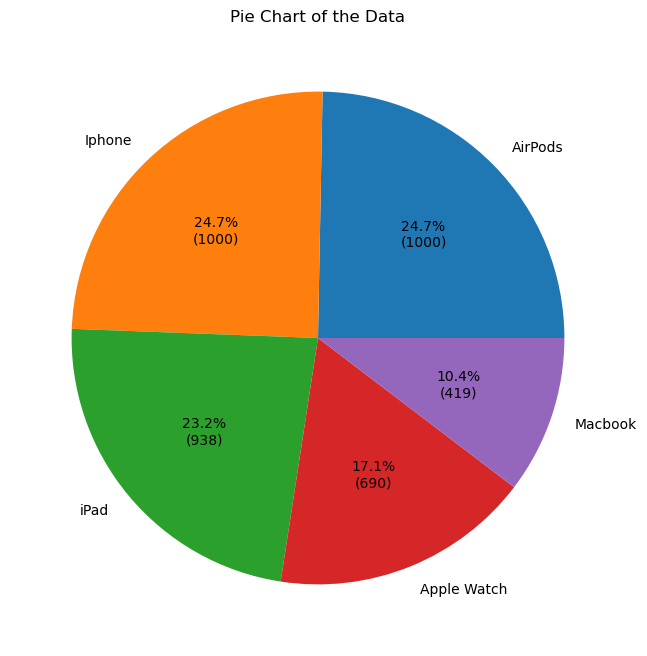

In [387]:
search_counts = df['Search'].value_counts()

# Function to format the text to be displayed on the pie chart
def func(pct, allvals):
    absolute = int(pct/100.*sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(search_counts, labels=search_counts.index, autopct=lambda pct: func(pct, search_counts))

# To display both exact values and percentages, we use a custom lambda function in autopct
plt.title("Pie Chart of the Data")
plt.show()


In [388]:
df

Search  Condition         Price  \
0     AirPods  pre-owned   £69.99 each   
1     AirPods  pre-owned   £69.99 each   
2     AirPods        new  £139.99 each   
3     AirPods        new  £139.99 each   
4     AirPods        new  £139.99 each   
...       ...        ...           ...   
4043     iPad  pre-owned         £5.00   
4044     iPad  pre-owned         £5.00   
4045     iPad  pre-owned         £5.00   
4046     iPad  pre-owned         £5.00   
4047     iPad  pre-owned         £5.00   

                                           Comment_Body       Date Language  
0     Bought these for teenage daughter on eBay, sig... 2019-11-13       en  
1     I bought these refurbished set of AirPods and ... 2020-05-28       en  
2     Pros: sound quality is excellent if you can ge... 2020-01-22       en  
3     What a clever little set of earphones, without... 2020-09-07       en  
4     The Apple AirPod Pro is a fantastic set of wir... 2021-10-13       en  
...                                                 ...        ...      ...  
4043                                               good 2021-03-16       en  
4044                                               Ipod 2019-10-09       en  
4045                                               Good 2023-06-03       en  
4046                                               Slow 2019-11-06       en  
4047                                                N/a 2022-03-02       en  

[4048 rows x 6 columns]

**7.Apply Contractions to fix the comments**

In [389]:
import contractions
df['Fixed_Comment'] = df['Comment_Body'].apply(contractions.fix)
df[df['Fixed_Comment'] != df['Comment_Body']][8:]

Search  Condition         Price  \
12    AirPods  pre-owned   £69.99 each   
13    AirPods        new  £139.99 each   
15    AirPods  pre-owned  £139.99 each   
16    AirPods        new  £139.99 each   
17    AirPods        new  £139.99 each   
...       ...        ...           ...   
3950     iPad  pre-owned         £5.00   
3960     iPad  pre-owned       £165.00   
3985     iPad        new       £114.00   
3999     iPad        new  £179.99 each   
4023     iPad        new       £165.00   

                                           Comment_Body       Date Language  \
12    Comfortable and lightweight, with good sound q... 2021-05-19       en   
13    The AirPods  Pro I was very disappointed in th... 2020-02-12       en   
15    They fit well. They don't drop out. They pair ... 2022-09-13       en   
16    They’re amazing earphones, they connected easi... 2020-12-02       en   
17    So so pleased I took the plunge. Own the Gen 2... 2020-04-22       en   
...                                                 ...        ...      ...   
3950                                 Wouldn't buy again 2021-02-24       en   
3960                                  It’s really grate 2022-04-28       en   
3985                                     It’s very good 2023-06-27       en   
3999                                        It's great. 2021-07-08       en   
4023                                          It's good 2021-03-31       en   

                                          Fixed_Comment  
12    Comfortable and lightweight, with good sound q...  
13    The AirPods  Pro I was very disappointed in th...  
15    They fit well. They do not drop out. They pair...  
16    They are amazing earphones, they connected eas...  
17    So so pleased I took the plunge. Own the Gen 2...  
...                                                 ...  
3950                                Would not buy again  
3960                                 It is really grate  
3985                                    It is very good  
3999                                       It is great.  
4023                                         It is good  

[1217 rows x 7 columns]

**8. Patterns Substitution**

In [390]:
import re

price_pattern = r'\$\d+(\.\d{2})?'   # Matches prices in the format $X.XX or $X
size_pattern = r'\b\d+(?:\.\d+)?(?:x\d+(?:\.\d+)?)?\b'   # Matches sizes like 10x10 or 2.5x3.2
volume_pattern = r'\b\d+(?:\.\d+)?\s*[Ll]\b'   # Matches volumes like 1L or 0.5 l
weight_pattern = r'\b\d+(?:\.\d+)?\s*[Kk][Gg]\b'   # Matches weights like 2.5 kg or 10.2 Kg

def substitute_patterns(text):
    text = re.sub(price_pattern, '[PRICE]', text)
    text = re.sub(size_pattern, '[SIZE]', text)
    text = re.sub(volume_pattern, '[VOLUME]', text)
    text = re.sub(weight_pattern, '[WEIGHT]', text)
    return text

df['Substituted_Comment'] = df['Fixed_Comment'].apply(substitute_patterns)
df[df['Substituted_Comment'] != df['Fixed_Comment']][['Comment_Body','Substituted_Comment']][1:]

Comment_Body  \
2     Pros: sound quality is excellent if you can ge...   
5     Arrived later than date specified, but within ...   
7     airpods are brilliant, I get at least 5 hours ...   
8     All round good products and am happy to have b...   
9     Working generally good but not 100 % compatibi...   
...                                                 ...   
3836                     100%,works well and good value   
3842                     It’s Apple great product 10/10   
3908                             Fantastic iPad in 2020   
3914                             Better than windows 10   
3995                                       10 out of 10   

                                    Substituted_Comment  
2     Pros: sound quality is excellent if you can ge...  
5     Arrived later than date specified, but within ...  
7     airpods are brilliant, I get at least [SIZE] h...  
8     All round good products and am happy to have b...  
9     Working generally good but not [SIZE] % compat...  
...                                                 ...  
3836                  [SIZE]%,works well and good value  
3842            It is Apple great product [SIZE]/[SIZE]  
3908                           Fantastic iPad in [SIZE]  
3914                         Better than windows [SIZE]  
3995                               [SIZE] out of [SIZE]  

[893 rows x 2 columns]

**9. Http links replacement**

In [391]:
link_pattern = r'https?://\S+'

def substitute_links(text):
    return re.sub(link_pattern, '[LINK]', text)

df['Replaced_Comment'] = df['Substituted_Comment'].apply(substitute_links)
df[df['Substituted_Comment'] != df['Replaced_Comment']][['Comment_Body','Replaced_Comment']]

Empty DataFrame
Columns: [Comment_Body, Replaced_Comment]
Index: []

In [392]:
df = df[df["Replaced_Comment"]!="[[LINK]"]
df = df[df["Replaced_Comment"]!="[LINK]"]
df = df[df["Replaced_Comment"]!="&#x200B;\n\n[LINK]"]
df.Search.value_counts()


AirPods        1000
Iphone         1000
iPad            938
Apple Watch     691
Macbook         419
Name: Search, dtype: int64

**10. Remove Line Breaks**

In [393]:
def remove_line_breaks(text):
    return text.replace('\n', ' ')

df['Without_LineBreaks'] = df['Replaced_Comment'].apply(remove_line_breaks)

df[df['Replaced_Comment'] != df['Without_LineBreaks']][['Comment_Body','Without_LineBreaks']]


Comment_Body  \
0     Bought these for teenage daughter on eBay, sig...   
1     I bought these refurbished set of AirPods and ...   
2     Pros: sound quality is excellent if you can ge...   
3     What a clever little set of earphones, without...   
4     The Apple AirPod Pro is a fantastic set of wir...   
...                                                 ...   
3599  Screen bright and clear\nSound ok\nFaster than...   
3606  Working as expected\nSo far very happy with th...   
3671  Good iPad\nEasy to carry every where\nLight we...   
3942                                No Faults\nAll Good   
4022                                         Ok\nThanks   

                                     Without_LineBreaks  
0     Bought these for teenage daughter on eBay, sig...  
1     I bought these refurbished set of AirPods and ...  
2     Pros: sound quality is excellent if you can ge...  
3     What a clever little set of earphones, without...  
4     The Apple AirPod Pro is a fantastic set of wir...  
...                                                 ...  
3599  Screen bright and clear Sound ok Faster than I...  
3606  Working as expected So far very happy with the...  
3671   Good iPad Easy to carry every where Light weight  
3942                                 No Faults All Good  
4022                                          Ok Thanks  

[542 rows x 2 columns]

**12. Apply TextBlob to correct comments**

In [394]:
from textblob import TextBlob

def correct_comment(comment):
    blob = TextBlob(comment)
    corrected_comment = blob.correct()
    return str(corrected_comment)

df['Corrected_Comment(SentimentAnalysis)'] = df['Without_LineBreaks'].apply(correct_comment)
df[df['Without_LineBreaks'] != df['Corrected_Comment(SentimentAnalysis)']][['Comment_Body','Corrected_Comment(SentimentAnalysis)']][2:12]


Comment_Body  \
2   Pros: sound quality is excellent if you can ge...   
3   What a clever little set of earphones, without...   
4   The Apple AirPod Pro is a fantastic set of wir...   
5   Arrived later than date specified, but within ...   
6   These are decent headphones, reasonably comfor...   
7   airpods are brilliant, I get at least 5 hours ...   
8   All round good products and am happy to have b...   
9   Working generally good but not 100 % compatibi...   
11  This item did not behave at all as expected. W...   
12  Comfortable and lightweight, with good sound q...   

                 Corrected_Comment(SentimentAnalysis)  
2   Gros: sound quality is excellent if you can ge...  
3   That a clever little set of earphones, without...  
4   The Apple AirPod Fro is a fantastic set of tir...  
5   Arrived later than date specified, but within ...  
6   These are decent headphones, reasonably comfor...  
7   airport are brilliant, I get at least [SIZE] h...  
8   All round good products and am happy to have b...  
9   Working generally good but not [SIZE] % incomp...  
11  His item did not behave at all as expected. Wh...  
12  Comfortable and lightweight, with good sound q...

In [395]:
df[df['Without_LineBreaks'] != df['Corrected_Comment(SentimentAnalysis)']][['Comment_Body','Corrected_Comment(SentimentAnalysis)']][90:100]


Comment_Body  \
95   I had to return mine because I found my old on...   
96   I already use wired apple buds,but these are f...   
98   Was a good and cheap addition whej I lost my A...   
100  was unsure if they would be worth the money at...   
102  Bought these pods for my daughter, there the l...   
103  The AirPods give you freedom from your iPhone ...   
104  In my opinion a very good headphone, comfortab...   
105  I don’t have reception in some areas of the ho...   
106  The sound quality surpasses all expectations\n...   
107  Honestly these airpods are unbelievable, save ...   

                  Corrected_Comment(SentimentAnalysis)  
95   I had to return mine because I found my old on...  
96   I already use wired apple buds,but these are f...  
98   Was a good and cheap addition when I lost my A...  
100  was ensure if they would be worth the money at...  
102  Ought these pads for my daughter, there the la...  
103  The AirPods give you freedom from your shone y...  
104  In my opinion a very good headphone, comfortab...  
105  I do not have reception in some areas of the h...  
106  The sound quality surpassed all expectations I...  
107  Honestly these airport are unbelievable, save ...

In [396]:
words_to_keep = ['Apple', 'iPhone', 'Macbook', 'AirPods', 'iPad', 'Watch', 'My', 'tech', 'stats', 'She', 'kids',
                 'Shot', 'Powered', 'Max', 'giga', 'omega', 'gamma', 'sigma', 'If', 'Just', 'lossless', 'Pro', 
                 'This', 'Hey', 'Here', 'airpods', 'mic', 'audio', 'Pros', 'airpod', 'Max', 'Hi', 'fake', 'probuds', 
                 'mum', 'My', 'Cool', 'Bro', 'So', 'No', 'Do', 'Yoda', 'pods', 'Bought', 'What', 'To', 'Do',
                 'transparency']
lowercase_words_to_keep = {word.lower() for word in words_to_keep}  # Convert words to lowercase for comparison

def correct_comment(row):
    preserved_punctuations = set(['.', ',', '!', '?', ':', ';'])
    words = re.findall(r'\w+|[^\w\s]', row)

    # Check against the lowercase version of the words
    processed_words = [word if word.lower() in lowercase_words_to_keep or word in preserved_punctuations else str(TextBlob(word).correct()) for word in words]

    return ' '.join(processed_words)

df['Corrected_Comment(SentimentAnalysis)'] = df['Without_LineBreaks'].apply(correct_comment)
df[df['Without_LineBreaks'] != df['Corrected_Comment(SentimentAnalysis)']][['Comment_Body', 'Corrected_Comment(SentimentAnalysis)']][323:]

Comment_Body  \
331   Definitely recommend\nAbsolutely brilliant val...   
332   Having noise cancelling, true sound and amazin...   
333   Excellent product as usual from Apple connect ...   
335   The cheapest price for the AirPod pros I have ...   
336   Yes mate these are class was expecting some so...   
...                                                 ...   
4034                                           The Best   
4042                                              Good.   
4044                                               Ipod   
4046                                               Slow   
4047                                                N/a   

                   Corrected_Comment(SentimentAnalysis)  
331   Definitely recommend Absolutely brilliant valu...  
332   Having noise concealing , true sound and amazi...  
333   Excellent product as usual from Apple connect ...  
335   The cheapest price for the AirPod pros I have ...  
336   Yes mate these are class was expecting some so...  
...                                                 ...  
4034                                           The West  
4042                                             Good .  
4044                                               Upon  
4046                                                Low  
4047                                              N / a  

[3036 rows x 2 columns]

**12.Add a common case stage**

In [397]:
df['Lower_Comment'] = df['Corrected_Comment(SentimentAnalysis)'].str.lower()
df[['Comment_Body', 'Lower_Comment']]


Comment_Body  \
0     Bought these for teenage daughter on eBay, sig...   
1     I bought these refurbished set of AirPods and ...   
2     Pros: sound quality is excellent if you can ge...   
3     What a clever little set of earphones, without...   
4     The Apple AirPod Pro is a fantastic set of wir...   
...                                                 ...   
4043                                               good   
4044                                               Ipod   
4045                                               Good   
4046                                               Slow   
4047                                                N/a   

                                          Lower_Comment  
0     bought these for teenage daughter on may , sig...  
1     i bought these refurbished set of airpods and ...  
2     pros : sound quality is excellent if you can g...  
3     what a clever little set of earphones , withou...  
4     the apple airpod pro is a fantastic set of tir...  
...                                                 ...  
4043                                               good  
4044                                               upon  
4045                                               good  
4046                                                low  
4047                                              n / a  

[4048 rows x 2 columns]

**13. Tokenization**

In [398]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

nltk.download('punkt')

def tokenize_text(text):
    sentences = sent_tokenize(text)   # Tokenize into sentences
    words = [word_tokenize(sentence) for sentence in sentences]   # Tokenize each sentence into words
    return ' '.join([' '.join(sentence) for sentence in words]) 

df['Tokenized_Comment'] = df['Lower_Comment'].apply(tokenize_text)
df[df['Tokenized_Comment'] != df['Lower_Comment']][['Lower_Comment', 'Tokenized_Comment']]

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Lower_Comment  \
0     bought these for teenage daughter on may , sig...   
1     i bought these refurbished set of airpods and ...   
5     arrived later than date specified , but within...   
18    these arrived this morning and i set them up w...   
21    absolutely amazing . small issue is that they ...   
...                                                 ...   
3624  being able to get goose search . cannot down l...   
3699  cannot fault it , excellent condition , perfect 😊   
3794                cannot unload any apes whatsoever 😢   
3845                    well cannot down load face time   
3933                                i cannot use andros   

                                      Tokenized_Comment  
0     bought these for teenage daughter on may , sig...  
1     i bought these refurbished set of airpods and ...  
5     arrived later than date specified , but within...  
18    these arrived this morning and i set them up w...  
21    absolutely amazing . small issue is that they ...  
...                                                 ...  
3624  being able to get goose search . can not down ...  
3699  can not fault it , excellent condition , perfe...  
3794               can not unload any apes whatsoever 😢  
3845                   well can not down load face time  
3933                               i can not use andros  

[221 rows x 2 columns]

**14. Remove the stopwords**

In [399]:
from nltk.corpus import stopwords

def remove_stopwords_except_not(text):
    stop_words = set(stopwords.words('english'))
    stop_words.remove("not")
    words = text.split()  # Split the space-separated string into a list of words
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)  # Convert the list of words back to a space-separated string

# Apply the remove_stopwords function to the "Tokenized_Comment" column
df['Without_Stopwords'] = df['Tokenized_Comment'].apply(remove_stopwords_except_not)
df[df['Tokenized_Comment'] != df['Without_Stopwords']][['Tokenized_Comment', 'Without_Stopwords']]


Tokenized_Comment  \
0     bought these for teenage daughter on may , sig...   
1     i bought these refurbished set of airpods and ...   
2     pros : sound quality is excellent if you can g...   
3     what a clever little set of earphones , withou...   
4     the apple airpod pro is a fantastic set of tir...   
...                                                 ...   
4030                                          very good   
4032                                          thank you   
4033                                          very very   
4034                                           the west   
4047                                              n / a   

                                      Without_Stopwords  
0     bought teenage daughter may , significantly rr...  
1     bought refurbished set airpods must say blown ...  
2     pros : sound quality excellent get good seal e...  
3     clever little set earphones , without music no...  
4     apple airpod pro fantastic set tireless headph...  
...                                                 ...  
4030                                               good  
4032                                              thank  
4033                                                     
4034                                               west  
4047                                                n /  

[3837 rows x 2 columns]

**15. Remove emojis, punctations**

In [400]:
import string

def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # Emoticons
                               u"\U0001F300-\U0001F5FF"  # Symbols & Pictographs
                               u"\U0001F680-\U0001F6FF"  # Transport & Map Symbols
                               u"\U0001F700-\U0001F77F"  # Alchemical Symbols
                               u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                               u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                               u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                               u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                               u"\U00002702-\U000027B0"  # Dingbats
                               u"\U000024C2-\U0001F251" 
                               "]+")
    return emoji_pattern.sub(r'', text)

def remove_punctuation_and_quotes(text):
    # Combine the punctuation string with the double quote character
    custom_punctuation = string.punctuation + '"' + "“"
    return text.translate(str.maketrans('', '', custom_punctuation))

# Apply the functions to the "Without_Stopwords" column
df['Prepared_Comment'] = df['Without_Stopwords'].apply(remove_emojis)
df['Prepared_Comment'] = df['Prepared_Comment'].apply(remove_punctuation_and_quotes)

df[df['Prepared_Comment'] != df['Without_Stopwords']][['Comment_Body', 'Prepared_Comment']][1240:]

Comment_Body Prepared_Comment
1605  all good, thanks     good  thanks
1606  Very nice watch.      nice watch 
1609  Love this watch!      love watch 
1610  Love This watch.      love watch 
1629     Great value !     great value 
...                ...              ...
4009        Thank you.           thank 
4012        I love it!            love 
4037           Great 😊           great 
4042             Good.            good 
4047               N/a               n 

[1920 rows x 2 columns]

**16. Apply lemmatisation**

In [401]:
from nltk.stem import WordNetLemmatizer

nltk.download('omw-1.4')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
    return ' '.join(lemmatized_words)

df['Lemmatized_Comment'] = df['Prepared_Comment'].apply(preprocess_text)
df[df['Lemmatized_Comment'] != df['Prepared_Comment']][['Prepared_Comment', 'Lemmatized_Comment']][:]

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Prepared_Comment  \
0     bought teenage daughter may  significantly rrp...   
1     bought refurbished set airpods must say blown ...   
2     pros  sound quality excellent get good seal ea...   
3     clever little set earphones  without music noi...   
4     apple airpod pro fantastic set tireless headph...   
...                                                 ...   
4009                                             thank    
4012                                              love    
4037                                             great    
4042                                              good    
4047                                                 n    

                                     Lemmatized_Comment  
0     bought teenage daughter may significantly rrp ...  
1     bought refurbished set airpods must say blown ...  
2     pro sound quality excellent get good seal ear ...  
3     clever little set earphone without music noise...  
4     apple airpod pro fantastic set tireless headph...  
...                                                 ...  
4009                                              thank  
4012                                               love  
4037                                              great  
4042                                               good  
4047                                                  n  

[3440 rows x 2 columns]

**17. Remove the unnecessary columns**

In [402]:
df = df[['Search', 'Price', 'Condition',  'Comment_Body', 'Lemmatized_Comment', 'Corrected_Comment(SentimentAnalysis)']]
df


Search         Price  Condition  \
0     AirPods   £69.99 each  pre-owned   
1     AirPods   £69.99 each  pre-owned   
2     AirPods  £139.99 each        new   
3     AirPods  £139.99 each        new   
4     AirPods  £139.99 each        new   
...       ...           ...        ...   
4043     iPad         £5.00  pre-owned   
4044     iPad         £5.00  pre-owned   
4045     iPad         £5.00  pre-owned   
4046     iPad         £5.00  pre-owned   
4047     iPad         £5.00  pre-owned   

                                           Comment_Body  \
0     Bought these for teenage daughter on eBay, sig...   
1     I bought these refurbished set of AirPods and ...   
2     Pros: sound quality is excellent if you can ge...   
3     What a clever little set of earphones, without...   
4     The Apple AirPod Pro is a fantastic set of wir...   
...                                                 ...   
4043                                               good   
4044                                               Ipod   
4045                                               Good   
4046                                               Slow   
4047                                                N/a   

                                     Lemmatized_Comment  \
0     bought teenage daughter may significantly rrp ...   
1     bought refurbished set airpods must say blown ...   
2     pro sound quality excellent get good seal ear ...   
3     clever little set earphone without music noise...   
4     apple airpod pro fantastic set tireless headph...   
...                                                 ...   
4043                                               good   
4044                                               upon   
4045                                               good   
4046                                                low   
4047                                                  n   

                   Corrected_Comment(SentimentAnalysis)  
0     Bought these for teenage daughter on may , sig...  
1     I bought these refurbished set of AirPods and ...  
2     Pros : sound quality is excellent if you can g...  
3     What a clever little set of earphones , withou...  
4     The Apple AirPod Pro is a fantastic set of tir...  
...                                                 ...  
4043                                               good  
4044                                               Upon  
4045                                               Good  
4046                                                Low  
4047                                              N / a  

[4048 rows x 6 columns]

**18. Rename the columns**

In [403]:
df.rename(columns={'Comment_Body': 'Comment', 'Lemmatized_Comment': 'Cleaned_Comment',
                   'Corrected_Comment(SentimentAnalysis)': 'Sentiment_Comment'}, inplace=True)
df

Search         Price  Condition  \
0     AirPods   £69.99 each  pre-owned   
1     AirPods   £69.99 each  pre-owned   
2     AirPods  £139.99 each        new   
3     AirPods  £139.99 each        new   
4     AirPods  £139.99 each        new   
...       ...           ...        ...   
4043     iPad         £5.00  pre-owned   
4044     iPad         £5.00  pre-owned   
4045     iPad         £5.00  pre-owned   
4046     iPad         £5.00  pre-owned   
4047     iPad         £5.00  pre-owned   

                                                Comment  \
0     Bought these for teenage daughter on eBay, sig...   
1     I bought these refurbished set of AirPods and ...   
2     Pros: sound quality is excellent if you can ge...   
3     What a clever little set of earphones, without...   
4     The Apple AirPod Pro is a fantastic set of wir...   
...                                                 ...   
4043                                               good   
4044                                               Ipod   
4045                                               Good   
4046                                               Slow   
4047                                                N/a   

                                        Cleaned_Comment  \
0     bought teenage daughter may significantly rrp ...   
1     bought refurbished set airpods must say blown ...   
2     pro sound quality excellent get good seal ear ...   
3     clever little set earphone without music noise...   
4     apple airpod pro fantastic set tireless headph...   
...                                                 ...   
4043                                               good   
4044                                               upon   
4045                                               good   
4046                                                low   
4047                                                  n   

                                      Sentiment_Comment  
0     Bought these for teenage daughter on may , sig...  
1     I bought these refurbished set of AirPods and ...  
2     Pros : sound quality is excellent if you can g...  
3     What a clever little set of earphones , withou...  
4     The Apple AirPod Pro is a fantastic set of tir...  
...                                                 ...  
4043                                               good  
4044                                               Upon  
4045                                               Good  
4046                                                Low  
4047                                              N / a  

[4048 rows x 6 columns]

**19. Check the na rows**

In [404]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4048 entries, 0 to 4047
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Search             4048 non-null   object
 1   Price              4048 non-null   object
 2   Condition          4048 non-null   object
 3   Comment            4048 non-null   object
 4   Cleaned_Comment    4048 non-null   object
 5   Sentiment_Comment  4048 non-null   object
dtypes: object(6)
memory usage: 221.4+ KB


**20. Calculate the length**

In [405]:
df['Length'] = df['Comment'].apply(len)
df

Search         Price  Condition  \
0     AirPods   £69.99 each  pre-owned   
1     AirPods   £69.99 each  pre-owned   
2     AirPods  £139.99 each        new   
3     AirPods  £139.99 each        new   
4     AirPods  £139.99 each        new   
...       ...           ...        ...   
4043     iPad         £5.00  pre-owned   
4044     iPad         £5.00  pre-owned   
4045     iPad         £5.00  pre-owned   
4046     iPad         £5.00  pre-owned   
4047     iPad         £5.00  pre-owned   

                                                Comment  \
0     Bought these for teenage daughter on eBay, sig...   
1     I bought these refurbished set of AirPods and ...   
2     Pros: sound quality is excellent if you can ge...   
3     What a clever little set of earphones, without...   
4     The Apple AirPod Pro is a fantastic set of wir...   
...                                                 ...   
4043                                               good   
4044                                               Ipod   
4045                                               Good   
4046                                               Slow   
4047                                                N/a   

                                        Cleaned_Comment  \
0     bought teenage daughter may significantly rrp ...   
1     bought refurbished set airpods must say blown ...   
2     pro sound quality excellent get good seal ear ...   
3     clever little set earphone without music noise...   
4     apple airpod pro fantastic set tireless headph...   
...                                                 ...   
4043                                               good   
4044                                               upon   
4045                                               good   
4046                                                low   
4047                                                  n   

                                      Sentiment_Comment  Length  
0     Bought these for teenage daughter on may , sig...    1971  
1     I bought these refurbished set of AirPods and ...    1106  
2     Pros : sound quality is excellent if you can g...     846  
3     What a clever little set of earphones , withou...     782  
4     The Apple AirPod Pro is a fantastic set of tir...     773  
...                                                 ...     ...  
4043                                               good       4  
4044                                               Upon       4  
4045                                               Good       4  
4046                                                Low       4  
4047                                              N / a       3  

[4048 rows x 7 columns]

In [406]:
df_ipad = df[df['Search']=='iPad']
df_iphone = df[df['Search']=='iPhone']
df_watch = df[df['Search']=='Apple Watch']
df_airpods = df[df['Search']=='AirPods']
df_mac = df[df['Search']=='Macbook']

In [407]:
df.Length.describe()

count    4048.000000
mean      162.727520
std       171.232879
min         2.000000
25%        49.000000
50%        99.000000
75%       239.000000
max      1971.000000
Name: Length, dtype: float64

In [408]:
df.Length.mode()

0    41
Name: Length, dtype: int64

In [409]:
df.sort_values(by='Length', ascending=False).head(10)


Search         Price           Condition  \
0         AirPods   £69.99 each           pre-owned   
1691       Iphone       £183.00           pre-owned   
1692       Iphone       £159.99                 new   
1693       Iphone         £5.00           pre-owned   
1694       Iphone       £339.99           pre-owned   
1000  Apple Watch        £16.00           pre-owned   
1695       Iphone       £159.99           pre-owned   
1696       Iphone         £5.00           pre-owned   
1697       Iphone  £199.00 each  innofinity-worl...   
1698       Iphone        £29.99           pre-owned   

                                                Comment  \
0     Bought these for teenage daughter on eBay, sig...   
1691  I've owned and used an iPhone 6S (standard siz...   
1692  The 2016 iPhone SE is one of the best products...   
1693  This is my first smartphone and because I am a...   
1694  My wife likes to hang onto things and is not o...   
1000  A computer on your wrist. Apple high quality, ...   
1695  For the age of the phone It Is Quick and very ...   
1696  My other phone is a 6" android with a better b...   
1697  My existing phone is lovely, but it takes too ...   
1698  Was promised next day delivery but arrived a d...   

                                        Cleaned_Comment  \
0     bought teenage daughter may significantly rrp ...   
1691  owned used iphone standard size since came alm...   
1692  size iphone one best product apple ever made c...   
1693  first smartphone skinflint old unlocked model ...   
1694  wife like hang onto thing one unnecessary chan...   
1000  computer wrist apple high quality reliable one...   
1695  age phone quick unfordable able run latest sof...   
1696  phone size andros better battery easy back sin...   
1697  existing phone lovely take long charge size ho...   
1698  promised next day delivery arrived day later g...   

                                      Sentiment_Comment  Length  
0     Bought these for teenage daughter on may , sig...    1971  
1691  I have owned and used an iPhone Of ( standard ...    1921  
1692  The [ SIZE ] iPhone of is one of the best prod...    1534  
1693  This is my first smartphone and because I am a...    1478  
1694  My wife likes to hang onto things and is not o...    1417  
1000  A computer on your wrist . Apple high quality ...    1366  
1695  For the age of the phone It Is Quick and very ...    1366  
1696  My other phone is a [ SIZE ] " andros with a b...    1342  
1697  My existing phone is lovely , but it takes too...    1304  
1698  Was promised next day delivery but arrived a d...    1298

In [410]:
df.sort_values(by='Length', ascending=True).head(10)


Search         Price  Condition Comment Cleaned_Comment  \
1690  Apple Watch        £16.00  pre-owned      A+                   
4047         iPad         £5.00  pre-owned     N/a               n   
1689  Apple Watch       £200.00        new     Yes             yes   
1688  Apple Watch        £18.20  pre-owned    Good            good   
1687  Apple Watch        £50.00    tomijee    good            good   
3105      Macbook  £159.99 each        new    Good            good   
3106      Macbook  £159.99 each  pre-owned    Best            west   
3107      Macbook       £430.00  pre-owned    good            good   
3108      Macbook       £309.99        new    GOOD            good   
3109      Macbook       £169.00  pre-owned    A+++                   

     Sentiment_Comment  Length  
1690               A +       2  
4047             N / a       3  
1689               Yes       3  
1688              Good       4  
1687              good       4  
3105              Good       4  
3106              West       4  
3107              good       4  
3108              GOOD       4  
3109           A + + +       4

In [411]:
df_ipad.sort_values(by='Length', ascending=False).head(10)


Search    Price  Condition  \
3110   iPad  £410.00  pre-owned   
3111   iPad   £21.00  pre-owned   
3112   iPad    £5.00  pre-owned   
3113   iPad   £21.00  pre-owned   
3114   iPad   £21.00  pre-owned   
3115   iPad    £5.00  pre-owned   
3116   iPad    £5.00  pre-owned   
3117   iPad  £114.00  pre-owned   
3118   iPad    £5.00  pre-owned   
3119   iPad    £5.00  pre-owned   

                                                Comment  \
3110  Good product but still very pricey! The ipad a...   
3111  My iPad 2 was getting slow thanks, probably, t...   
3112  My only criticism is that the charging lead in...   
3113  The IPAD AIR 2 is still an OK IPAD. However, w...   
3114  Bought for my daughter who is NOT easy to plea...   
3115  I bought this for my son.\nThis iPad was my fi...   
3116  Though give this a go, a reasonably simple sta...   
3117  It’s so much cheaper than 10th gen. I got a re...   
3118  I've been so happy with these iPads for my kid...   
3119  I bought this tablet for my 10yr old granddaug...   

                                        Cleaned_Comment  \
3110  good product still price ipad air better chip ...   
3111  ipad size getting slow thanks probably later a...   
3112  criticism charging lead picture suggests newer...   
3113  ipad air size still ipad however whilst probab...   
3114  bought daughter easy please could find problem...   
3115  bought son ipad first apple product know much ...   
3116  though give go reasonably simple start get ins...   
3117  much cheaper gen got really good deal slightly...   
3118  happy head kid purchased size first one nearly...   
3119  bought tablet 10yr old granddaughter play game...   

                                      Sentiment_Comment  Length  
3110  Good product but still very prices ! The ipad ...    1284  
3111  My iPad [ SIZE ] was getting slow thanks , pro...    1163  
3112  My only criticism is that the charging lead in...    1011  
3113  The IPAD AIR [ SIZE ] is still an of IPAD . Ho...     779  
3114  Bought for my daughter who is NOT easy to plea...     663  
3115  I bought this for my son . This iPad was my fi...     585  
3116  Though give this a go , a reasonably simple st...     565  
3117  It is so much cheaper than with gen . I got a ...     559  
3118  I have been so happy with these heads for my k...     546  
3119  I bought this tablet for my 10yr old granddaug...     521

In [412]:
df_ipad.sort_values(by='Length', ascending=True).head(10)


Search    Price  Condition  Comment Cleaned_Comment Sentiment_Comment  \
4047   iPad    £5.00  pre-owned      N/a               n             N / a   
4043   iPad    £5.00  pre-owned     good            good              good   
4046   iPad    £5.00  pre-owned     Slow             low               Low   
4045   iPad    £5.00  pre-owned     Good            good              Good   
4044   iPad    £5.00  pre-owned     Ipod            upon              Upon   
4041   iPad    £5.00  pre-owned    Happy           happy             Happy   
4042   iPad    £5.00  pre-owned    Good.            good            Good .   
4039   iPad    £5.00  pre-owned   Thanks          thanks            Thanks   
4040   iPad    £5.00  pre-owned   thanks          thanks            thanks   
4038   iPad  £102.00  pre-owned  Perfect         perfect           Perfect   

      Length  
4047       3  
4043       4  
4046       4  
4045       4  
4044       4  
4041       5  
4042       5  
4039       6  
4040       6  
4038       7

In [413]:
df_iphone.sort_values(by='Length', ascending=False).head(10)


Empty DataFrame
Columns: [Search, Price, Condition, Comment, Cleaned_Comment, Sentiment_Comment, Length]
Index: []

In [414]:
df_iphone.sort_values(by='Length', ascending=True).head(10)


Empty DataFrame
Columns: [Search, Price, Condition, Comment, Cleaned_Comment, Sentiment_Comment, Length]
Index: []

In [415]:
df_watch.sort_values(by='Length', ascending=False).head(10)


Search    Price  Condition  \
1000  Apple Watch   £16.00  pre-owned   
1001  Apple Watch   £10.00  pre-owned   
1002  Apple Watch  £120.00  pre-owned   
1003  Apple Watch   £65.00  pre-owned   
1004  Apple Watch   £59.99  pre-owned   
1005  Apple Watch  £319.99  pre-owned   
1006  Apple Watch   £33.00        new   
1007  Apple Watch   £90.00  pre-owned   
1008  Apple Watch   £59.99        new   
1009  Apple Watch  £110.00  pre-owned   

                                                Comment  \
1000  A computer on your wrist. Apple high quality, ...   
1001  After purchasing a new s7 I felt my s3 was loo...   
1002  I really wanted to have a larger screen and I ...   
1003  This is my third smart watch- first shall be n...   
1004  Apple design and style is clean and welcoming....   
1005  Apple watch series 8 is a really great piece o...   
1006  Very easy to set up and use. Great motivationa...   
1007  Worth buying, after research I realised most s...   
1008  The Apple USB SuperDrive is a good product, it...   
1009  You can answer your iPhone, even if it’s in an...   

                                        Cleaned_Comment  \
1000  computer wrist apple high quality reliable one...   
1001  purchasing new felt looking little worse wear ...   
1002  really wanted larger screen got want pay full ...   
1003  third smart watch first shall careless consign...   
1004  apple design style clean welcoming simple roun...   
1005  apple watch series size really great piece kit...   
1006  easy set use great motivation cadet help monit...   
1007  north buying research realised speak highly up...   
1008  apple usb superdrive good product play dvd rec...   
1009  answer iphone even another room charge monitor...   

                                      Sentiment_Comment  Length  
1000  A computer on your wrist . Apple high quality ...    1366  
1001  After purchasing a new s I felt my s was looki...     821  
1002  I really wanted to have a larger screen and I ...     686  
1003  This is my third smart watch - first shall be ...     669  
1004  Apple design and style is clean and welcoming ...     651  
1005  Apple watch series [ SIZE ] is a really great ...     538  
1006  Very easy to set up and use . Great motivation...     515  
1007  North buying , after research I realised most ...     485  
1008  The Apple USB SuperDrive is a good product , i...     484  
1009  You can answer your iPhone , even if it is in ...     446

In [416]:
df_watch.sort_values(by='Length', ascending=True).head(10)


Search    Price  Condition Comment Cleaned_Comment  \
1690  Apple Watch   £16.00  pre-owned      A+                   
1689  Apple Watch  £200.00        new     Yes             yes   
1687  Apple Watch   £50.00    tomijee    good            good   
1688  Apple Watch   £18.20  pre-owned    Good            good   
1686  Apple Watch   £90.00        new   Ok...               k   
1685  Apple Watch   £90.00        new   Brill           drill   
1684  Apple Watch  £110.00  pre-owned   Great           great   
1683  Apple Watch   £59.99  pre-owned  noisey           noise   
1682  Apple Watch  £150.00        new  Great!           great   
1681  Apple Watch   £49.51        new  Thanks          thanks   

     Sentiment_Comment  Length  
1690               A +       2  
1689               Yes       3  
1687              good       4  
1688              Good       4  
1686           K . . .       5  
1685             Drill       5  
1684             Great       5  
1683             noise       6  
1682           Great !       6  
1681            Thanks       6

In [417]:
df_airpods.sort_values(by='Length', ascending=False).head(10)


Search         Price  Condition  \
0  AirPods   £69.99 each  pre-owned   
1  AirPods   £69.99 each  pre-owned   
2  AirPods  £139.99 each        new   
3  AirPods  £139.99 each        new   
4  AirPods  £139.99 each        new   
5  AirPods   £69.99 each  pre-owned   
6  AirPods       £389.99  pre-owned   
7  AirPods   £69.99 each        new   
8  AirPods  £139.99 each        new   
9  AirPods  £139.99 each        new   

                                             Comment  \
0  Bought these for teenage daughter on eBay, sig...   
1  I bought these refurbished set of AirPods and ...   
2  Pros: sound quality is excellent if you can ge...   
3  What a clever little set of earphones, without...   
4  The Apple AirPod Pro is a fantastic set of wir...   
5  Arrived later than date specified, but within ...   
6  These are decent headphones, reasonably comfor...   
7  airpods are brilliant, I get at least 5 hours ...   
8  All round good products and am happy to have b...   
9  Working generally good but not 100 % compatibi...   

                                     Cleaned_Comment  \
0  bought teenage daughter may significantly rrp ...   
1  bought refurbished set airpods must say blown ...   
2  pro sound quality excellent get good seal ear ...   
3  clever little set earphone without music noise...   
4  apple airpod pro fantastic set tireless headph...   
5  arrived later date specified within week first...   
6  decent headphone reasonably comfortable end ne...   
7  airpods brilliant get least size hour charge k...   
8  round good product happy bought connected ipho...   
9  working generally good size incompatibility an...   

                                   Sentiment_Comment  Length  
0  Bought these for teenage daughter on may , sig...    1971  
1  I bought these refurbished set of AirPods and ...    1106  
2  Pros : sound quality is excellent if you can g...     846  
3  What a clever little set of earphones , withou...     782  
4  The Apple AirPod Pro is a fantastic set of tir...     773  
5  Arrived later than date specified , but within...     644  
6  These are decent headphones , reasonably comfo...     536  
7  airpods are brilliant , I get at least [ SIZE ...     527  
8  All round good products and am happy to have b...     485  
9  Working generally good but not [ SIZE ] % inco...     459

In [418]:
df_airpods.sort_values(by='Length', ascending=True).head(10)


Search         Price   Condition  \
999  AirPods  £139.99 each   pre-owned   
996  AirPods   £69.99 each   pre-owned   
998  AirPods   £69.99 each   pre-owned   
997  AirPods   £69.99 each   pre-owned   
995  AirPods   £69.99 each   pre-owned   
984  AirPods   £69.99 each         new   
985  AirPods   £69.99 each   pre-owned   
986  AirPods   £69.99 each  fcjurkam25   
987  AirPods  £139.99 each         new   
988  AirPods   £69.99 each         new   

                                      Comment  \
999   Very good great sound excellent quality   
996   No faults at all happy with my purchase   
998   Charger stopped eirking, waste my money   
997   Looks completely brand new good product   
995  It is easy to use and good sound quality   
984  It’s genuine and easy to use I like that   
985  No accept return .... isn’t genuine  lye   
986  Nice to do buisness with would recommend   
987  One of the ear stopped working too early   
988  excellent value and the sound is amazing   

                            Cleaned_Comment  \
999      good great sound excellent quality   
996                    fault happy purchase   
998       larger stopped firing waste money   
997  look completely brand new good product   
995             easy use good sound quality   
984                   genuine easy use like   
985               accept return genuine eye   
986           vice business would recommend   
987           one ear stopped working early   
988           excellent value sound amazing   

                               Sentiment_Comment  Length  
999      Very good great sound excellent quality      39  
996      No faults at all happy with my purchase      39  
998       Larger stopped firing , waste my money      39  
997      Looks completely brand new good product      39  
995     It is easy to use and good sound quality      40  
984    It is genuine and easy to use I like that      40  
985  No accept return . . . . is not genuine eye      40  
986     Vice to do business with would recommend      40  
987     One of the ear stopped working too early      40  
988     excellent value and the sound is amazing      40

In [419]:
df_mac.sort_values(by='Length', ascending=False).head(10)


Search         Price           Condition  \
2691  Macbook       £430.00           pre-owned   
2692  Macbook       £430.00                 new   
2693  Macbook       £407.00                 new   
2694  Macbook       £200.00                 new   
2695  Macbook        £85.00           pre-owned   
2696  Macbook       £200.00  outlet-returns....   
2697  Macbook  £159.99 each           pre-owned   
2698  Macbook       £299.99           pre-owned   
2699  Macbook       £407.00         loop_mobile   
2700  Macbook       £407.00           pre-owned   

                                                Comment  \
2691  When I first saw apple were switching chips I ...   
2692  Everything you would expect from Apple. Solid ...   
2693  My 11year old laptop needed to be replaced so ...   
2694  Being a life long Windows user, this is my fir...   
2695  If you love apple technology, you'll love this...   
2696  I've always used apple (you either love it or ...   
2697  I was devastated when my 10 year old MacBook P...   
2698  An excellent laptop I bought for my daughter w...   
2699  To say that this is a refurbed product I was s...   
2700  These machines are amazing. Super super fast, ...   

                                        Cleaned_Comment  \
2691  first saw apple twitching chip thought would e...   
2692  everything would expect apple solid build qual...   
2693  year old lawton needed replaced research lawto...   
2694  life long window user first macos computer mac...   
2695  love apple technology love macbook pink pink l...   
2696  always used apple either love hate macbook air...   
2697  devastated size year old macbook pro refused b...   
2698  excellent lawton bought daughter using everyda...   
2699  say returned product shocked perfect condition...   
2700  machine amazing super super fast run cool cold...   

                                      Sentiment_Comment  Length  
2691  When I first saw apple were twitching chips I ...    1030  
2692  Everything you would expect from Apple . Solid...     853  
2693  My year old lawton needed to be replaced so I ...     843  
2694  Being a life long Windows user , this is my fi...     721  
2695  If you love apple technology , you will love t...     691  
2696  I have always used apple ( you either love it ...     684  
2697  I was devastated when my [ SIZE ] year old Mac...     655  
2698  In excellent lawton I bought for my daughter w...     612  
2699  To say that this is a returned product I was s...     582  
2700  These machines are amazing . Super super fast ...     516

In [420]:
df_mac.sort_values(by='Length', ascending=True).head(10)


Search         Price  Condition  Comment Cleaned_Comment  \
3109  Macbook       £169.00  pre-owned     A+++                   
3105  Macbook  £159.99 each        new     Good            good   
3108  Macbook       £309.99        new     GOOD            good   
3107  Macbook       £430.00  pre-owned     good            good   
3106  Macbook  £159.99 each  pre-owned     Best            west   
3103  Macbook       £120.00  pre-owned   Great!           great   
3104  Macbook       £199.99  pre-owned   A+++++                   
3102  Macbook      US $1.99        new   Useful          useful   
3101  Macbook  £159.99 each  pre-owned  Spot on            spot   
3100  Macbook  £159.99 each  pre-owned  Perfect         perfect   

     Sentiment_Comment  Length  
3109           A + + +       4  
3105              Good       4  
3108              GOOD       4  
3107              good       4  
3106              West       4  
3103           Great !       6  
3104       A + + + + +       6  
3102            Useful       6  
3101           Spot on       7  
3100           Perfect       7

**22. Term Frequency**

In [421]:
from collections import Counter

all_comments = ' '.join(df['Cleaned_Comment'])

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

words = word_tokenize(all_comments)

word_counter = Counter(words)

most_common_words = word_counter.most_common(20)

print("Most common 20 words and their frequencies:")
for word, frequency in most_common_words:
    print(f"{word}: {frequency}")

Most common 20 words and their frequencies:
size: 1704
phone: 1466
good: 1292
great: 981
iphone: 838
battery: 778
apple: 670
new: 626
product: 622
work: 603
would: 575
use: 555
one: 541
quality: 524
well: 483
price: 463
screen: 450
like: 431
bought: 422
happy: 416


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [422]:
from collections import Counter

all_comments = ' '.join(df_ipad['Cleaned_Comment'])

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

words = word_tokenize(all_comments)

word_counter = Counter(words)

most_common_words = word_counter.most_common(20)

print("Most common 20 words and their frequencies for iPad:")
for word, frequency in most_common_words:
    print(f"{word}: {frequency}")

Most common 20 words and their frequencies for iPad:
good: 285
ipad: 257
size: 180
great: 162
product: 135
new: 113
excellent: 102
value: 99
quality: 99
happy: 97
work: 93
price: 86
screen: 86
well: 84
would: 83
bought: 78
condition: 78
one: 76
pleased: 75
battery: 73


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [423]:
from collections import Counter

all_comments = ' '.join(df_iphone['Cleaned_Comment'])

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

words = word_tokenize(all_comments)

word_counter = Counter(words)

most_common_words = word_counter.most_common(20)

print("Most common 20 words and their frequencies for iPhone:")
for word, frequency in most_common_words:
    print(f"{word}: {frequency}")

Most common 20 words and their frequencies for iPhone:


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [424]:
from collections import Counter

all_comments = ' '.join(df_watch['Cleaned_Comment'])

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

words = word_tokenize(all_comments)

word_counter = Counter(words)

most_common_words = word_counter.most_common(20)

print("Most common 20 words and their frequencies for Apple Watch:")
for word, frequency in most_common_words:
    print(f"{word}: {frequency}")

Most common 20 words and their frequencies for Apple Watch:
watch: 286
great: 153
apple: 136
good: 123
size: 103
product: 102
work: 71
would: 65
well: 63
new: 60
love: 59
quality: 57
happy: 55
excellent: 54
one: 52
recommend: 52
use: 50
price: 46
really: 46
battery: 41


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [425]:
from collections import Counter

all_comments = ' '.join(df_airpods['Cleaned_Comment'])

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

words = word_tokenize(all_comments)

word_counter = Counter(words)

most_common_words = word_counter.most_common(20)

print("Most common 20 words and their frequencies for AirPods:")
for word, frequency in most_common_words:
    print(f"{word}: {frequency}")

Most common 20 words and their frequencies for AirPods:
good: 268
great: 264
sound: 235
airpods: 214
quality: 192
product: 187
apple: 173
work: 167
size: 153
use: 131
price: 124
easy: 121
would: 104
well: 102
one: 98
bought: 94
happy: 91
ear: 91
really: 86
case: 82


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [426]:
from collections import Counter

all_comments = ' '.join(df_mac['Cleaned_Comment'])

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

words = word_tokenize(all_comments)

word_counter = Counter(words)

most_common_words = word_counter.most_common(20)

print("Most common 20 words and their frequencies for Macbook:")
for word, frequency in most_common_words:
    print(f"{word}: {frequency}")

Most common 20 words and their frequencies for Macbook:
good: 102
macbook: 87
size: 87
great: 85
product: 73
lawton: 70
new: 60
work: 57
apple: 55
quality: 47
would: 46
excellent: 45
one: 38
pro: 37
happy: 35
fast: 33
recommend: 33
price: 33
condition: 33
well: 33


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**23. Word Clouds**

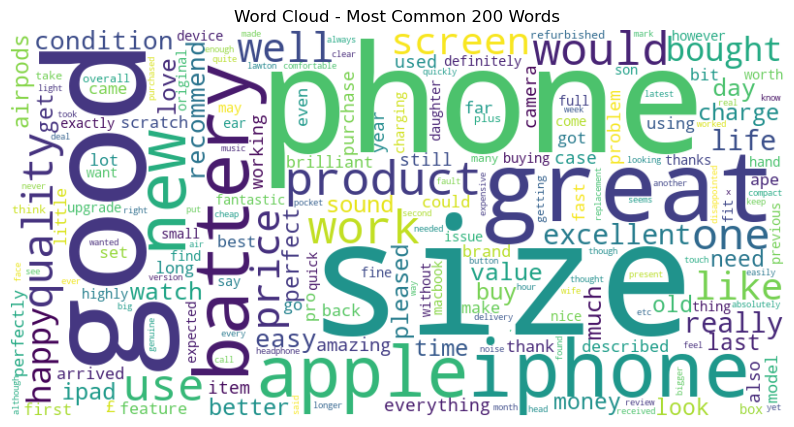

In [427]:
from wordcloud import WordCloud

all_comments = ' '.join(df['Cleaned_Comment'])

words = word_tokenize(all_comments)
word_counter = Counter(words)
most_common_words = word_counter.most_common(200)

word_freq_dict = dict(most_common_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Most Common 200 Words')
plt.show()


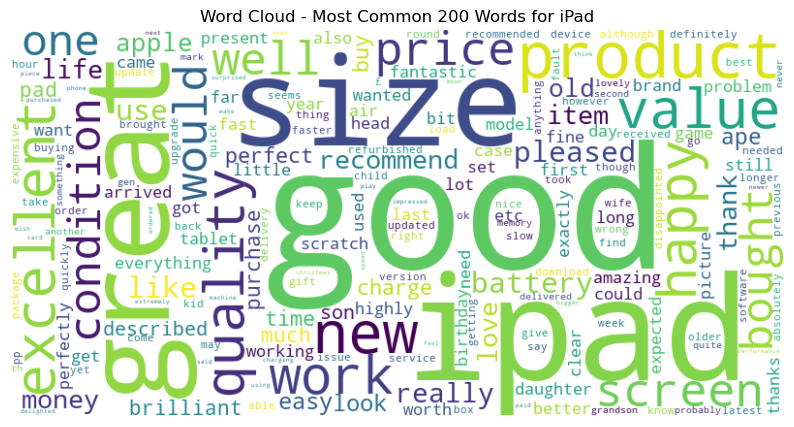

In [428]:
from wordcloud import WordCloud

all_comments = ' '.join(df_ipad['Cleaned_Comment'])

words = word_tokenize(all_comments)
word_counter = Counter(words)
most_common_words = word_counter.most_common(200)

word_freq_dict = dict(most_common_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Most Common 200 Words for iPad')
plt.show()


In [429]:
from wordcloud import WordCloud

all_comments = ' '.join(df_iphone['Cleaned_Comment'])

words = word_tokenize(all_comments)
word_counter = Counter(words)
most_common_words = word_counter.most_common(200)

word_freq_dict = dict(most_common_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Most Common 200 Words for iPhone')
plt.show()


ValueError: We need at least 1 word to plot a word cloud, got 0.

In [ ]:
from wordcloud import WordCloud

all_comments = ' '.join(df_mac['Cleaned_Comment'])

words = word_tokenize(all_comments)
word_counter = Counter(words)
most_common_words = word_counter.most_common(200)

word_freq_dict = dict(most_common_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Most Common 200 Words for Macbook')
plt.show()


In [ ]:
from wordcloud import WordCloud

all_comments = ' '.join(df_watch['Cleaned_Comment'])

words = word_tokenize(all_comments)
word_counter = Counter(words)
most_common_words = word_counter.most_common(200)

word_freq_dict = dict(most_common_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Most Common 200 Words for Apple Watch')
plt.show()


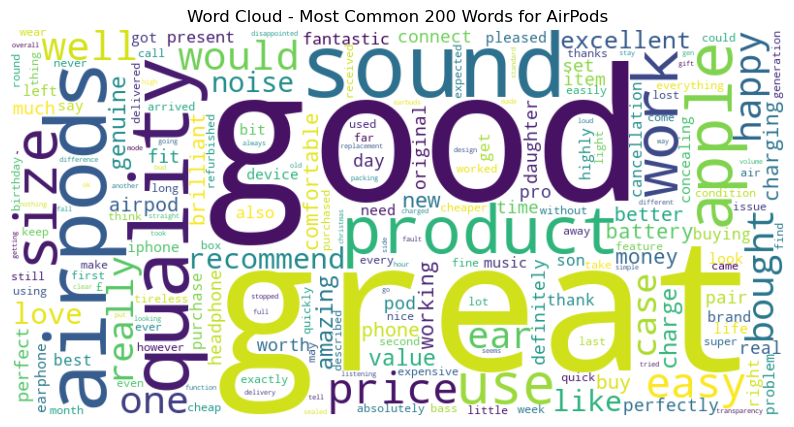

In [430]:
from wordcloud import WordCloud

all_comments = ' '.join(df_airpods['Cleaned_Comment'])

words = word_tokenize(all_comments)
word_counter = Counter(words)
most_common_words = word_counter.most_common(200)

word_freq_dict = dict(most_common_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Most Common 200 Words for AirPods')
plt.show()


**24. Extracting noun phrases with TextBlob**

In [431]:
from textblob import TextBlob
nltk.download('brown')

all_comments = ' '.join(df['Cleaned_Comment'])

# Create a TextBlob object
blob = TextBlob(all_comments)

# Extract noun phrases
noun_phrases = blob.noun_phrases

# Count the occurrences of each noun phrase using Counter
noun_phrase_counter = Counter(noun_phrases)

# Get the 10 most common noun phrases
most_common_noun_phrases = noun_phrase_counter.most_common(10)

# Print the results
print("10 most common noun phrases:")
for noun_phrase, frequency in most_common_noun_phrases:
    print(f"{noun_phrase}: {frequency}")

[nltk_data] Downloading package brown to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package brown is already up-to-date!


10 most common noun phrases:
easy use: 79
iphone size: 78
battery life: 69
great product: 61
new phone: 37
great price: 34
great phone: 33
size year: 30
£ size: 29
happy purchase: 28


In [432]:
from textblob import TextBlob
nltk.download('brown')

all_comments = ' '.join(df_mac['Cleaned_Comment'])

# Create a TextBlob object
blob = TextBlob(all_comments)

# Extract noun phrases
noun_phrases = blob.noun_phrases

# Count the occurrences of each noun phrase using Counter
noun_phrase_counter = Counter(noun_phrases)

# Get the 10 most common noun phrases
most_common_noun_phrases = noun_phrase_counter.most_common(10)

# Print the results
print("10 most common noun phrases for Macbook:")
for noun_phrase, frequency in most_common_noun_phrases:
    print(f"{noun_phrase}: {frequency}")

[nltk_data] Downloading package brown to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package brown is already up-to-date!


10 most common noun phrases for Macbook:
great product: 10
size year: 5
great price: 4
great lawton: 4
new macbook: 3
size star: 3
great value: 3
macbook air: 3
easy set: 3
excellent product: 3


In [433]:
from textblob import TextBlob
nltk.download('brown')

all_comments = ' '.join(df_iphone['Cleaned_Comment'])

# Create a TextBlob object
blob = TextBlob(all_comments)

# Extract noun phrases
noun_phrases = blob.noun_phrases

# Count the occurrences of each noun phrase using Counter
noun_phrase_counter = Counter(noun_phrases)

# Get the 10 most common noun phrases
most_common_noun_phrases = noun_phrase_counter.most_common(10)

# Print the results
print("10 most common noun phrases for iPhone:")
for noun_phrase, frequency in most_common_noun_phrases:
    print(f"{noun_phrase}: {frequency}")

10 most common noun phrases for iPhone:


[nltk_data] Downloading package brown to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [434]:
from textblob import TextBlob
nltk.download('brown')

all_comments = ' '.join(df_watch['Cleaned_Comment'])

# Create a TextBlob object
blob = TextBlob(all_comments)

# Extract noun phrases
noun_phrases = blob.noun_phrases

# Count the occurrences of each noun phrase using Counter
noun_phrase_counter = Counter(noun_phrases)

# Get the 10 most common noun phrases
most_common_noun_phrases = noun_phrase_counter.most_common(10)

# Print the results
print("10 most common noun phrases for Apple Watch:")
for noun_phrase, frequency in most_common_noun_phrases:
    print(f"{noun_phrase}: {frequency}")

[nltk_data] Downloading package brown to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package brown is already up-to-date!


10 most common noun phrases for Apple Watch:
series size: 10
battery life: 10
great product: 10
apple product: 8
easy use: 7
happy purchase: 7
good quality: 7
excellent product: 6
great condition: 6
great price: 6


In [435]:
from textblob import TextBlob
nltk.download('brown')

all_comments = ' '.join(df_ipad['Cleaned_Comment'])

# Create a TextBlob object
blob = TextBlob(all_comments)

# Extract noun phrases
noun_phrases = blob.noun_phrases

# Count the occurrences of each noun phrase using Counter
noun_phrase_counter = Counter(noun_phrases)

# Get the 10 most common noun phrases
most_common_noun_phrases = noun_phrase_counter.most_common(10)

# Print the results
print("10 most common noun phrases for iPad:")
for noun_phrase, frequency in most_common_noun_phrases:
    print(f"{noun_phrase}: {frequency}")

[nltk_data] Downloading package brown to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package brown is already up-to-date!


10 most common noun phrases for iPad:
great product: 12
easy use: 10
great price: 9
old ipad: 9
good value: 8
excellent condition: 7
size year: 7
excellent product: 7
battery life: 6
worth money: 6


In [436]:
from textblob import TextBlob
nltk.download('brown')

all_comments = ' '.join(df_airpods['Cleaned_Comment'])

# Create a TextBlob object
blob = TextBlob(all_comments)

# Extract noun phrases
noun_phrases = blob.noun_phrases

# Count the occurrences of each noun phrase using Counter
noun_phrase_counter = Counter(noun_phrases)

# Get the 10 most common noun phrases
most_common_noun_phrases = noun_phrase_counter.most_common(10)

# Print the results
print("10 most common noun phrases for AirPods:")
for noun_phrase, frequency in most_common_noun_phrases:
    print(f"{noun_phrase}: {frequency}")

[nltk_data] Downloading package brown to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package brown is already up-to-date!


10 most common noun phrases for AirPods:
easy use: 31
great product: 26
sound quality: 23
great quality: 10
£ size: 7
apple airpods: 7
size day: 7
easy set: 7
happy purchase: 6
great value: 6


**24. Performing the LDA Topic Modelling**

In [438]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from nltk.tokenize import word_tokenize

nltk.download('punkt')

def tokenize_text(text):
    return word_tokenize(text)

df_iphone['Tokenized_Comment'] = df_iphone['Cleaned_Comment'].apply(tokenize_text)

dictionary = Dictionary(df_iphone['Tokenized_Comment'])

bow_corpus = [dictionary.doc2bow(doc) for doc in df_iphone['Tokenized_Comment']]

num_topics = 5
lda_model = LdaModel(corpus=bow_corpus, id2word=dictionary, num_topics=num_topics, passes=10)

# Assign topics to comments
df_iphone['Topic'] = [max(lda_model.get_document_topics(bow), key=lambda x: x[1])[0] for bow in bow_corpus]

topic_counts = df_iphone['Topic'].value_counts().to_dict()

print("LDA Topics:")
for idx, topic in lda_model.print_topics():
    print(f"Topic {idx}: {topic} | Comment Count: {topic_counts.get(idx, 0)}")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hasanenesguray/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


ValueError: cannot compute LDA over an empty collection (no terms)

In [439]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4048 entries, 0 to 4047
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Search             4048 non-null   object
 1   Price              4048 non-null   object
 2   Condition          4048 non-null   object
 3   Comment            4048 non-null   object
 4   Cleaned_Comment    4048 non-null   object
 5   Sentiment_Comment  4048 non-null   object
 6   Length             4048 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 253.0+ KB


In [ ]:
topic_labels = {
    0: 'Comparative Analysis & Pricing',
    1: "General User Preferences & Perceptions",
    2: 'Brand Comparison & Consumer Choice',
    3: "Specific Product Features (Size & Pro Models)",
    4: "Brand Loyalty & Model Comparison"
}

topic_counts = df_iphone['Topic'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(topic_counts, labels=[topic_labels[i] for i in topic_counts.index], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Topics')
plt.show()


1. **Topic 0 - Comparative Analysis & Pricing**: This topic seems to focus on comparisons between iPhones and Android phones, with mentions of aspects like size, price, and general preferences. It appears to involve discussions about the differences and pricing strategies between Apple and its competitors.

2. **Topic 1 - General User Preferences & Perceptions**: This topic includes words like 'apple', 'iphone', 'phone', 'android', and 'people', suggesting discussions about general user preferences, perceptions of Apple versus Android, and what people want from their smartphones.

3. **Topic 2 - Brand Comparison & Consumer Choice**: With a higher emphasis on 'iphone', 'phone', 'apple', 'samsung', and 'user', this topic likely revolves around comparing Apple with other brands like Samsung, focusing on consumer choices and brand preferences.

4. **Topic 3 - Specific Product Features (Size & Pro Models)**: This topic is heavily weighted towards 'size', 'iphone', 'pro', and 'max', indicating discussions centered on specific iPhone models, particularly focusing on their size and features of the Pro and Max versions.

5. **Topic 4 - Brand Loyalty & Model Comparison**: This topic seems to discuss 'phone', 'iphone', 'apple', and 'android' in the context of yearly updates, suggesting a focus on brand loyalty and annual comparisons between different iPhone models and their competitors.

In [ ]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from nltk.tokenize import word_tokenize

nltk.download('punkt')

def tokenize_text(text):
    return word_tokenize(text)

df_mac['Tokenized_Comment'] = df_mac['Cleaned_Comment'].apply(tokenize_text)

dictionary = Dictionary(df_mac['Tokenized_Comment'])

bow_corpus = [dictionary.doc2bow(doc) for doc in df_mac['Tokenized_Comment']]

num_topics = 5
lda_model = LdaModel(corpus=bow_corpus, id2word=dictionary, num_topics=num_topics, passes=10)

# Assign topics to comments
df_mac['Topic'] = [max(lda_model.get_document_topics(bow), key=lambda x: x[1])[0] for bow in bow_corpus]

topic_counts = df_mac['Topic'].value_counts().to_dict()

print("LDA Topics:")
for idx, topic in lda_model.print_topics():
    print(f"Topic {idx}: {topic} | Comment Count: {topic_counts.get(idx, 0)}")

In [ ]:
topic_labels = {
    0: 'General Preferences & Features',
    1: "Pro Model Focus & Specific Needs",
    2: 'Size & Pricing Analysis',
    3: "Detailed Specifications & Purchase Decisions",
    4: "Comparative Analysis & User Experience"
}

topic_counts = df_mac['Topic'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(topic_counts, labels=[topic_labels[i] for i in topic_counts.index], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Topics')
plt.show()


1. **Topic 0 - General Preferences & Features**: This topic, with keywords like 'apple', 'like', 'macbook', 'pro', and 'video', seems to cover general preferences and features of MacBooks. It may include discussions about the MacBook's appeal, its professional applications, and video-related capabilities.

2. **Topic 1 - Pro Model Focus & Specific Needs**: With 'pro', 'macbook', and 'size' being prominent, this topic likely revolves around the MacBook Pro model. The discussions might focus on specific needs such as storage, performance, and suitability for professional tasks.

3. **Topic 2 - Size & Pricing Analysis**: This topic is heavily weighted towards 'size', 'macbook', 'pro', and 'price', indicating a focus on comparing different MacBook sizes (including MacBook Pro and Air) and their pricing strategies. It may also include discussions about the value for money and the cost of new models.

4. **Topic 3 - Detailed Specifications & Purchase Decisions**: With a strong emphasis on 'size', 'macbook', 'pro', 'inch', and 'ram', this topic likely includes detailed discussions about MacBook specifications. It could cover aspects like screen size, RAM options, and factors influencing purchase decisions.

5. **Topic 4 - Comparative Analysis & User Experience**: This topic includes 'apple', 'macbook', 'price', 'window', and 'screen', suggesting a comparative analysis between MacBooks and other laptops (possibly Windows-based), as well as discussions about the overall user experience, new features, and screen quality.

In [ ]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from nltk.tokenize import word_tokenize

nltk.download('punkt')

def tokenize_text(text):
    return word_tokenize(text)

df_ipad['Tokenized_Comment'] = df_ipad['Cleaned_Comment'].apply(tokenize_text)

dictionary = Dictionary(df_ipad['Tokenized_Comment'])

bow_corpus = [dictionary.doc2bow(doc) for doc in df_ipad['Tokenized_Comment']]

num_topics = 5
lda_model = LdaModel(corpus=bow_corpus, id2word=dictionary, num_topics=num_topics, passes=10)

# Assign topics to comments
df_ipad['Topic'] = [max(lda_model.get_document_topics(bow), key=lambda x: x[1])[0] for bow in bow_corpus]

topic_counts = df_ipad['Topic'].value_counts().to_dict()

print("LDA Topics:")
for idx, topic in lda_model.print_topics():
    print(f"Topic {idx}: {topic} | Comment Count: {topic_counts.get(idx, 0)}")

In [ ]:
topic_labels = {
    0: 'Size & Utility in Professional Context',
    1: "General Use & Functionality",
    2: 'User Experience & Preferences',
    3: "Personal Stories & Specific Use Cases",
    4: "Unique or Niche Applications"
}

topic_counts = df_ipad['Topic'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(topic_counts, labels=[topic_labels[i] for i in topic_counts.index], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Topics')
plt.show()


1. **Topic 0 - Size & Utility in Professional Context**: This topic, with 'size', 'ipad', 'pro', 'air', and 'use' being prominent, likely discusses the different sizes of iPads, particularly the Pro and Air models, and their utility in professional or practical contexts. The emphasis on 'price' and 'year' could also indicate discussions about cost-effectiveness and yearly updates.

2. **Topic 1 - General Use & Functionality**: With words like 'ipad', 'size', 'use', 'apple', and 'work', this topic seems to revolve around the general use of iPads, their functionality, and how they fit into various work-related scenarios. It might include comparisons with other Apple devices and discussions about the iPad as a versatile device.

3. **Topic 2 - User Experience & Preferences**: This topic, highlighted by words like 'ipad', 'size', 'really', 'like', and 'want', appears to focus on user experience and personal preferences. It likely includes discussions about what users really like or want in an iPad, including size preferences and comparisons to other Apple products like the iPhone.

4. **Topic 3 - Personal Stories & Specific Use Cases**: With keywords like 'ipad', 'video', 'win', 'love', and 'school', this topic could represent more personal stories or specific use cases of iPads. It may include content related to winning iPads, using them in educational settings like schools, and personal feelings about the device.

5. **Topic 4 - Unique or Niche Applications**: This topic is a bit more intriguing with the inclusion of words like 'ipad', 'stranger', 'size', 'used', and 'go'. It could indicate discussions about unique or niche applications of iPads, possibly in creative or unconventional settings, or reflections on unusual or unexpected experiences with the device.

In [ ]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from nltk.tokenize import word_tokenize

nltk.download('punkt')

def tokenize_text(text):
    return word_tokenize(text)

df_watch['Tokenized_Comment'] = df_watch['Cleaned_Comment'].apply(tokenize_text)

dictionary = Dictionary(df_watch['Tokenized_Comment'])

bow_corpus = [dictionary.doc2bow(doc) for doc in df_watch['Tokenized_Comment']]

num_topics = 5
lda_model = LdaModel(corpus=bow_corpus, id2word=dictionary, num_topics=num_topics, passes=10)

# Assign topics to comments
df_watch['Topic'] = [max(lda_model.get_document_topics(bow), key=lambda x: x[1])[0] for bow in bow_corpus]

topic_counts = df_watch['Topic'].value_counts().to_dict()

print("LDA Topics:")
for idx, topic in lda_model.print_topics():
    print(f"Topic {idx}: {topic} | Comment Count: {topic_counts.get(idx, 0)}")

In [ ]:
topic_labels = {
    0: 'General Usage & Model Preference',
    1: "Practical Considerations & Battery Life",
    2: 'User Experience & Functionality',
    3: "Series Comparison & Battery Performance",
    4: "Specialized Uses & Technical Aspects"
}

topic_counts = df_watch['Topic'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(topic_counts, labels=[topic_labels[i] for i in topic_counts.index], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Topics')
plt.show()


1. **Topic 0 - General Usage & Model Preference**: With 'apple', 'watch', 'size', 'use', and 'ultra' as key terms, this topic likely covers general usage of the Apple Watch, preferences among different models (including the Ultra), and how it integrates with users' lifestyles. It might also touch on the reasons why people want or choose specific Apple Watch models.

2. **Topic 1 - Practical Considerations & Battery Life**: This topic, featuring words like 'apple', 'watch', 'size', 'battery', and 'need', seems to focus on practical considerations such as battery life, size choices for comfort or utility, and what users would like to see in future iterations of the Apple Watch.

3. **Topic 2 - User Experience & Functionality**: With 'watch', 'apple', 'like', 'phone', and 'people' as prominent terms, this topic appears to discuss the user experience and functionality of the Apple Watch, including how it compares to or integrates with other devices like phones, and what features people value.

4. **Topic 3 - Series Comparison & Battery Performance**: Dominated by 'watch', 'size', 'apple', 'ultra', and 'battery', this topic likely delves into comparisons between different series of Apple Watch, particularly focusing on the Ultra model. Discussions might include aspects like battery performance and the suitability of different models for various needs or preferences.

5. **Topic 4 - Specialized Uses & Technical Aspects**: This topic, with terms like 'size', 'watch', 'apple', 'dive', and 'series', suggests a focus on specialized uses of the Apple Watch, such as diving or other specific activities. It might also include discussions on technical aspects like computing capabilities and preferences for different series of the watch.

In [ ]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from nltk.tokenize import word_tokenize

nltk.download('punkt')

def tokenize_text(text):
    return word_tokenize(text)

df_airpods['Tokenized_Comment'] = df_airpods['Cleaned_Comment'].apply(tokenize_text)

dictionary = Dictionary(df_airpods['Tokenized_Comment'])

bow_corpus = [dictionary.doc2bow(doc) for doc in df_airpods['Tokenized_Comment']]

num_topics = 5
lda_model = LdaModel(corpus=bow_corpus, id2word=dictionary, num_topics=num_topics, passes=10)

# Assign topics to comments
df_airpods['Topic'] = [max(lda_model.get_document_topics(bow), key=lambda x: x[1])[0] for bow in bow_corpus]

topic_counts = df_airpods['Topic'].value_counts().to_dict()

print("LDA Topics:")
for idx, topic in lda_model.print_topics():
    print(f"Topic {idx}: {topic} | Comment Count: {topic_counts.get(idx, 0)}")

In [ ]:
topic_labels = {
    0: 'Model Comparison & Sound Quality',
    1: "Authenticity & User Experience",
    2: 'Personalization & Aesthetics',
    3: "Quality Assessment & Purchase Decisions",
    4: "General Use & Functionality"
}

topic_counts = df_airpods['Topic'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(topic_counts, labels=[topic_labels[i] for i in topic_counts.index], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Topics')
plt.show()


1. **Topic 0 - Model Comparison & Sound Quality**: With 'airpods', 'size', 'pro', 'case', and 'sound' as key terms, this topic likely discusses comparisons between different AirPods models, particularly the Pro version, focusing on aspects like size, fit in the ear, case design, and sound quality.

2. **Topic 1 - Authenticity & User Experience**: This topic, highlighted by 'airpods', 'fake', 'pro', and 'real', appears to focus on the authenticity of AirPods, distinguishing between real and fake products. It might also include discussions about the overall user experience, quality assessments, and tips on identifying genuine Apple products.

3. **Topic 2 - Personalization & Aesthetics**: With the inclusion of 'airpods', 'case', 'yoda', and 'baby', this topic seems to revolve around personalizing AirPods, possibly through cases or accessories, and aesthetic preferences. The references to 'Yoda' and 'baby' could indicate discussions about themed or custom cases.

4. **Topic 3 - Quality Assessment & Purchase Decisions**: Dominated by 'airpods', 'pro', 'fake', and 'bought', this topic likely includes discussions about the quality of AirPods Pro, concerns about counterfeit products, and experiences or advice related to purchasing AirPods, including where and how to buy them.

5. **Topic 4 - General Use & Functionality**: This topic, with terms like 'airpods', 'case', 'sound', and 'video', suggests a focus on the general use and functionality of AirPods. It could cover aspects like sound quality, ease of use, case design, and the utility of AirPods in different contexts, such as while watching videos.

**25. Conduct a sentiment analysis with VADER model**

**25.1 iPhone**

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

# Function to get the sentiment score using VADER
def get_sentiment_score(text):
    return analyzer.polarity_scores(text)['compound']

# Apply the function to the "Sentiment_Comment" column
df_iphone['SentimentScore_VADER'] = df_iphone['Sentiment_Comment'].apply(get_sentiment_score)

# Categorize the sentiment based on the sentiment score
df_iphone['SentimentCategory_VADER'] = df_iphone['SentimentScore_VADER'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))

# Print the DataFrame with sentiment scores and categories
df_iphone[['Sentiment_Comment', 'SentimentScore_VADER', 'SentimentCategory_VADER']]


In [ ]:
df_iphone.SentimentScore_VADER.describe()

In [ ]:
sorted_df = df_iphone.sort_values(by='SentimentScore_VADER', ascending=False)
top_5_comments_vader = sorted_df.head(5)
top_5_comments_vader
for i, comment in enumerate(top_5_comments_vader['Comment']):
    print(i, comment)
    print("-----------------------------------------------------------------------------------------------")

In [ ]:
sorted_df = df_iphone.sort_values(by='SentimentScore_VADER', ascending=True)
bad_5_comments_vader = sorted_df.head(5)
bad_5_comments_vader
for i, comment in enumerate(bad_5_comments_vader['Comment']):
    print(i, comment)
    print("-----------------------------------------------------------------------------------------------")

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.hist(df_iphone['SentimentScore_VADER'], bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Sentiment Score Histogram (VADER) for iPhone')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


**25.2 Macbook**

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

# Function to get the sentiment score using VADER
def get_sentiment_score(text):
    return analyzer.polarity_scores(text)['compound']

# Apply the function to the "Sentiment_Comment" column
df_mac['SentimentScore_VADER'] = df_mac['Sentiment_Comment'].apply(get_sentiment_score)

# Categorize the sentiment based on the sentiment score
df_mac['SentimentCategory_VADER'] = df_mac['SentimentScore_VADER'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))

# Print the DataFrame with sentiment scores and categories
df_mac[['Sentiment_Comment', 'SentimentScore_VADER', 'SentimentCategory_VADER']]


In [ ]:
df_mac.SentimentScore_VADER.describe()

In [ ]:
sorted_df = df_mac.sort_values(by='SentimentScore_VADER', ascending=False)
top_5_comments_vader = sorted_df.head(5)
top_5_comments_vader
for i, comment in enumerate(top_5_comments_vader['Comment']):
    print(i, comment)
    print("-----------------------------------------------------------------------------------------------")

In [ ]:
sorted_df = df_mac.sort_values(by='SentimentScore_VADER', ascending=True)
bad_5_comments_vader = sorted_df.head(5)
bad_5_comments_vader
for i, comment in enumerate(bad_5_comments_vader['Comment']):
    print(i, comment)
    print("-----------------------------------------------------------------------------------------------")

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.hist(df_mac['SentimentScore_VADER'], bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Sentiment Score Histogram (VADER) for Macbook')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


**25.3 iPad**

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

# Function to get the sentiment score using VADER
def get_sentiment_score(text):
    return analyzer.polarity_scores(text)['compound']

# Apply the function to the "Sentiment_Comment" column
df_ipad['SentimentScore_VADER'] = df_ipad['Sentiment_Comment'].apply(get_sentiment_score)

# Categorize the sentiment based on the sentiment score
df_ipad['SentimentCategory_VADER'] = df_ipad['SentimentScore_VADER'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))

# Print the DataFrame with sentiment scores and categories
df_ipad[['Sentiment_Comment', 'SentimentScore_VADER', 'SentimentCategory_VADER']]


In [ ]:
df_ipad.SentimentScore_VADER.describe()

In [ ]:
sorted_df = df_ipad.sort_values(by='SentimentScore_VADER', ascending=False)
top_5_comments_vader = sorted_df.head(5)
top_5_comments_vader
for i, comment in enumerate(top_5_comments_vader['Comment']):
    print(i, comment)
    print("-----------------------------------------------------------------------------------------------")

In [ ]:
sorted_df = df_ipad.sort_values(by='SentimentScore_VADER', ascending=True)
bad_5_comments_vader = sorted_df.head(5)
bad_5_comments_vader
for i, comment in enumerate(bad_5_comments_vader['Comment']):
    print(i, comment)
    print("-----------------------------------------------------------------------------------------------")

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.hist(df_ipad['SentimentScore_VADER'], bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Sentiment Score Histogram (VADER) for iPad')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


**25.4 AirPods**

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

# Function to get the sentiment score using VADER
def get_sentiment_score(text):
    return analyzer.polarity_scores(text)['compound']

# Apply the function to the "Sentiment_Comment" column
df_airpods['SentimentScore_VADER'] = df_airpods['Sentiment_Comment'].apply(get_sentiment_score)

# Categorize the sentiment based on the sentiment score
df_airpods['SentimentCategory_VADER'] = df_airpods['SentimentScore_VADER'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))

# Print the DataFrame with sentiment scores and categories
df_airpods[['Sentiment_Comment', 'SentimentScore_VADER', 'SentimentCategory_VADER']]


In [ ]:
df_airpods.SentimentScore_VADER.describe()

In [ ]:
sorted_df = df_airpods.sort_values(by='SentimentScore_VADER', ascending=False)
top_5_comments_vader = sorted_df.head(5)
top_5_comments_vader
for i, comment in enumerate(top_5_comments_vader['Comment']):
    print(i, comment)
    print("-----------------------------------------------------------------------------------------------")

In [ ]:
sorted_df = df_airpods.sort_values(by='SentimentScore_VADER', ascending=True)
bad_5_comments_vader = sorted_df.head(5)
bad_5_comments_vader
for i, comment in enumerate(bad_5_comments_vader['Comment']):
    print(i, comment)
    print("-----------------------------------------------------------------------------------------------")

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.hist(df_airpods['SentimentScore_VADER'], bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Sentiment Score Histogram (VADER) for AirPods')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


**25.5 Apple Watch**

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

# Function to get the sentiment score using VADER
def get_sentiment_score(text):
    return analyzer.polarity_scores(text)['compound']

# Apply the function to the "Sentiment_Comment" column
df_watch['SentimentScore_VADER'] = df_watch['Sentiment_Comment'].apply(get_sentiment_score)

# Categorize the sentiment based on the sentiment score
df_watch['SentimentCategory_VADER'] = df_watch['SentimentScore_VADER'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))

# Print the DataFrame with sentiment scores and categories
df_watch[['Sentiment_Comment', 'SentimentScore_VADER', 'SentimentCategory_VADER']]


In [ ]:
df_watch.SentimentScore_VADER.describe()

In [ ]:
sorted_df = df_watch.sort_values(by='SentimentScore_VADER', ascending=False)
top_5_comments_vader = sorted_df.head(5)
top_5_comments_vader
for i, comment in enumerate(top_5_comments_vader['Comment']):
    print(i, comment)
    print("-----------------------------------------------------------------------------------------------")

In [ ]:
sorted_df = df_watch.sort_values(by='SentimentScore_VADER', ascending=True)
bad_5_comments_vader = sorted_df.head(5)
bad_5_comments_vader
for i, comment in enumerate(bad_5_comments_vader['Comment']):
    print(i, comment)
    print("-----------------------------------------------------------------------------------------------")

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.hist(df_watch['SentimentScore_VADER'], bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Sentiment Score Histogram (VADER) for Apple Watch')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


**26. Conduct a sentiment analysis with TextBlob sentiment classifier**

***26.1. iPhone***

In [ ]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import nltk
nltk.download('movie_reviews')

def get_sentiment_textblob(text):
    blob = TextBlob(text, analyzer=NaiveBayesAnalyzer())
    sentiment = blob.sentiment
    if sentiment.p_pos >= 0.6:
        return "Positive"
    elif sentiment.p_neg >= 0.6:
        return "Negative"
    return "Neutral"

df_iphone['SentimentCategory_Bayes'] = df_iphone['Sentiment_Comment'].apply(get_sentiment_textblob)

df_iphone[['Sentiment_Comment', 'SentimentCategory_Bayes']]


In [ ]:
df_iphone[df_iphone.SentimentCategory_Bayes != df_iphone.SentimentCategory_VADER]

***26.2. Macbook***

In [ ]:
df_mac['SentimentCategory_Bayes'] = df_mac['Sentiment_Comment'].apply(get_sentiment_textblob)

df_mac[['Sentiment_Comment', 'SentimentCategory_Bayes']]

In [ ]:
df_mac[df_mac.SentimentCategory_Bayes != df_mac.SentimentCategory_VADER]

***26.3. iPad***

In [ ]:
df_ipad['SentimentCategory_Bayes'] = df_ipad['Sentiment_Comment'].apply(get_sentiment_textblob)

df_ipad[['Sentiment_Comment', 'SentimentCategory_Bayes']]

In [ ]:
df_ipad[df_ipad.SentimentCategory_Bayes != df_ipad.SentimentCategory_VADER]

***26.4. AirPods***

In [ ]:
df_airpods['SentimentCategory_Bayes'] = df_airpods['Sentiment_Comment'].apply(get_sentiment_textblob)

df_airpods[['Sentiment_Comment', 'SentimentCategory_Bayes']]

In [ ]:
df_airpods[df_airpods.SentimentCategory_Bayes != df_airpods.SentimentCategory_VADER]

***26.5. Apple Watch***

In [ ]:
df_watch['SentimentCategory_Bayes'] = df_watch['Sentiment_Comment'].apply(get_sentiment_textblob)

df_watch[['Sentiment_Comment', 'SentimentCategory_Bayes']]

In [ ]:
df_watch[df_watch.SentimentCategory_Bayes != df_watch.SentimentCategory_VADER]

**27. Conduct a sentiment analysis with SocialSent**

In [ ]:
df_lex = pd.read_csv("2000.tsv", sep="\t", header=None)
df_lex.columns=["word","sentiment", "std.dev"]
df_lex

In [ ]:
df_lex["sentiment"].describe()

In [ ]:
df_lex.sort_values(by='sentiment', ascending=True)

In [ ]:
df_lex.sort_values(by='sentiment', ascending=False)

In [ ]:
mapping = {}
for row in df_lex[["word", "sentiment"]].to_dict("records"):
  mapping[row["word"]] = row["sentiment"]
mapping

***27.1. iPhone***

In [ ]:
def sentiment_score(row):
  text = row["Sentiment_Comment"].lower()
  score = 0
  n = 0
  for word in text.split():
    if word in mapping:
      n += 1
      score += mapping[word]
  if n > 0:
    return score / n
  return 0

df_iphone["SentimentScore_SocialSent"] = df_iphone.apply(sentiment_score, axis=1)
df_iphone

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_iphone['SentimentScore_SocialSent'], bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Sentiment Score Histogram (SocialSent) for iPhone')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [ ]:
sorted_df = df_iphone.sort_values(by='SentimentScore_SocialSent', ascending=False)
top_20_comments_SocialSent = sorted_df.head(20)
top_20_comments_SocialSent
for i, comment in enumerate(top_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

In [ ]:
sorted_df = df_iphone.sort_values(by='SentimentScore_SocialSent', ascending=True)
bad_20_comments_SocialSent = sorted_df.head(20)
bad_20_comments_SocialSent
for i, comment in enumerate(bad_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

In [ ]:
# Categorize the sentiment based on the sentiment score
df_iphone['SentimentCategory_SocialSent'] = df_iphone['SentimentScore_SocialSent'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))
df_iphone


In [ ]:
vader_counts = df_iphone['SentimentCategory_VADER'].value_counts()
social_sent_counts = df_iphone['SentimentCategory_SocialSent'].value_counts()
bayes_counts = df_iphone['SentimentCategory_Bayes'].value_counts()

# Calculate total counts for each analysis method
total_bayes = bayes_counts.sum()
total_vader = vader_counts.sum()
total_social_sent = social_sent_counts.sum()

# Combine and sort the sentiment categories from all three columns
sentiment_categories = sorted(set(bayes_counts.index) | set(vader_counts.index) | set(social_sent_counts.index))

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.25

x_bayes = range(len(sentiment_categories))
x_vader = [pos + bar_width for pos in x_bayes]
x_social_sent = [pos + bar_width * 2 for pos in x_bayes]

ax.bar(x_bayes, [bayes_counts.get(category, 0) for category in sentiment_categories], bar_width, label='Bayes')
ax.bar(x_vader, [vader_counts.get(category, 0) for category in sentiment_categories], bar_width, label='VADER')
ax.bar(x_social_sent, [social_sent_counts.get(category, 0) for category in sentiment_categories], bar_width, label='SocialSent')

ax.set_xticks([pos + bar_width for pos in x_bayes])
ax.set_xticklabels(sentiment_categories, rotation=45, ha='right')
ax.set_xlabel('Sentiment Category')
ax.set_ylabel('Count')
ax.set_title('Sentiment Analysis Comparison for iPhone')
ax.legend()

# New code for annotations
def calculate_percentage(count, total):
    return (count / total) * 100 if total > 0 else 0

for i in range(len(sentiment_categories)):
    bayes_count = bayes_counts.get(sentiment_categories[i], 0)
    vader_count = vader_counts.get(sentiment_categories[i], 0)
    social_sent_count = social_sent_counts.get(sentiment_categories[i], 0)

    ax.text(x_bayes[i], bayes_count, f'{bayes_count}\n({calculate_percentage(bayes_count, total_bayes):.1f}%)', ha='center', va='bottom')
    ax.text(x_vader[i], vader_count, f'{vader_count}\n({calculate_percentage(vader_count, total_vader):.1f}%)', ha='center', va='bottom')
    ax.text(x_social_sent[i], social_sent_count, f'{social_sent_count}\n({calculate_percentage(social_sent_count, total_social_sent):.1f}%)', ha='center', va='bottom')

plt.tight_layout()
plt.show()


***27.2. Macbook***

In [ ]:
df_mac["SentimentScore_SocialSent"] = df_mac.apply(sentiment_score, axis=1)
df_mac

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_mac['SentimentScore_SocialSent'], bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Sentiment Score Histogram (SocialSent) for Macbook')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [ ]:
sorted_df = df_mac.sort_values(by='SentimentScore_SocialSent', ascending=False)
top_20_comments_SocialSent = sorted_df.head(20)
top_20_comments_SocialSent
for i, comment in enumerate(top_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

In [ ]:
sorted_df = df_mac.sort_values(by='SentimentScore_SocialSent', ascending=True)
bad_20_comments_SocialSent = sorted_df.head(20)
bad_20_comments_SocialSent
for i, comment in enumerate(bad_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

In [ ]:
# Categorize the sentiment based on the sentiment score
df_mac['SentimentCategory_SocialSent'] = df_mac['SentimentScore_SocialSent'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))
df_mac


In [ ]:
vader_counts = df_mac['SentimentCategory_VADER'].value_counts()
social_sent_counts = df_mac['SentimentCategory_SocialSent'].value_counts()
bayes_counts = df_mac['SentimentCategory_Bayes'].value_counts()

# Calculate total counts for each analysis method
total_bayes = bayes_counts.sum()
total_vader = vader_counts.sum()
total_social_sent = social_sent_counts.sum()

# Combine and sort the sentiment categories from all three columns
sentiment_categories = sorted(set(bayes_counts.index) | set(vader_counts.index) | set(social_sent_counts.index))

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.25

x_bayes = range(len(sentiment_categories))
x_vader = [pos + bar_width for pos in x_bayes]
x_social_sent = [pos + bar_width * 2 for pos in x_bayes]

ax.bar(x_bayes, [bayes_counts.get(category, 0) for category in sentiment_categories], bar_width, label='Bayes')
ax.bar(x_vader, [vader_counts.get(category, 0) for category in sentiment_categories], bar_width, label='VADER')
ax.bar(x_social_sent, [social_sent_counts.get(category, 0) for category in sentiment_categories], bar_width, label='SocialSent')

ax.set_xticks([pos + bar_width for pos in x_bayes])
ax.set_xticklabels(sentiment_categories, rotation=45, ha='right')
ax.set_xlabel('Sentiment Category')
ax.set_ylabel('Count')
ax.set_title('Sentiment Analysis Comparison for Macbook')
ax.legend()

# New code for annotations
def calculate_percentage(count, total):
    return (count / total) * 100 if total > 0 else 0

for i in range(len(sentiment_categories)):
    bayes_count = bayes_counts.get(sentiment_categories[i], 0)
    vader_count = vader_counts.get(sentiment_categories[i], 0)
    social_sent_count = social_sent_counts.get(sentiment_categories[i], 0)

    ax.text(x_bayes[i], bayes_count, f'{bayes_count}\n({calculate_percentage(bayes_count, total_bayes):.1f}%)', ha='center', va='bottom')
    ax.text(x_vader[i], vader_count, f'{vader_count}\n({calculate_percentage(vader_count, total_vader):.1f}%)', ha='center', va='bottom')
    ax.text(x_social_sent[i], social_sent_count, f'{social_sent_count}\n({calculate_percentage(social_sent_count, total_social_sent):.1f}%)', ha='center', va='bottom')

plt.tight_layout()
plt.show()


***27.3. iPad***

In [ ]:
df_ipad["SentimentScore_SocialSent"] = df_ipad.apply(sentiment_score, axis=1)
df_ipad

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_ipad['SentimentScore_SocialSent'], bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Sentiment Score Histogram (SocialSent) for iPad')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [ ]:
sorted_df = df_ipad.sort_values(by='SentimentScore_SocialSent', ascending=False)
top_20_comments_SocialSent = sorted_df.head(20)
top_20_comments_SocialSent
for i, comment in enumerate(top_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

In [ ]:
sorted_df = df_ipad.sort_values(by='SentimentScore_SocialSent', ascending=True)
bad_20_comments_SocialSent = sorted_df.head(20)
bad_20_comments_SocialSent
for i, comment in enumerate(bad_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

In [ ]:
# Categorize the sentiment based on the sentiment score
df_ipad['SentimentCategory_SocialSent'] = df_ipad['SentimentScore_SocialSent'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))
df_ipad


In [ ]:
vader_counts = df_ipad['SentimentCategory_VADER'].value_counts()
social_sent_counts = df_ipad['SentimentCategory_SocialSent'].value_counts()
bayes_counts = df_ipad['SentimentCategory_Bayes'].value_counts()

# Calculate total counts for each analysis method
total_bayes = bayes_counts.sum()
total_vader = vader_counts.sum()
total_social_sent = social_sent_counts.sum()

# Combine and sort the sentiment categories from all three columns
sentiment_categories = sorted(set(bayes_counts.index) | set(vader_counts.index) | set(social_sent_counts.index))

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.25

x_bayes = range(len(sentiment_categories))
x_vader = [pos + bar_width for pos in x_bayes]
x_social_sent = [pos + bar_width * 2 for pos in x_bayes]

ax.bar(x_bayes, [bayes_counts.get(category, 0) for category in sentiment_categories], bar_width, label='Bayes')
ax.bar(x_vader, [vader_counts.get(category, 0) for category in sentiment_categories], bar_width, label='VADER')
ax.bar(x_social_sent, [social_sent_counts.get(category, 0) for category in sentiment_categories], bar_width, label='SocialSent')

ax.set_xticks([pos + bar_width for pos in x_bayes])
ax.set_xticklabels(sentiment_categories, rotation=45, ha='right')
ax.set_xlabel('Sentiment Category')
ax.set_ylabel('Count')
ax.set_title('Sentiment Analysis Comparison for iPad')
ax.legend()

# New code for annotations
def calculate_percentage(count, total):
    return (count / total) * 100 if total > 0 else 0

for i in range(len(sentiment_categories)):
    bayes_count = bayes_counts.get(sentiment_categories[i], 0)
    vader_count = vader_counts.get(sentiment_categories[i], 0)
    social_sent_count = social_sent_counts.get(sentiment_categories[i], 0)

    ax.text(x_bayes[i], bayes_count, f'{bayes_count}\n({calculate_percentage(bayes_count, total_bayes):.1f}%)', ha='center', va='bottom')
    ax.text(x_vader[i], vader_count, f'{vader_count}\n({calculate_percentage(vader_count, total_vader):.1f}%)', ha='center', va='bottom')
    ax.text(x_social_sent[i], social_sent_count, f'{social_sent_count}\n({calculate_percentage(social_sent_count, total_social_sent):.1f}%)', ha='center', va='bottom')

plt.tight_layout()
plt.show()


***27.4. AirPods***

In [ ]:
df_airpods["SentimentScore_SocialSent"] = df_airpods.apply(sentiment_score, axis=1)
df_airpods

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_airpods['SentimentScore_SocialSent'], bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Sentiment Score Histogram (SocialSent) for AirPods')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [ ]:
sorted_df = df_airpods.sort_values(by='SentimentScore_SocialSent', ascending=False)
top_20_comments_SocialSent = sorted_df.head(20)
top_20_comments_SocialSent
for i, comment in enumerate(top_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

In [ ]:
sorted_df = df_airpods.sort_values(by='SentimentScore_SocialSent', ascending=True)
bad_20_comments_SocialSent = sorted_df.head(20)
bad_20_comments_SocialSent
for i, comment in enumerate(bad_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

In [ ]:
# Categorize the sentiment based on the sentiment score
df_airpods['SentimentCategory_SocialSent'] = df_airpods['SentimentScore_SocialSent'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))
df_airpods


In [ ]:
vader_counts = df_airpods['SentimentCategory_VADER'].value_counts()
social_sent_counts = df_airpods['SentimentCategory_SocialSent'].value_counts()
bayes_counts = df_airpods['SentimentCategory_Bayes'].value_counts()

# Calculate total counts for each analysis method
total_bayes = bayes_counts.sum()
total_vader = vader_counts.sum()
total_social_sent = social_sent_counts.sum()

# Combine and sort the sentiment categories from all three columns
sentiment_categories = sorted(set(bayes_counts.index) | set(vader_counts.index) | set(social_sent_counts.index))

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.25

x_bayes = range(len(sentiment_categories))
x_vader = [pos + bar_width for pos in x_bayes]
x_social_sent = [pos + bar_width * 2 for pos in x_bayes]

ax.bar(x_bayes, [bayes_counts.get(category, 0) for category in sentiment_categories], bar_width, label='Bayes')
ax.bar(x_vader, [vader_counts.get(category, 0) for category in sentiment_categories], bar_width, label='VADER')
ax.bar(x_social_sent, [social_sent_counts.get(category, 0) for category in sentiment_categories], bar_width, label='SocialSent')

ax.set_xticks([pos + bar_width for pos in x_bayes])
ax.set_xticklabels(sentiment_categories, rotation=45, ha='right')
ax.set_xlabel('Sentiment Category')
ax.set_ylabel('Count')
ax.set_title('Sentiment Analysis Comparison for AirPods')
ax.legend()

# New code for annotations
def calculate_percentage(count, total):
    return (count / total) * 100 if total > 0 else 0

for i in range(len(sentiment_categories)):
    bayes_count = bayes_counts.get(sentiment_categories[i], 0)
    vader_count = vader_counts.get(sentiment_categories[i], 0)
    social_sent_count = social_sent_counts.get(sentiment_categories[i], 0)

    ax.text(x_bayes[i], bayes_count, f'{bayes_count}\n({calculate_percentage(bayes_count, total_bayes):.1f}%)', ha='center', va='bottom')
    ax.text(x_vader[i], vader_count, f'{vader_count}\n({calculate_percentage(vader_count, total_vader):.1f}%)', ha='center', va='bottom')
    ax.text(x_social_sent[i], social_sent_count, f'{social_sent_count}\n({calculate_percentage(social_sent_count, total_social_sent):.1f}%)', ha='center', va='bottom')

plt.tight_layout()
plt.show()


***27.5. Apple Watch***

In [ ]:
df_watch["SentimentScore_SocialSent"] = df_watch.apply(sentiment_score, axis=1)
df_watch

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_watch['SentimentScore_SocialSent'], bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Sentiment Score Histogram (SocialSent) for Apple Watch')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [ ]:
sorted_df = df_watch.sort_values(by='SentimentScore_SocialSent', ascending=False)
top_20_comments_SocialSent = sorted_df.head(20)
top_20_comments_SocialSent
for i, comment in enumerate(top_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

In [ ]:
sorted_df = df_watch.sort_values(by='SentimentScore_SocialSent', ascending=True)
bad_20_comments_SocialSent = sorted_df.head(20)
bad_20_comments_SocialSent
for i, comment in enumerate(bad_20_comments_SocialSent['Comment']):
    print(i, comment)
    print("---------------------------------------------------------------------------------------------------")

In [ ]:
# Categorize the sentiment based on the sentiment score
df_watch['SentimentCategory_SocialSent'] = df_watch['SentimentScore_SocialSent'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))
df_watch


In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df_watch' already loaded with the necessary data
# vader_counts = df_watch['SentimentCategory_VADER'].value_counts()
# social_sent_counts = df_watch['SentimentCategory_SocialSent'].value_counts()
# bayes_counts = df_watch['SentimentCategory_Bayes'].value_counts()

# Calculate total counts for each analysis method
total_bayes = bayes_counts.sum()
total_vader = vader_counts.sum()
total_social_sent = social_sent_counts.sum()

# Combine and sort the sentiment categories from all three columns
sentiment_categories = sorted(set(bayes_counts.index) | set(vader_counts.index) | set(social_sent_counts.index))

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.25

x_bayes = range(len(sentiment_categories))
x_vader = [pos + bar_width for pos in x_bayes]
x_social_sent = [pos + bar_width * 2 for pos in x_bayes]

ax.bar(x_bayes, [bayes_counts.get(category, 0) for category in sentiment_categories], bar_width, label='Bayes')
ax.bar(x_vader, [vader_counts.get(category, 0) for category in sentiment_categories], bar_width, label='VADER')
ax.bar(x_social_sent, [social_sent_counts.get(category, 0) for category in sentiment_categories], bar_width, label='SocialSent')

ax.set_xticks([pos + bar_width for pos in x_bayes])
ax.set_xticklabels(sentiment_categories, rotation=45, ha='right')
ax.set_xlabel('Sentiment Category')
ax.set_ylabel('Count')
ax.set_title('Sentiment Analysis Comparison for Apple Watch')
ax.legend()

# New code for annotations
def calculate_percentage(count, total):
    return (count / total) * 100 if total > 0 else 0

for i in range(len(sentiment_categories)):
    bayes_count = bayes_counts.get(sentiment_categories[i], 0)
    vader_count = vader_counts.get(sentiment_categories[i], 0)
    social_sent_count = social_sent_counts.get(sentiment_categories[i], 0)

    ax.text(x_bayes[i], bayes_count, f'{bayes_count}\n({calculate_percentage(bayes_count, total_bayes):.1f}%)', ha='center', va='bottom')
    ax.text(x_vader[i], vader_count, f'{vader_count}\n({calculate_percentage(vader_count, total_vader):.1f}%)', ha='center', va='bottom')
    ax.text(x_social_sent[i], social_sent_count, f'{social_sent_count}\n({calculate_percentage(social_sent_count, total_social_sent):.1f}%)', ha='center', va='bottom')

plt.tight_layout()
plt.show()


**28. Sentiment analysis with machine learning**

***28.1. iPhone***

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stopwords = stopwords.words('english')

def preprocess(row):
    text = row["Sentiment_Comment"].lower()
    keep = []
    for word in text.split():
        if word in stopwords:
            continue
        if word.startswith("@"):
            continue
        if word.startswith("http"):
            continue
        if word.startswith("#"):
            continue
        if word == "follow":
            continue
        if len(word) <= 1:
            continue
        keep.append(word)
    return ' '.join(keep)

df_iphone["cleaned_text"] = df_iphone.apply(preprocess, axis=1)
df_iphone

In [ ]:
from textblob.classifiers import NaiveBayesClassifier

train = df_iphone[['cleaned_text', 'SentimentCategory_VADER']][0:800]
test = df_iphone[['cleaned_text', 'SentimentCategory_VADER']][800:]

# Sample labeled data for sentiment analysis
training_data = [(row['cleaned_text'], row['SentimentCategory_VADER']) for _, row in train.iterrows()]

# Create a NaiveBayesClassifier and train it with the labeled data
classifier = NaiveBayesClassifier(training_data)

# Evaluate the classifier (optional)
testing_data = [(row['cleaned_text'], row['SentimentCategory_VADER']) for _, row in test.iterrows()]

accuracy = classifier.accuracy(testing_data)
print("Accuracy with VADER:", accuracy)

# Sentiment analysis on new text
new_text = "The book is fantastic!"
sentiment = classifier.classify(new_text)
print("Sentiment:", sentiment)  # Output: "positive"


In [ ]:
train = df_iphone[['cleaned_text', 'SentimentCategory_Bayes']][0:800]
test = df_iphone[['cleaned_text', 'SentimentCategory_Bayes']][800:]

# Sample labeled data for sentiment analysis
training_data = [(row['cleaned_text'], row['SentimentCategory_Bayes']) for _, row in train.iterrows()]

# Create a NaiveBayesClassifier and train it with the labeled data
classifier = NaiveBayesClassifier(training_data)

# Evaluate the classifier (optional)
testing_data = [(row['cleaned_text'], row['SentimentCategory_Bayes']) for _, row in test.iterrows()]

accuracy = classifier.accuracy(testing_data)
print("Accuracy with Bayes:", accuracy)

# Sentiment analysis on new text
new_text = "The book is fantastic!"
sentiment = classifier.classify(new_text)
print("Sentiment:", sentiment)  # Output: "positive"


In [ ]:
train = df_iphone[['cleaned_text', 'SentimentCategory_SocialSent']][0:800]
test = df_iphone[['cleaned_text', 'SentimentCategory_SocialSent']][800:]

# Sample labeled data for sentiment analysis
training_data = [(row['cleaned_text'], row['SentimentCategory_SocialSent']) for _, row in train.iterrows()]

# Create a NaiveBayesClassifier and train it with the labeled data
classifier = NaiveBayesClassifier(training_data)

# Evaluate the classifier (optional)
testing_data = [(row['cleaned_text'], row['SentimentCategory_SocialSent']) for _, row in test.iterrows()]

accuracy = classifier.accuracy(testing_data)
print("Accuracy with SocialSent:", accuracy)

# Sentiment analysis on new text
new_text = "The book is fantastic!"
sentiment = classifier.classify(new_text)
print("Sentiment:", sentiment)  # Output: "positive"


***28.2. Macbook***

In [ ]:
df_mac["cleaned_text"] = df_mac.apply(preprocess, axis=1)
df_mac

In [ ]:
from textblob.classifiers import NaiveBayesClassifier

train = df_mac[['cleaned_text', 'SentimentCategory_VADER']][0:800]
test = df_mac[['cleaned_text', 'SentimentCategory_VADER']][800:]

# Sample labeled data for sentiment analysis
training_data = [(row['cleaned_text'], row['SentimentCategory_VADER']) for _, row in train.iterrows()]

# Create a NaiveBayesClassifier and train it with the labeled data
classifier = NaiveBayesClassifier(training_data)

# Evaluate the classifier (optional)
testing_data = [(row['cleaned_text'], row['SentimentCategory_VADER']) for _, row in test.iterrows()]

accuracy = classifier.accuracy(testing_data)
print("Accuracy with VADER:", accuracy)

# Sentiment analysis on new text
new_text = "The book is fantastic!"
sentiment = classifier.classify(new_text)
print("Sentiment:", sentiment)  # Output: "positive"


In [ ]:
train = df_mac[['cleaned_text', 'SentimentCategory_Bayes']][0:800]
test = df_mac[['cleaned_text', 'SentimentCategory_Bayes']][800:]

# Sample labeled data for sentiment analysis
training_data = [(row['cleaned_text'], row['SentimentCategory_Bayes']) for _, row in train.iterrows()]

# Create a NaiveBayesClassifier and train it with the labeled data
classifier = NaiveBayesClassifier(training_data)

# Evaluate the classifier (optional)
testing_data = [(row['cleaned_text'], row['SentimentCategory_Bayes']) for _, row in test.iterrows()]

accuracy = classifier.accuracy(testing_data)
print("Accuracy with Bayes:", accuracy)

# Sentiment analysis on new text
new_text = "The book is fantastic!"
sentiment = classifier.classify(new_text)
print("Sentiment:", sentiment)  # Output: "positive"


In [ ]:
train = df_mac[['cleaned_text', 'SentimentCategory_SocialSent']][0:800]
test = df_mac[['cleaned_text', 'SentimentCategory_SocialSent']][800:]

# Sample labeled data for sentiment analysis
training_data = [(row['cleaned_text'], row['SentimentCategory_SocialSent']) for _, row in train.iterrows()]

# Create a NaiveBayesClassifier and train it with the labeled data
classifier = NaiveBayesClassifier(training_data)

# Evaluate the classifier (optional)
testing_data = [(row['cleaned_text'], row['SentimentCategory_SocialSent']) for _, row in test.iterrows()]

accuracy = classifier.accuracy(testing_data)
print("Accuracy with SocialSent:", accuracy)

# Sentiment analysis on new text
new_text = "The book is fantastic!"
sentiment = classifier.classify(new_text)
print("Sentiment:", sentiment)  # Output: "positive"


***28.3. iPad***

In [ ]:
df_ipad["cleaned_text"] = df_ipad.apply(preprocess, axis=1)
df_ipad

In [ ]:
from textblob.classifiers import NaiveBayesClassifier

train = df_ipad[['cleaned_text', 'SentimentCategory_VADER']][0:800]
test = df_ipad[['cleaned_text', 'SentimentCategory_VADER']][800:]

# Sample labeled data for sentiment analysis
training_data = [(row['cleaned_text'], row['SentimentCategory_VADER']) for _, row in train.iterrows()]

# Create a NaiveBayesClassifier and train it with the labeled data
classifier = NaiveBayesClassifier(training_data)

# Evaluate the classifier (optional)
testing_data = [(row['cleaned_text'], row['SentimentCategory_VADER']) for _, row in test.iterrows()]

accuracy = classifier.accuracy(testing_data)
print("Accuracy with VADER:", accuracy)

# Sentiment analysis on new text
new_text = "The book is fantastic!"
sentiment = classifier.classify(new_text)
print("Sentiment:", sentiment)  # Output: "positive"


In [ ]:
train = df_ipad[['cleaned_text', 'SentimentCategory_Bayes']][0:800]
test = df_ipad[['cleaned_text', 'SentimentCategory_Bayes']][800:]

# Sample labeled data for sentiment analysis
training_data = [(row['cleaned_text'], row['SentimentCategory_Bayes']) for _, row in train.iterrows()]

# Create a NaiveBayesClassifier and train it with the labeled data
classifier = NaiveBayesClassifier(training_data)

# Evaluate the classifier (optional)
testing_data = [(row['cleaned_text'], row['SentimentCategory_Bayes']) for _, row in test.iterrows()]

accuracy = classifier.accuracy(testing_data)
print("Accuracy with Bayes:", accuracy)

# Sentiment analysis on new text
new_text = "The book is fantastic!"
sentiment = classifier.classify(new_text)
print("Sentiment:", sentiment)  # Output: "positive"


In [ ]:
train = df_ipad[['cleaned_text', 'SentimentCategory_SocialSent']][0:800]
test = df_ipad[['cleaned_text', 'SentimentCategory_SocialSent']][800:]

# Sample labeled data for sentiment analysis
training_data = [(row['cleaned_text'], row['SentimentCategory_SocialSent']) for _, row in train.iterrows()]

# Create a NaiveBayesClassifier and train it with the labeled data
classifier = NaiveBayesClassifier(training_data)

# Evaluate the classifier (optional)
testing_data = [(row['cleaned_text'], row['SentimentCategory_SocialSent']) for _, row in test.iterrows()]

accuracy = classifier.accuracy(testing_data)
print("Accuracy with SocialSent:", accuracy)

# Sentiment analysis on new text
new_text = "The book is fantastic!"
sentiment = classifier.classify(new_text)
print("Sentiment:", sentiment)  # Output: "positive"


***28.4. AirPods***

In [ ]:
df_airpods["cleaned_text"] = df_airpods.apply(preprocess, axis=1)
df_airpods

In [ ]:
from textblob.classifiers import NaiveBayesClassifier

train = df_airpods[['cleaned_text', 'SentimentCategory_VADER']][0:800]
test = df_airpods[['cleaned_text', 'SentimentCategory_VADER']][800:]

# Sample labeled data for sentiment analysis
training_data = [(row['cleaned_text'], row['SentimentCategory_VADER']) for _, row in train.iterrows()]

# Create a NaiveBayesClassifier and train it with the labeled data
classifier = NaiveBayesClassifier(training_data)

# Evaluate the classifier (optional)
testing_data = [(row['cleaned_text'], row['SentimentCategory_VADER']) for _, row in test.iterrows()]

accuracy = classifier.accuracy(testing_data)
print("Accuracy with VADER:", accuracy)

# Sentiment analysis on new text
new_text = "The book is fantastic!"
sentiment = classifier.classify(new_text)
print("Sentiment:", sentiment)  # Output: "positive"


In [ ]:
train = df_airpods[['cleaned_text', 'SentimentCategory_Bayes']][0:800]
test = df_airpods[['cleaned_text', 'SentimentCategory_Bayes']][800:]

# Sample labeled data for sentiment analysis
training_data = [(row['cleaned_text'], row['SentimentCategory_Bayes']) for _, row in train.iterrows()]

# Create a NaiveBayesClassifier and train it with the labeled data
classifier = NaiveBayesClassifier(training_data)

# Evaluate the classifier (optional)
testing_data = [(row['cleaned_text'], row['SentimentCategory_Bayes']) for _, row in test.iterrows()]

accuracy = classifier.accuracy(testing_data)
print("Accuracy with Bayes:", accuracy)

# Sentiment analysis on new text
new_text = "The book is fantastic!"
sentiment = classifier.classify(new_text)
print("Sentiment:", sentiment)  # Output: "positive"


In [ ]:
train = df_airpods[['cleaned_text', 'SentimentCategory_SocialSent']][0:800]
test = df_airpods[['cleaned_text', 'SentimentCategory_SocialSent']][800:]

# Sample labeled data for sentiment analysis
training_data = [(row['cleaned_text'], row['SentimentCategory_SocialSent']) for _, row in train.iterrows()]

# Create a NaiveBayesClassifier and train it with the labeled data
classifier = NaiveBayesClassifier(training_data)

# Evaluate the classifier (optional)
testing_data = [(row['cleaned_text'], row['SentimentCategory_SocialSent']) for _, row in test.iterrows()]

accuracy = classifier.accuracy(testing_data)
print("Accuracy with SocialSent:", accuracy)

# Sentiment analysis on new text
new_text = "The book is fantastic!"
sentiment = classifier.classify(new_text)
print("Sentiment:", sentiment)  # Output: "positive"


***28.5. Apple Watch***

In [ ]:
df_watch["cleaned_text"] = df_watch.apply(preprocess, axis=1)
df_watch

In [ ]:
from textblob.classifiers import NaiveBayesClassifier

train = df_watch[['cleaned_text', 'SentimentCategory_VADER']][0:800]
test = df_watch[['cleaned_text', 'SentimentCategory_VADER']][800:]

# Sample labeled data for sentiment analysis
training_data = [(row['cleaned_text'], row['SentimentCategory_VADER']) for _, row in train.iterrows()]

# Create a NaiveBayesClassifier and train it with the labeled data
classifier = NaiveBayesClassifier(training_data)

# Evaluate the classifier (optional)
testing_data = [(row['cleaned_text'], row['SentimentCategory_VADER']) for _, row in test.iterrows()]

accuracy = classifier.accuracy(testing_data)
print("Accuracy with VADER:", accuracy)

# Sentiment analysis on new text
new_text = "The book is fantastic!"
sentiment = classifier.classify(new_text)
print("Sentiment:", sentiment)  # Output: "positive"


In [ ]:
train = df_watch[['cleaned_text', 'SentimentCategory_Bayes']][0:800]
test = df_watch[['cleaned_text', 'SentimentCategory_Bayes']][800:]

# Sample labeled data for sentiment analysis
training_data = [(row['cleaned_text'], row['SentimentCategory_Bayes']) for _, row in train.iterrows()]

# Create a NaiveBayesClassifier and train it with the labeled data
classifier = NaiveBayesClassifier(training_data)

# Evaluate the classifier (optional)
testing_data = [(row['cleaned_text'], row['SentimentCategory_Bayes']) for _, row in test.iterrows()]

accuracy = classifier.accuracy(testing_data)
print("Accuracy with Bayes:", accuracy)

# Sentiment analysis on new text
new_text = "The book is fantastic!"
sentiment = classifier.classify(new_text)
print("Sentiment:", sentiment)  # Output: "positive"


In [ ]:
train = df_watch[['cleaned_text', 'SentimentCategory_SocialSent']][0:800]
test = df_watch[['cleaned_text', 'SentimentCategory_SocialSent']][800:]

# Sample labeled data for sentiment analysis
training_data = [(row['cleaned_text'], row['SentimentCategory_SocialSent']) for _, row in train.iterrows()]

# Create a NaiveBayesClassifier and train it with the labeled data
classifier = NaiveBayesClassifier(training_data)

# Evaluate the classifier (optional)
testing_data = [(row['cleaned_text'], row['SentimentCategory_SocialSent']) for _, row in test.iterrows()]

accuracy = classifier.accuracy(testing_data)
print("Accuracy with SocialSent:", accuracy)

# Sentiment analysis on new text
new_text = "The book is fantastic!"
sentiment = classifier.classify(new_text)
print("Sentiment:", sentiment)  # Output: "positive"


**29. Emotion analysis**

***29.1. iPhone***

In [ ]:
from LeXmo import LeXmo

def calculate_emotion(text):
    emo = LeXmo.LeXmo(text)
    emo.pop('text')
    emo.pop('negative')
    emo.pop('positive')
    max_value = max(emo.values())
    max_keys = [key for key, value in emo.items() if value == max_value]
    return " ".join(max_keys)

df_iphone['Emotion'] = df_iphone['Sentiment_Comment'].apply(calculate_emotion)
df_iphone

In [ ]:
df_iphone[['Comment','Emotion']]

In [ ]:
emotions = ["anger", "anticipation", "disgust", "fear", "joy", "sadness", "surprise", "trust"]

# Initialize a dictionary to store emotion counts
emotion_counts = {emotion: 0 for emotion in emotions}

# Iterate through each row and count the emotions
for index, row in df_iphone.iterrows():
    comment_emotions = row['Emotion'].split()  # Split emotions in the comment
    for emotion in emotions:
        if emotion in comment_emotions:
            emotion_counts[emotion] += 1

# Convert the dictionary to a Pandas Series for plotting
emotion_counts_series = pd.Series(emotion_counts)

# Create a bar chart
plt.figure(figsize=(10, 6))
emotion_counts_series.plot(kind='bar', color='skyblue')
plt.title('Distribution of Emotions in Comments for iPhone')
plt.xlabel('Emotion')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.tight_layout()

# Adding exact values on top of each bar
for index, value in enumerate(emotion_counts_series):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()


***29.2. Macbook***

In [ ]:
df_mac['Emotion'] = df_mac['Sentiment_Comment'].apply(calculate_emotion)
df_mac

In [ ]:
df_mac[['Comment','Emotion']]

In [ ]:
# Initialize a dictionary to store emotion counts
emotion_counts = {emotion: 0 for emotion in emotions}

# Iterate through each row and count the emotions
for index, row in df_mac.iterrows():
    comment_emotions = row['Emotion'].split()  # Split emotions in the comment
    for emotion in emotions:
        if emotion in comment_emotions:
            emotion_counts[emotion] += 1

# Convert the dictionary to a Pandas Series for plotting
emotion_counts_series = pd.Series(emotion_counts)

# Create a bar chart
plt.figure(figsize=(10, 6))
emotion_counts_series.plot(kind='bar', color='skyblue')
plt.title('Distribution of Emotions in Comments for Macbook')
plt.xlabel('Emotion')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.tight_layout()

# Adding exact values on top of each bar
for index, value in enumerate(emotion_counts_series):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

***29.3. iPad***

In [ ]:
df_ipad['Emotion'] = df_ipad['Sentiment_Comment'].apply(calculate_emotion)
df_ipad

In [ ]:
df_ipad[['Comment','Emotion']]

In [ ]:
# Initialize a dictionary to store emotion counts
emotion_counts = {emotion: 0 for emotion in emotions}

# Iterate through each row and count the emotions
for index, row in df_ipad.iterrows():
    comment_emotions = row['Emotion'].split()  # Split emotions in the comment
    for emotion in emotions:
        if emotion in comment_emotions:
            emotion_counts[emotion] += 1

# Convert the dictionary to a Pandas Series for plotting
emotion_counts_series = pd.Series(emotion_counts)

# Create a bar chart
plt.figure(figsize=(10, 6))
emotion_counts_series.plot(kind='bar', color='skyblue')
plt.title('Distribution of Emotions in Comments for iPad')
plt.xlabel('Emotion')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.tight_layout()

# Adding exact values on top of each bar
for index, value in enumerate(emotion_counts_series):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

***29.4. AirPods***

In [ ]:
df_airpods['Emotion'] = df_airpods['Sentiment_Comment'].apply(calculate_emotion)
df_airpods

In [ ]:
df_airpods[['Comment','Emotion']]

In [ ]:
# Initialize a dictionary to store emotion counts
emotion_counts = {emotion: 0 for emotion in emotions}

# Iterate through each row and count the emotions
for index, row in df_airpods.iterrows():
    comment_emotions = row['Emotion'].split()  # Split emotions in the comment
    for emotion in emotions:
        if emotion in comment_emotions:
            emotion_counts[emotion] += 1

# Convert the dictionary to a Pandas Series for plotting
emotion_counts_series = pd.Series(emotion_counts)

# Create a bar chart
plt.figure(figsize=(10, 6))
emotion_counts_series.plot(kind='bar', color='skyblue')
plt.title('Distribution of Emotions in Comments for AirPods')
plt.xlabel('Emotion')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.tight_layout()

# Adding exact values on top of each bar
for index, value in enumerate(emotion_counts_series):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

***29.5. Apple Watch***

In [ ]:
df_watch['Emotion'] = df_watch['Sentiment_Comment'].apply(calculate_emotion)
df_watch

In [ ]:
df_watch[['Comment','Emotion']]

In [ ]:
# Initialize a dictionary to store emotion counts
emotion_counts = {emotion: 0 for emotion in emotions}

# Iterate through each row and count the emotions
for index, row in df_watch.iterrows():
    comment_emotions = row['Emotion'].split()  # Split emotions in the comment
    for emotion in emotions:
        if emotion in comment_emotions:
            emotion_counts[emotion] += 1

# Convert the dictionary to a Pandas Series for plotting
emotion_counts_series = pd.Series(emotion_counts)

# Create a bar chart
plt.figure(figsize=(10, 6))
emotion_counts_series.plot(kind='bar', color='skyblue')
plt.title('Distribution of Emotions in Comments for Apple Watch')
plt.xlabel('Emotion')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.tight_layout()

# Adding exact values on top of each bar
for index, value in enumerate(emotion_counts_series):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()